# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:23:08.002013: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:23:10.859241
2025-04-14 21:23:10.859241


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 3
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:23:06"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

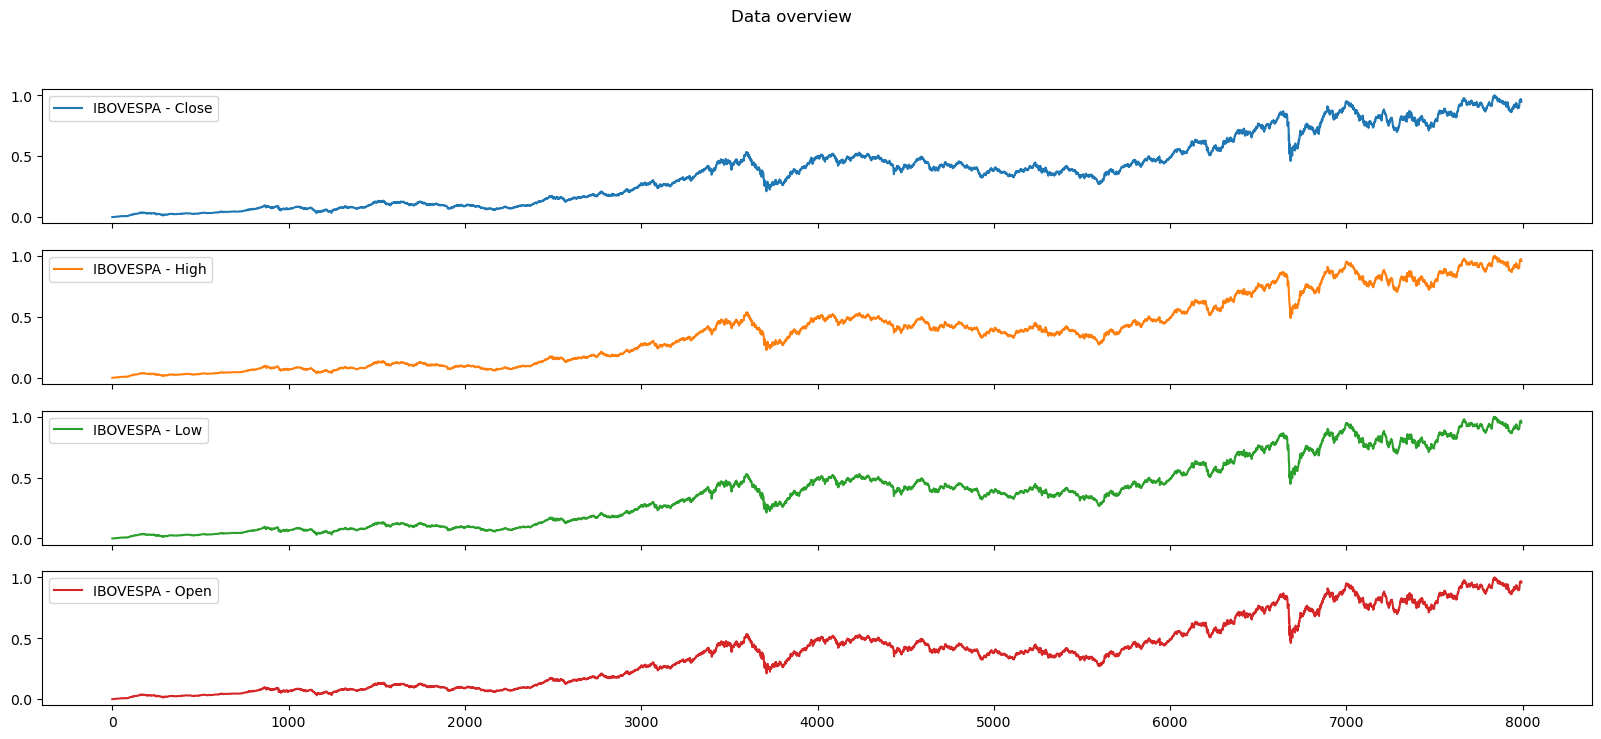

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

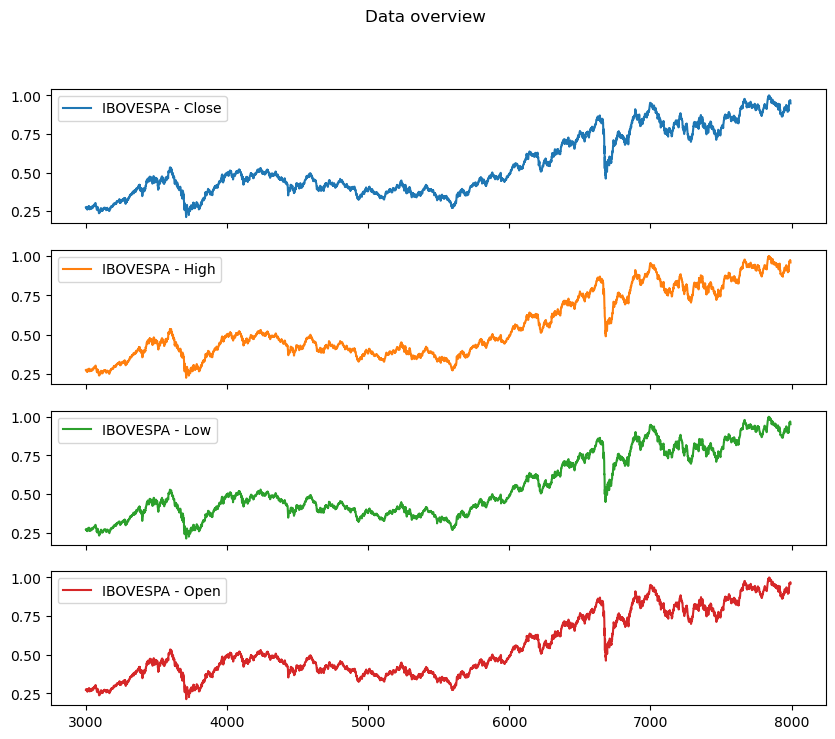

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

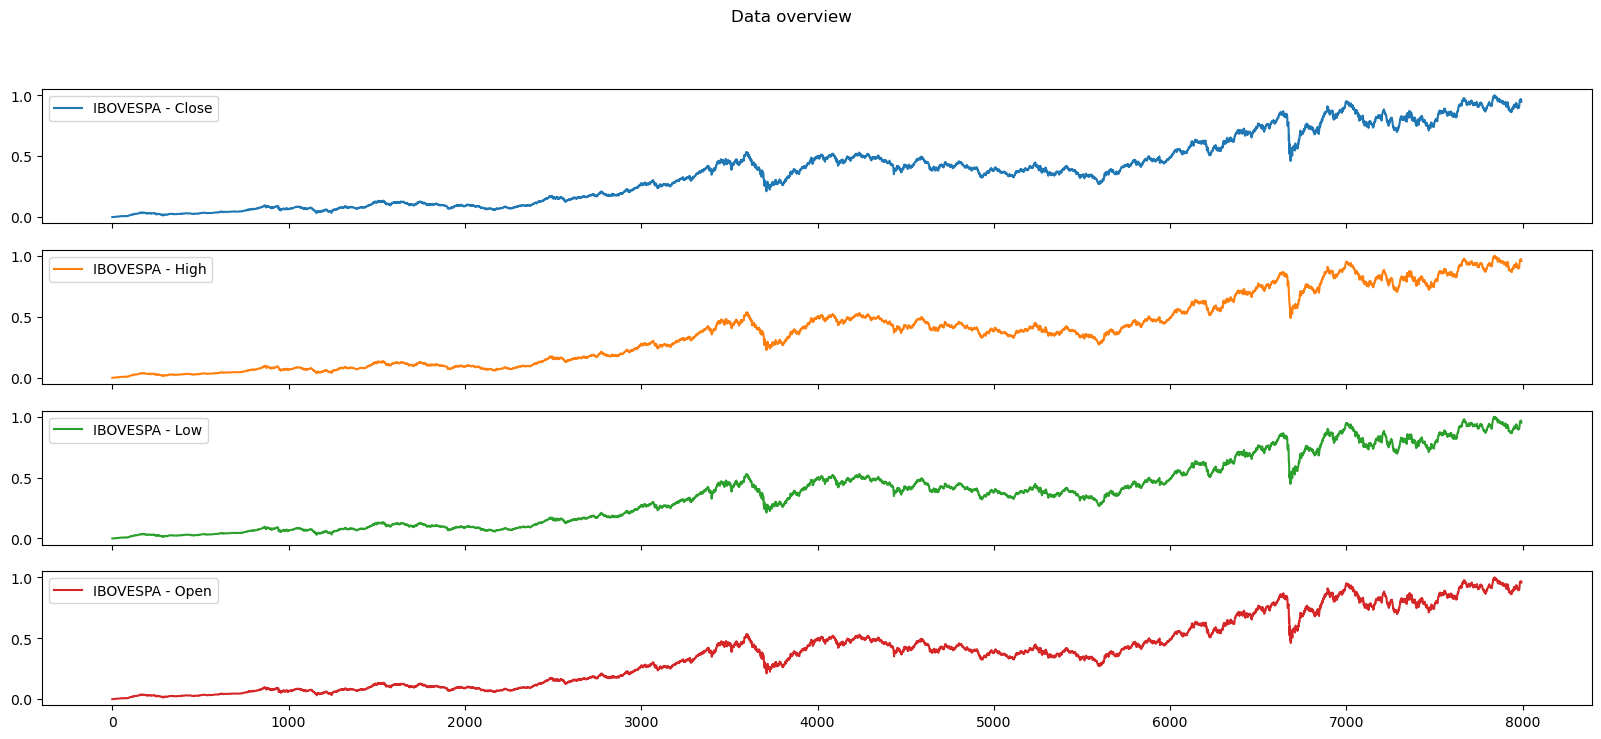

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

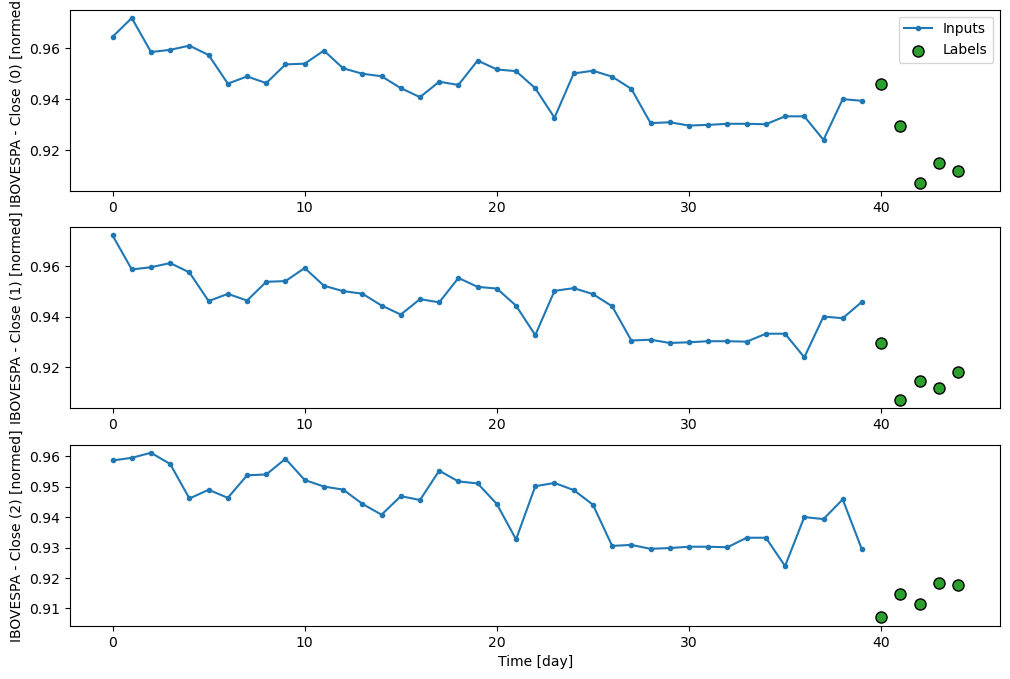

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

4

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 10:09 3s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 74.6471 - mean_squared_error: 6.2373e-05 - root_mean_squared_error: 0.0077  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 64.1037 - mean_squared_error: 7.2015e-05 - root_mean_squared_error: 0.0084

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 55.0585 - mean_squared_error: 7.6004e-05 - root_mean_squared_error: 0.0086

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 51.0557 - mean_squared_error: 7.5112e-05 - root_mean_squared_error: 0.0086

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 47.8398 - mean_squared_error: 7.3179e-05 - root_mean_squared_error: 0.0085

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 43.8730 - mean_squared_error: 6.9642e-05 - root_mean_squared_error: 0.0083

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 41.7796 - mean_squared_error: 6.7684e-05 - root_mean_squared_error: 0.0082

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 39.0453 - mean_squared_error: 6.4644e-05 - root_mean_squared_error: 0.0080

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 36.6892 - mean_squared_error: 6.1759e-05 - root_mean_squared_error: 0.0078

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 35.3579 - mean_squared_error: 6.0508e-05 - root_mean_squared_error: 0.0077

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 34.1867 - mean_squared_error: 6.0300e-05 - root_mean_squared_error: 0.0077

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 33.2116 - mean_squared_error: 6.2125e-05 - root_mean_squared_error: 0.0078

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 32.3626 - mean_squared_error: 6.4389e-05 - root_mean_squared_error: 0.0079

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 31.5980 - mean_squared_error: 6.6804e-05 - root_mean_squared_error: 0.0081

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 30.9210 - mean_squared_error: 6.9352e-05 - root_mean_squared_error: 0.0082

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 30.4039 - mean_squared_error: 7.3138e-05 - root_mean_squared_error: 0.0084

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 29.9439 - mean_squared_error: 7.6879e-05 - root_mean_squared_error: 0.0086

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 29.5981 - mean_squared_error: 8.3733e-05 - root_mean_squared_error: 0.0089

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 29.3156 - mean_squared_error: 9.1507e-05 - root_mean_squared_error: 0.0092

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 29.0434 - mean_squared_error: 9.8560e-05 - root_mean_squared_error: 0.0095

 47/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 28.8265 - mean_squared_error: 1.1228e-04 - root_mean_squared_error: 0.0100

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 28.4809 - mean_squared_error: 1.2981e-04 - root_mean_squared_error: 0.0106

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 28.2496 - mean_squared_error: 1.3999e-04 - root_mean_squared_error: 0.0109

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 27.9101 - mean_squared_error: 1.5354e-04 - root_mean_squared_error: 0.0114

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 27.5561 - mean_squared_error: 1.6471e-04 - root_mean_squared_error: 0.0118

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 27.3280 - mean_squared_error: 1.7126e-04 - root_mean_squared_error: 0.0121

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 26.9916 - mean_squared_error: 1.7981e-04 - root_mean_squared_error: 0.0124

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 26.6749 - mean_squared_error: 1.8727e-04 - root_mean_squared_error: 0.0127

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 26.4921 - mean_squared_error: 1.9203e-04 - root_mean_squared_error: 0.0128

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 26.2203 - mean_squared_error: 1.9829e-04 - root_mean_squared_error: 0.0131

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 25.9780 - mean_squared_error: 2.0456e-04 - root_mean_squared_error: 0.0133

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 25.8410 - mean_squared_error: 2.1009e-04 - root_mean_squared_error: 0.0135

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 25.6676 - mean_squared_error: 2.2166e-04 - root_mean_squared_error: 0.0138

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 25.5525 - mean_squared_error: 2.2905e-04 - root_mean_squared_error: 0.0141

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 25.4337 - mean_squared_error: 2.3584e-04 - root_mean_squared_error: 0.0143

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 25.3125 - mean_squared_error: 2.4212e-04 - root_mean_squared_error: 0.0145

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 25.1905 - mean_squared_error: 2.4801e-04 - root_mean_squared_error: 0.0146

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 25.0072 - mean_squared_error: 2.5620e-04 - root_mean_squared_error: 0.0149

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 24.8867 - mean_squared_error: 2.6154e-04 - root_mean_squared_error: 0.0151

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 24.7125 - mean_squared_error: 2.7035e-04 - root_mean_squared_error: 0.0153

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 24.5487 - mean_squared_error: 2.8102e-04 - root_mean_squared_error: 0.0156

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 24.4424 - mean_squared_error: 2.8851e-04 - root_mean_squared_error: 0.0158

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 24.2885 - mean_squared_error: 3.0097e-04 - root_mean_squared_error: 0.0161

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 24.1915 - mean_squared_error: 3.1144e-04 - root_mean_squared_error: 0.0164

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 24.0946 - mean_squared_error: 3.2194e-04 - root_mean_squared_error: 0.0166

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 24.0020 - mean_squared_error: 3.3578e-04 - root_mean_squared_error: 0.0169

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 23.9136 - mean_squared_error: 3.5255e-04 - root_mean_squared_error: 0.0173

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 23.7793 - mean_squared_error: 3.7657e-04 - root_mean_squared_error: 0.0177

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 23.6945 - mean_squared_error: 3.9321e-04 - root_mean_squared_error: 0.0181

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 23.5699 - mean_squared_error: 4.1757e-04 - root_mean_squared_error: 0.0185

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 23.4918 - mean_squared_error: 4.3575e-04 - root_mean_squared_error: 0.0189

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 23.4211 - mean_squared_error: 4.5965e-04 - root_mean_squared_error: 0.0193

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 23.3586 - mean_squared_error: 4.9293e-04 - root_mean_squared_error: 0.0198

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 23.3025 - mean_squared_error: 5.3321e-04 - root_mean_squared_error: 0.0203

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 23.2493 - mean_squared_error: 5.7502e-04 - root_mean_squared_error: 0.0209

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 23.1951 - mean_squared_error: 6.1542e-04 - root_mean_squared_error: 0.0214

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 23.1134 - mean_squared_error: 6.7389e-04 - root_mean_squared_error: 0.0222

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 23.0286 - mean_squared_error: 7.2894e-04 - root_mean_squared_error: 0.0230

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 22.9700 - mean_squared_error: 7.6357e-04 - root_mean_squared_error: 0.0235

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 22.9106 - mean_squared_error: 7.9681e-04 - root_mean_squared_error: 0.0239

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 22.8521 - mean_squared_error: 8.2951e-04 - root_mean_squared_error: 0.0244

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 22.7633 - mean_squared_error: 8.7632e-04 - root_mean_squared_error: 0.0250

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 22.7030 - mean_squared_error: 9.0588e-04 - root_mean_squared_error: 0.0254

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 22.6415 - mean_squared_error: 9.3415e-04 - root_mean_squared_error: 0.0258

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 22.5791 - mean_squared_error: 9.6119e-04 - root_mean_squared_error: 0.0262

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 22.5168 - mean_squared_error: 9.8726e-04 - root_mean_squared_error: 0.0266

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 22.4541 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0269    

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 22.3911 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0273

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 22.2960 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0278

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 22.2332 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0281

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 22.1703 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0284

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 22.0770 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0288

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 22.0145 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0291

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 21.9216 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0295

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 21.8302 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0299

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 21.7711 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0301

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 21.6876 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0305

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 21.6107 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0310

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 21.5623 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0313

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - mean_absolute_percentage_error: 21.5156 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0316

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 21.4701 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0319

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 21.4021 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0323

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 21.3380 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0328

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 21.2959 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0331

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 21.2539 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0334

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 21.2123 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0337

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0221 - mean_absolute_error: 0.0221 - mean_absolute_percentage_error: 21.1505 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 21.0895 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0346

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 21.0527 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0349

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 21.0177 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0353

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 20.9831 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0357

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 20.9483 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0360

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 20.8967 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0366

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 20.8621 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0369

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0242 - mean_absolute_error: 0.0242 - mean_absolute_percentage_error: 20.8277 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0372

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 20.7930 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0376

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 20.7581 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0379

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 20.7231 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0382

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0250 - mean_absolute_error: 0.0250 - mean_absolute_percentage_error: 20.6882 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0386

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0254 - mean_absolute_error: 0.0254 - mean_absolute_percentage_error: 20.6355 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0390

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 20.5824 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0395

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 20.5649 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0396 - val_loss: 0.0265 - val_mean_absolute_error: 0.0265 - val_mean_absolute_percentage_error: 2.7954 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0330 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.5170 - mean_absolute_error: 0.5170 - mean_absolute_percentage_error: 6945.0713 - mean_squared_error: 0.2673 - root_mean_squared_error: 0.5170

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5061 - mean_absolute_error: 0.5061 - mean_absolute_percentage_error: 5270.5732 - mean_squared_error: 0.2564 - root_mean_squared_error: 0.5063 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4906 - mean_absolute_error: 0.4906 - mean_absolute_percentage_error: 4535.5581 - mean_squared_error: 0.2427 - root_mean_squared_error: 0.4921

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6088 - mean_absolute_error: 0.6088 - mean_absolute_percentage_error: 4423.6880 - mean_squared_error: 0.6830 - root_mean_squared_error: 0.7447

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6451 - mean_absolute_error: 0.6451 - mean_absolute_percentage_error: 4330.3247 - mean_squared_error: 0.7957 - root_mean_squared_error: 0.8168

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6605 - mean_absolute_error: 0.6605 - mean_absolute_percentage_error: 4205.9224 - mean_squared_error: 0.8467 - root_mean_squared_error: 0.8545

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6647 - mean_absolute_error: 0.6647 - mean_absolute_percentage_error: 4072.9380 - mean_squared_error: 0.8664 - root_mean_squared_error: 0.8735

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6627 - mean_absolute_error: 0.6627 - mean_absolute_percentage_error: 3939.1343 - mean_squared_error: 0.8689 - root_mean_squared_error: 0.8816

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6558 - mean_absolute_error: 0.6558 - mean_absolute_percentage_error: 3751.0850 - mean_squared_error: 0.8588 - root_mean_squared_error: 0.8836

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6521 - mean_absolute_error: 0.6521 - mean_absolute_percentage_error: 3639.8833 - mean_squared_error: 0.8497 - root_mean_squared_error: 0.8825

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6425 - mean_absolute_error: 0.6425 - mean_absolute_percentage_error: 3479.3496 - mean_squared_error: 0.8300 - root_mean_squared_error: 0.8759

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6344 - mean_absolute_error: 0.6344 - mean_absolute_percentage_error: 3377.4326 - mean_squared_error: 0.8148 - root_mean_squared_error: 0.8696

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6262 - mean_absolute_error: 0.6262 - mean_absolute_percentage_error: 3281.1541 - mean_squared_error: 0.7992 - root_mean_squared_error: 0.8625

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6180 - mean_absolute_error: 0.6180 - mean_absolute_percentage_error: 3190.5154 - mean_squared_error: 0.7834 - root_mean_squared_error: 0.8549

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6096 - mean_absolute_error: 0.6096 - mean_absolute_percentage_error: 3104.6658 - mean_squared_error: 0.7675 - root_mean_squared_error: 0.8468

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6007 - mean_absolute_error: 0.6007 - mean_absolute_percentage_error: 3023.0615 - mean_squared_error: 0.7518 - root_mean_squared_error: 0.8385

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5916 - mean_absolute_error: 0.5916 - mean_absolute_percentage_error: 2945.5295 - mean_squared_error: 0.7363 - root_mean_squared_error: 0.8301

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5823 - mean_absolute_error: 0.5823 - mean_absolute_percentage_error: 2871.9199 - mean_squared_error: 0.7212 - root_mean_squared_error: 0.8216

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5731 - mean_absolute_error: 0.5731 - mean_absolute_percentage_error: 2801.9622 - mean_squared_error: 0.7065 - root_mean_squared_error: 0.8131

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5593 - mean_absolute_error: 0.5593 - mean_absolute_percentage_error: 2703.4001 - mean_squared_error: 0.6853 - root_mean_squared_error: 0.8006

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5503 - mean_absolute_error: 0.5503 - mean_absolute_percentage_error: 2641.6348 - mean_squared_error: 0.6717 - root_mean_squared_error: 0.7923

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5415 - mean_absolute_error: 0.5415 - mean_absolute_percentage_error: 2582.8044 - mean_squared_error: 0.6587 - root_mean_squared_error: 0.7842

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5287 - mean_absolute_error: 0.5287 - mean_absolute_percentage_error: 2499.6758 - mean_squared_error: 0.6399 - root_mean_squared_error: 0.7724

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5203 - mean_absolute_error: 0.5203 - mean_absolute_percentage_error: 2447.4016 - mean_squared_error: 0.6280 - root_mean_squared_error: 0.7647

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5083 - mean_absolute_error: 0.5083 - mean_absolute_percentage_error: 2373.3262 - mean_squared_error: 0.6109 - root_mean_squared_error: 0.7536

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4967 - mean_absolute_error: 0.4967 - mean_absolute_percentage_error: 2304.0347 - mean_squared_error: 0.5948 - root_mean_squared_error: 0.7428

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4893 - mean_absolute_error: 0.4893 - mean_absolute_percentage_error: 2260.2886 - mean_squared_error: 0.5845 - root_mean_squared_error: 0.7358

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4786 - mean_absolute_error: 0.4786 - mean_absolute_percentage_error: 2198.0632 - mean_squared_error: 0.5697 - root_mean_squared_error: 0.7257

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4717 - mean_absolute_error: 0.4717 - mean_absolute_percentage_error: 2158.6716 - mean_squared_error: 0.5604 - root_mean_squared_error: 0.7191

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4651 - mean_absolute_error: 0.4651 - mean_absolute_percentage_error: 2120.8506 - mean_squared_error: 0.5513 - root_mean_squared_error: 0.7128

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4586 - mean_absolute_error: 0.4586 - mean_absolute_percentage_error: 2084.5068 - mean_squared_error: 0.5425 - root_mean_squared_error: 0.7065

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4523 - mean_absolute_error: 0.4523 - mean_absolute_percentage_error: 2049.5369 - mean_squared_error: 0.5341 - root_mean_squared_error: 0.7005

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4433 - mean_absolute_error: 0.4433 - mean_absolute_percentage_error: 1999.4917 - mean_squared_error: 0.5219 - root_mean_squared_error: 0.6916

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4374 - mean_absolute_error: 0.4374 - mean_absolute_percentage_error: 1967.6284 - mean_squared_error: 0.5141 - root_mean_squared_error: 0.6859

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4290 - mean_absolute_error: 0.4290 - mean_absolute_percentage_error: 1921.9351 - mean_squared_error: 0.5029 - root_mean_squared_error: 0.6776

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4210 - mean_absolute_error: 0.4210 - mean_absolute_percentage_error: 1878.5905 - mean_squared_error: 0.4923 - root_mean_squared_error: 0.6696

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4158 - mean_absolute_error: 0.4158 - mean_absolute_percentage_error: 1850.9070 - mean_squared_error: 0.4854 - root_mean_squared_error: 0.6644

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4084 - mean_absolute_error: 0.4084 - mean_absolute_percentage_error: 1811.0734 - mean_squared_error: 0.4756 - root_mean_squared_error: 0.6568

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4036 - mean_absolute_error: 0.4036 - mean_absolute_percentage_error: 1785.5778 - mean_squared_error: 0.4692 - root_mean_squared_error: 0.6519

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3989 - mean_absolute_error: 0.3989 - mean_absolute_percentage_error: 1760.8785 - mean_squared_error: 0.4631 - root_mean_squared_error: 0.6471

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3944 - mean_absolute_error: 0.3944 - mean_absolute_percentage_error: 1736.9419 - mean_squared_error: 0.4571 - root_mean_squared_error: 0.6425

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3899 - mean_absolute_error: 0.3899 - mean_absolute_percentage_error: 1713.7306 - mean_squared_error: 0.4513 - root_mean_squared_error: 0.6379

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3835 - mean_absolute_error: 0.3835 - mean_absolute_percentage_error: 1680.2029 - mean_squared_error: 0.4429 - root_mean_squared_error: 0.6312

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3794 - mean_absolute_error: 0.3794 - mean_absolute_percentage_error: 1658.6625 - mean_squared_error: 0.4375 - root_mean_squared_error: 0.6269

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3734 - mean_absolute_error: 0.3734 - mean_absolute_percentage_error: 1627.4973 - mean_squared_error: 0.4297 - root_mean_squared_error: 0.6205

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3695 - mean_absolute_error: 0.3695 - mean_absolute_percentage_error: 1607.4452 - mean_squared_error: 0.4246 - root_mean_squared_error: 0.6164

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3658 - mean_absolute_error: 0.3658 - mean_absolute_percentage_error: 1587.9431 - mean_squared_error: 0.4197 - root_mean_squared_error: 0.6124

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3621 - mean_absolute_error: 0.3621 - mean_absolute_percentage_error: 1568.9695 - mean_squared_error: 0.4149 - root_mean_squared_error: 0.6084

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3585 - mean_absolute_error: 0.3585 - mean_absolute_percentage_error: 1550.5011 - mean_squared_error: 0.4102 - root_mean_squared_error: 0.6045

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3533 - mean_absolute_error: 0.3533 - mean_absolute_percentage_error: 1523.7076 - mean_squared_error: 0.4034 - root_mean_squared_error: 0.5989

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 1506.4327 - mean_squared_error: 0.3990 - root_mean_squared_error: 0.5952

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3451 - mean_absolute_error: 0.3451 - mean_absolute_percentage_error: 1481.3413 - mean_squared_error: 0.3927 - root_mean_squared_error: 0.5898

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3420 - mean_absolute_error: 0.3420 - mean_absolute_percentage_error: 1465.1401 - mean_squared_error: 0.3886 - root_mean_squared_error: 0.5863

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3390 - mean_absolute_error: 0.3390 - mean_absolute_percentage_error: 1449.3448 - mean_squared_error: 0.3845 - root_mean_squared_error: 0.5829

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3361 - mean_absolute_error: 0.3361 - mean_absolute_percentage_error: 1433.9397 - mean_squared_error: 0.3806 - root_mean_squared_error: 0.5795

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3333 - mean_absolute_error: 0.3333 - mean_absolute_percentage_error: 1418.9076 - mean_squared_error: 0.3768 - root_mean_squared_error: 0.5763

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 1397.0232 - mean_squared_error: 0.3713 - root_mean_squared_error: 0.5715

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3266 - mean_absolute_error: 0.3266 - mean_absolute_percentage_error: 1382.8550 - mean_squared_error: 0.3677 - root_mean_squared_error: 0.5683

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1369.0076 - mean_squared_error: 0.3642 - root_mean_squared_error: 0.5653

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 1355.4714 - mean_squared_error: 0.3607 - root_mean_squared_error: 0.5622

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3191 - mean_absolute_error: 0.3191 - mean_absolute_percentage_error: 1342.2400 - mean_squared_error: 0.3574 - root_mean_squared_error: 0.5593

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3167 - mean_absolute_error: 0.3167 - mean_absolute_percentage_error: 1329.3020 - mean_squared_error: 0.3541 - root_mean_squared_error: 0.5564

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3144 - mean_absolute_error: 0.3144 - mean_absolute_percentage_error: 1316.6440 - mean_squared_error: 0.3508 - root_mean_squared_error: 0.5535

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3110 - mean_absolute_error: 0.3110 - mean_absolute_percentage_error: 1298.1621 - mean_squared_error: 0.3461 - root_mean_squared_error: 0.5493

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3088 - mean_absolute_error: 0.3088 - mean_absolute_percentage_error: 1286.1628 - mean_squared_error: 0.3431 - root_mean_squared_error: 0.5465

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3055 - mean_absolute_error: 0.3055 - mean_absolute_percentage_error: 1268.6261 - mean_squared_error: 0.3386 - root_mean_squared_error: 0.5425

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3023 - mean_absolute_error: 0.3023 - mean_absolute_percentage_error: 1251.6208 - mean_squared_error: 0.3342 - root_mean_squared_error: 0.5385

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3002 - mean_absolute_error: 0.3002 - mean_absolute_percentage_error: 1240.5668 - mean_squared_error: 0.3314 - root_mean_squared_error: 0.5359

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2972 - mean_absolute_error: 0.2972 - mean_absolute_percentage_error: 1224.3922 - mean_squared_error: 0.3272 - root_mean_squared_error: 0.5321

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2952 - mean_absolute_error: 0.2952 - mean_absolute_percentage_error: 1213.8710 - mean_squared_error: 0.3245 - root_mean_squared_error: 0.5296

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2932 - mean_absolute_error: 0.2932 - mean_absolute_percentage_error: 1203.5524 - mean_squared_error: 0.3219 - root_mean_squared_error: 0.5272

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2913 - mean_absolute_error: 0.2913 - mean_absolute_percentage_error: 1193.4299 - mean_squared_error: 0.3193 - root_mean_squared_error: 0.5247

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2894 - mean_absolute_error: 0.2894 - mean_absolute_percentage_error: 1183.4977 - mean_squared_error: 0.3167 - root_mean_squared_error: 0.5223

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2866 - mean_absolute_error: 0.2866 - mean_absolute_percentage_error: 1168.9436 - mean_squared_error: 0.3130 - root_mean_squared_error: 0.5188

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2847 - mean_absolute_error: 0.2847 - mean_absolute_percentage_error: 1159.4636 - mean_squared_error: 0.3105 - root_mean_squared_error: 0.5165

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2820 - mean_absolute_error: 0.2820 - mean_absolute_percentage_error: 1145.5674 - mean_squared_error: 0.3069 - root_mean_squared_error: 0.5131

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2794 - mean_absolute_error: 0.2794 - mean_absolute_percentage_error: 1132.0425 - mean_squared_error: 0.3035 - root_mean_squared_error: 0.5098

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2777 - mean_absolute_error: 0.2777 - mean_absolute_percentage_error: 1123.2252 - mean_squared_error: 0.3012 - root_mean_squared_error: 0.5076

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2752 - mean_absolute_error: 0.2752 - mean_absolute_percentage_error: 1110.2887 - mean_squared_error: 0.2978 - root_mean_squared_error: 0.5044

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1097.6871 - mean_squared_error: 0.2946 - root_mean_squared_error: 0.5013

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2712 - mean_absolute_error: 0.2712 - mean_absolute_percentage_error: 1089.4657 - mean_squared_error: 0.2924 - root_mean_squared_error: 0.4992

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2689 - mean_absolute_error: 0.2689 - mean_absolute_percentage_error: 1077.3939 - mean_squared_error: 0.2893 - root_mean_squared_error: 0.4962

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2666 - mean_absolute_error: 0.2666 - mean_absolute_percentage_error: 1065.6230 - mean_squared_error: 0.2863 - root_mean_squared_error: 0.4932

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2652 - mean_absolute_error: 0.2652 - mean_absolute_percentage_error: 1057.9357 - mean_squared_error: 0.2843 - root_mean_squared_error: 0.4912

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2630 - mean_absolute_error: 0.2630 - mean_absolute_percentage_error: 1046.6354 - mean_squared_error: 0.2813 - root_mean_squared_error: 0.4883

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2609 - mean_absolute_error: 0.2609 - mean_absolute_percentage_error: 1035.6035 - mean_squared_error: 0.2785 - root_mean_squared_error: 0.4855

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2595 - mean_absolute_error: 0.2595 - mean_absolute_percentage_error: 1028.3931 - mean_squared_error: 0.2766 - root_mean_squared_error: 0.4837

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1021.2950 - mean_squared_error: 0.2748 - root_mean_squared_error: 0.4818

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1014.3070 - mean_squared_error: 0.2730 - root_mean_squared_error: 0.4800

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2555 - mean_absolute_error: 0.2555 - mean_absolute_percentage_error: 1007.4281 - mean_squared_error: 0.2712 - root_mean_squared_error: 0.4782

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2535 - mean_absolute_error: 0.2535 - mean_absolute_percentage_error: 997.3066 - mean_squared_error: 0.2685 - root_mean_squared_error: 0.4756 

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 990.6857 - mean_squared_error: 0.2668 - root_mean_squared_error: 0.4739

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 980.9384 - mean_squared_error: 0.2643 - root_mean_squared_error: 0.4713

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2486 - mean_absolute_error: 0.2486 - mean_absolute_percentage_error: 971.4052 - mean_squared_error: 0.2618 - root_mean_squared_error: 0.4688

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 965.1660 - mean_squared_error: 0.2602 - root_mean_squared_error: 0.4672

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2457 - mean_absolute_error: 0.2457 - mean_absolute_percentage_error: 955.9750 - mean_squared_error: 0.2578 - root_mean_squared_error: 0.4647

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 946.9792 - mean_squared_error: 0.2555 - root_mean_squared_error: 0.4623

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2429 - mean_absolute_error: 0.2429 - mean_absolute_percentage_error: 941.0881 - mean_squared_error: 0.2540 - root_mean_squared_error: 0.4608

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 935.2793 - mean_squared_error: 0.2525 - root_mean_squared_error: 0.4592

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.2408 - mean_absolute_error: 0.2408 - mean_absolute_percentage_error: 929.5510 - mean_squared_error: 0.2510 - root_mean_squared_error: 0.4577

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 921.1171 - mean_squared_error: 0.2488 - root_mean_squared_error: 0.4554 - val_loss: 0.0529 - val_mean_absolute_error: 0.0529 - val_mean_absolute_percentage_error: 5.5876 - val_mean_squared_error: 0.0035 - val_root_mean_squared_error: 0.0589 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.7922 - mean_absolute_error: 0.7922 - mean_absolute_percentage_error: 10645.2666 - mean_squared_error: 0.6277 - root_mean_squared_error: 0.7923

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.7507 - mean_absolute_error: 0.7507 - mean_absolute_percentage_error: 8560.3379 - mean_squared_error: 0.5666 - root_mean_squared_error: 0.7522  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7465 - mean_absolute_error: 0.7465 - mean_absolute_percentage_error: 6774.7705 - mean_squared_error: 0.5597 - root_mean_squared_error: 0.7479

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7445 - mean_absolute_error: 0.7445 - mean_absolute_percentage_error: 6128.0200 - mean_squared_error: 0.5565 - root_mean_squared_error: 0.7458

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7347 - mean_absolute_error: 0.7347 - mean_absolute_percentage_error: 5503.3374 - mean_squared_error: 0.5429 - root_mean_squared_error: 0.7365

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7241 - mean_absolute_error: 0.7241 - mean_absolute_percentage_error: 5183.2817 - mean_squared_error: 0.5293 - root_mean_squared_error: 0.7268

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7037 - mean_absolute_error: 0.7037 - mean_absolute_percentage_error: 4785.0571 - mean_squared_error: 0.5053 - root_mean_squared_error: 0.7093

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6790 - mean_absolute_error: 0.6790 - mean_absolute_percentage_error: 4447.0845 - mean_squared_error: 0.4796 - root_mean_squared_error: 0.6897

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6521 - mean_absolute_error: 0.6521 - mean_absolute_percentage_error: 4153.7417 - mean_squared_error: 0.4544 - root_mean_squared_error: 0.6697

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6351 - mean_absolute_error: 0.6351 - mean_absolute_percentage_error: 3981.2246 - mean_squared_error: 0.4387 - root_mean_squared_error: 0.6569

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6188 - mean_absolute_error: 0.6188 - mean_absolute_percentage_error: 3823.7253 - mean_squared_error: 0.4239 - root_mean_squared_error: 0.6446

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.6028 - mean_absolute_error: 0.6028 - mean_absolute_percentage_error: 3678.9163 - mean_squared_error: 0.4100 - root_mean_squared_error: 0.6327

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5876 - mean_absolute_error: 0.5876 - mean_absolute_percentage_error: 3545.8684 - mean_squared_error: 0.3969 - root_mean_squared_error: 0.6214

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5664 - mean_absolute_error: 0.5664 - mean_absolute_percentage_error: 3365.7378 - mean_squared_error: 0.3789 - root_mean_squared_error: 0.6054

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5532 - mean_absolute_error: 0.5532 - mean_absolute_percentage_error: 3256.8801 - mean_squared_error: 0.3678 - root_mean_squared_error: 0.5953

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5345 - mean_absolute_error: 0.5345 - mean_absolute_percentage_error: 3107.8386 - mean_squared_error: 0.3524 - root_mean_squared_error: 0.5811

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.5227 - mean_absolute_error: 0.5227 - mean_absolute_percentage_error: 3016.8062 - mean_squared_error: 0.3428 - root_mean_squared_error: 0.5721

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5116 - mean_absolute_error: 0.5116 - mean_absolute_percentage_error: 2931.7622 - mean_squared_error: 0.3339 - root_mean_squared_error: 0.5636

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5011 - mean_absolute_error: 0.5011 - mean_absolute_percentage_error: 2852.0615 - mean_squared_error: 0.3254 - root_mean_squared_error: 0.5554

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4910 - mean_absolute_error: 0.4910 - mean_absolute_percentage_error: 2777.1118 - mean_squared_error: 0.3174 - root_mean_squared_error: 0.5476

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4813 - mean_absolute_error: 0.4813 - mean_absolute_percentage_error: 2706.4614 - mean_squared_error: 0.3098 - root_mean_squared_error: 0.5401

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4720 - mean_absolute_error: 0.4720 - mean_absolute_percentage_error: 2639.7917 - mean_squared_error: 0.3026 - root_mean_squared_error: 0.5329

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4632 - mean_absolute_error: 0.4632 - mean_absolute_percentage_error: 2576.7793 - mean_squared_error: 0.2957 - root_mean_squared_error: 0.5260

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4548 - mean_absolute_error: 0.4548 - mean_absolute_percentage_error: 2517.1196 - mean_squared_error: 0.2892 - root_mean_squared_error: 0.5194

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4428 - mean_absolute_error: 0.4428 - mean_absolute_percentage_error: 2433.2673 - mean_squared_error: 0.2801 - root_mean_squared_error: 0.5099

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4315 - mean_absolute_error: 0.4315 - mean_absolute_percentage_error: 2355.5007 - mean_squared_error: 0.2715 - root_mean_squared_error: 0.5009

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4242 - mean_absolute_error: 0.4242 - mean_absolute_percentage_error: 2306.7200 - mean_squared_error: 0.2662 - root_mean_squared_error: 0.4952

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4139 - mean_absolute_error: 0.4139 - mean_absolute_percentage_error: 2237.6960 - mean_squared_error: 0.2585 - root_mean_squared_error: 0.4870

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4074 - mean_absolute_error: 0.4074 - mean_absolute_percentage_error: 2194.2676 - mean_squared_error: 0.2537 - root_mean_squared_error: 0.4818

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4011 - mean_absolute_error: 0.4011 - mean_absolute_percentage_error: 2152.7329 - mean_squared_error: 0.2491 - root_mean_squared_error: 0.4767

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3920 - mean_absolute_error: 0.3920 - mean_absolute_percentage_error: 2093.6731 - mean_squared_error: 0.2425 - root_mean_squared_error: 0.4694

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3863 - mean_absolute_error: 0.3863 - mean_absolute_percentage_error: 2056.3250 - mean_squared_error: 0.2383 - root_mean_squared_error: 0.4647

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3781 - mean_absolute_error: 0.3781 - mean_absolute_percentage_error: 2003.0938 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4580

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3728 - mean_absolute_error: 0.3728 - mean_absolute_percentage_error: 1969.3203 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4537

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3678 - mean_absolute_error: 0.3678 - mean_absolute_percentage_error: 1936.8115 - mean_squared_error: 0.2249 - root_mean_squared_error: 0.4495

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3605 - mean_absolute_error: 0.3605 - mean_absolute_percentage_error: 1890.2623 - mean_squared_error: 0.2196 - root_mean_squared_error: 0.4434

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3558 - mean_absolute_error: 0.3558 - mean_absolute_percentage_error: 1860.6067 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4395

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3490 - mean_absolute_error: 0.3490 - mean_absolute_percentage_error: 1818.0380 - mean_squared_error: 0.2115 - root_mean_squared_error: 0.4338

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3425 - mean_absolute_error: 0.3425 - mean_absolute_percentage_error: 1777.6122 - mean_squared_error: 0.2069 - root_mean_squared_error: 0.4284

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3383 - mean_absolute_error: 0.3383 - mean_absolute_percentage_error: 1751.7740 - mean_squared_error: 0.2040 - root_mean_squared_error: 0.4249

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3343 - mean_absolute_error: 0.3343 - mean_absolute_percentage_error: 1726.7711 - mean_squared_error: 0.2012 - root_mean_squared_error: 0.4214

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3304 - mean_absolute_error: 0.3304 - mean_absolute_percentage_error: 1702.5618 - mean_squared_error: 0.1984 - root_mean_squared_error: 0.4181

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3247 - mean_absolute_error: 0.3247 - mean_absolute_percentage_error: 1667.6489 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4133

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3210 - mean_absolute_error: 0.3210 - mean_absolute_percentage_error: 1645.2552 - mean_squared_error: 0.1919 - root_mean_squared_error: 0.4101

106/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 1612.9091 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.4055

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3123 - mean_absolute_error: 0.3123 - mean_absolute_percentage_error: 1592.1294 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4026

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3089 - mean_absolute_error: 0.3089 - mean_absolute_percentage_error: 1571.9441 - mean_squared_error: 0.1836 - root_mean_squared_error: 0.3997

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3057 - mean_absolute_error: 0.3057 - mean_absolute_percentage_error: 1552.3268 - mean_squared_error: 0.1813 - root_mean_squared_error: 0.3969

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.3025 - mean_absolute_error: 0.3025 - mean_absolute_percentage_error: 1533.2551 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3941

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1505.6353 - mean_squared_error: 0.1760 - root_mean_squared_error: 0.3901

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2951 - mean_absolute_error: 0.2951 - mean_absolute_percentage_error: 1487.8451 - mean_squared_error: 0.1740 - root_mean_squared_error: 0.3875

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2908 - mean_absolute_error: 0.2908 - mean_absolute_percentage_error: 1462.0300 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3837

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1437.2092 - mean_squared_error: 0.1682 - root_mean_squared_error: 0.3800

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2842 - mean_absolute_error: 0.2842 - mean_absolute_percentage_error: 1421.1863 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3776

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2804 - mean_absolute_error: 0.2804 - mean_absolute_percentage_error: 1397.8938 - mean_squared_error: 0.1637 - root_mean_squared_error: 0.3741

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2779 - mean_absolute_error: 0.2779 - mean_absolute_percentage_error: 1382.8365 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3719

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2755 - mean_absolute_error: 0.2755 - mean_absolute_percentage_error: 1368.1394 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3696

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 1353.7903 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3675

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2708 - mean_absolute_error: 0.2708 - mean_absolute_percentage_error: 1339.7777 - mean_squared_error: 0.1571 - root_mean_squared_error: 0.3653

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1319.3634 - mean_squared_error: 0.1547 - root_mean_squared_error: 0.3622

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2643 - mean_absolute_error: 0.2643 - mean_absolute_percentage_error: 1299.6355 - mean_squared_error: 0.1525 - root_mean_squared_error: 0.3591

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1280.5583 - mean_squared_error: 0.1503 - root_mean_squared_error: 0.3562

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 1268.1853 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3542

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2570 - mean_absolute_error: 0.2570 - mean_absolute_percentage_error: 1256.0776 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3523

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1244.2264 - mean_squared_error: 0.1461 - root_mean_squared_error: 0.3504

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2531 - mean_absolute_error: 0.2531 - mean_absolute_percentage_error: 1232.6244 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3486

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2512 - mean_absolute_error: 0.2512 - mean_absolute_percentage_error: 1221.2623 - mean_squared_error: 0.1435 - root_mean_squared_error: 0.3468

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 1204.6533 - mean_squared_error: 0.1416 - root_mean_squared_error: 0.3441

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 1193.8595 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3424

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2440 - mean_absolute_error: 0.2440 - mean_absolute_percentage_error: 1178.0707 - mean_squared_error: 0.1386 - root_mean_squared_error: 0.3398

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2422 - mean_absolute_error: 0.2422 - mean_absolute_percentage_error: 1167.8019 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3381

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2405 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 1157.7318 - mean_squared_error: 0.1362 - root_mean_squared_error: 0.3365

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1142.9867 - mean_squared_error: 0.1345 - root_mean_squared_error: 0.3341

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1133.3899 - mean_squared_error: 0.1334 - root_mean_squared_error: 0.3325

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2340 - mean_absolute_error: 0.2340 - mean_absolute_percentage_error: 1119.3300 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3301

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1110.1718 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3286

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2309 - mean_absolute_error: 0.2309 - mean_absolute_percentage_error: 1101.1808 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3271

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2294 - mean_absolute_error: 0.2294 - mean_absolute_percentage_error: 1092.3524 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3256

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 1083.6819 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3242

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 1070.9617 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3220

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 1062.6654 - mean_squared_error: 0.1253 - root_mean_squared_error: 0.3206

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2223 - mean_absolute_error: 0.2223 - mean_absolute_percentage_error: 1050.4888 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3185

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 1042.5442 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3172

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2196 - mean_absolute_error: 0.2196 - mean_absolute_percentage_error: 1034.7343 - mean_squared_error: 0.1221 - root_mean_squared_error: 0.3159

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2184 - mean_absolute_error: 0.2184 - mean_absolute_percentage_error: 1027.0580 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3146

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2171 - mean_absolute_error: 0.2171 - mean_absolute_percentage_error: 1019.5099 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3134

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1008.4226 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3115

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1001.1833 - mean_squared_error: 0.1183 - root_mean_squared_error: 0.3104

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2126 - mean_absolute_error: 0.2126 - mean_absolute_percentage_error: 990.5444 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3087 

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 983.5934 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3076

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 976.7527 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3065

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2095 - mean_absolute_error: 0.2095 - mean_absolute_percentage_error: 970.0197 - mean_squared_error: 0.1149 - root_mean_squared_error: 0.3054

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2085 - mean_absolute_error: 0.2085 - mean_absolute_percentage_error: 963.3909 - mean_squared_error: 0.1142 - root_mean_squared_error: 0.3044

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2075 - mean_absolute_error: 0.2075 - mean_absolute_percentage_error: 956.8631 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.3034

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2066 - mean_absolute_error: 0.2066 - mean_absolute_percentage_error: 950.4343 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3024

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 940.9737 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3009

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 931.7244 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.2995

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2031 - mean_absolute_error: 0.2031 - mean_absolute_percentage_error: 925.6710 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.2985

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 919.7048 - mean_squared_error: 0.1095 - root_mean_squared_error: 0.2976

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2014 - mean_absolute_error: 0.2014 - mean_absolute_percentage_error: 913.8240 - mean_squared_error: 0.1089 - root_mean_squared_error: 0.2967

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2001 - mean_absolute_error: 0.2001 - mean_absolute_percentage_error: 905.1594 - mean_squared_error: 0.1079 - root_mean_squared_error: 0.2953

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1993 - mean_absolute_error: 0.1993 - mean_absolute_percentage_error: 899.4948 - mean_squared_error: 0.1073 - root_mean_squared_error: 0.2944 - val_loss: 0.0946 - val_mean_absolute_error: 0.0946 - val_mean_absolute_percentage_error: 10.0518 - val_mean_squared_error: 0.0096 - val_root_mean_squared_error: 0.0980 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.7863 - mean_absolute_error: 0.7863 - mean_absolute_percentage_error: 10557.5068 - mean_squared_error: 0.6263 - root_mean_squared_error: 0.7914

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5880 - mean_absolute_error: 0.5880 - mean_absolute_percentage_error: 6926.5918 - mean_squared_error: 0.4134 - root_mean_squared_error: 0.6338  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5433 - mean_absolute_error: 0.5433 - mean_absolute_percentage_error: 5779.5786 - mean_squared_error: 0.3692 - root_mean_squared_error: 0.5991

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.5016 - mean_absolute_error: 0.5016 - mean_absolute_percentage_error: 4787.3877 - mean_squared_error: 0.3298 - root_mean_squared_error: 0.5663

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.4637 - mean_absolute_error: 0.4637 - mean_absolute_percentage_error: 4146.5342 - mean_squared_error: 0.2955 - root_mean_squared_error: 0.5344

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4409 - mean_absolute_error: 0.4409 - mean_absolute_percentage_error: 3822.5767 - mean_squared_error: 0.2762 - root_mean_squared_error: 0.5152

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4109 - mean_absolute_error: 0.4109 - mean_absolute_percentage_error: 3435.5940 - mean_squared_error: 0.2515 - root_mean_squared_error: 0.4894

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3936 - mean_absolute_error: 0.3936 - mean_absolute_percentage_error: 3225.4758 - mean_squared_error: 0.2376 - root_mean_squared_error: 0.4743

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3783 - mean_absolute_error: 0.3783 - mean_absolute_percentage_error: 3044.3511 - mean_squared_error: 0.2254 - root_mean_squared_error: 0.4606

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3649 - mean_absolute_error: 0.3649 - mean_absolute_percentage_error: 2886.5208 - mean_squared_error: 0.2147 - root_mean_squared_error: 0.4483

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3527 - mean_absolute_error: 0.3527 - mean_absolute_percentage_error: 2746.8499 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4371

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3368 - mean_absolute_error: 0.3368 - mean_absolute_percentage_error: 2564.8291 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.4221

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 2458.7278 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.4132

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3150 - mean_absolute_error: 0.3150 - mean_absolute_percentage_error: 2317.9126 - mean_squared_error: 0.1755 - root_mean_squared_error: 0.4010

 36/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3042 - mean_absolute_error: 0.3042 - mean_absolute_percentage_error: 2195.5469 - mean_squared_error: 0.1670 - root_mean_squared_error: 0.3902

 38/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2977 - mean_absolute_error: 0.2977 - mean_absolute_percentage_error: 2122.5894 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3836

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 2023.6035 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3746

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2809 - mean_absolute_error: 0.2809 - mean_absolute_percentage_error: 1935.0946 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3662

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2760 - mean_absolute_error: 0.2760 - mean_absolute_percentage_error: 1880.9775 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3610

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1806.0277 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3536

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1759.7534 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3490

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2603 - mean_absolute_error: 0.2603 - mean_absolute_percentage_error: 1716.1245 - mean_squared_error: 0.1332 - root_mean_squared_error: 0.3445

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2542 - mean_absolute_error: 0.2542 - mean_absolute_percentage_error: 1655.1387 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3381

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2503 - mean_absolute_error: 0.2503 - mean_absolute_percentage_error: 1617.1768 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3340

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2466 - mean_absolute_error: 0.2466 - mean_absolute_percentage_error: 1581.1722 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3301

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1546.9680 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3264

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 1514.4366 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3228

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2345 - mean_absolute_error: 0.2345 - mean_absolute_percentage_error: 1468.5027 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3176

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2313 - mean_absolute_error: 0.2313 - mean_absolute_percentage_error: 1439.6428 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3143

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 1398.8003 - mean_squared_error: 0.1099 - root_mean_squared_error: 0.3095

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1373.0614 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.3065

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 1348.4044 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.3036

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1324.7604 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.3007

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1302.0598 - mean_squared_error: 0.1027 - root_mean_squared_error: 0.2980

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 1269.6539 - mean_squared_error: 0.1003 - root_mean_squared_error: 0.2941

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 1249.0684 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.2915

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2070 - mean_absolute_error: 0.2070 - mean_absolute_percentage_error: 1219.5911 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2879

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2049 - mean_absolute_error: 0.2049 - mean_absolute_percentage_error: 1200.8118 - mean_squared_error: 0.0951 - root_mean_squared_error: 0.2855

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2028 - mean_absolute_error: 0.2028 - mean_absolute_percentage_error: 1182.6816 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2832

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 1156.6310 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2799

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 1139.9846 - mean_squared_error: 0.0906 - root_mean_squared_error: 0.2778

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1962 - mean_absolute_error: 0.1962 - mean_absolute_percentage_error: 1123.8833 - mean_squared_error: 0.0893 - root_mean_squared_error: 0.2758

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 1108.3035 - mean_squared_error: 0.0882 - root_mean_squared_error: 0.2738

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1921 - mean_absolute_error: 0.1921 - mean_absolute_percentage_error: 1085.8373 - mean_squared_error: 0.0865 - root_mean_squared_error: 0.2709

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1897 - mean_absolute_error: 0.1897 - mean_absolute_percentage_error: 1064.3813 - mean_squared_error: 0.0849 - root_mean_squared_error: 0.2681

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1882 - mean_absolute_error: 0.1882 - mean_absolute_percentage_error: 1050.6046 - mean_squared_error: 0.0839 - root_mean_squared_error: 0.2663

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1860 - mean_absolute_error: 0.1860 - mean_absolute_percentage_error: 1030.6815 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2637

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 1017.8672 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2620

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 999.3146 - mean_squared_error: 0.0801 - root_mean_squared_error: 0.2596 

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 981.5227 - mean_squared_error: 0.0788 - root_mean_squared_error: 0.2572

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1793 - mean_absolute_error: 0.1793 - mean_absolute_percentage_error: 970.0576 - mean_squared_error: 0.0779 - root_mean_squared_error: 0.2557

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 953.4188 - mean_squared_error: 0.0767 - root_mean_squared_error: 0.2534

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 937.4135 - mean_squared_error: 0.0755 - root_mean_squared_error: 0.2512

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1745 - mean_absolute_error: 0.1745 - mean_absolute_percentage_error: 927.0780 - mean_squared_error: 0.0747 - root_mean_squared_error: 0.2498

133/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 912.0500 - mean_squared_error: 0.0736 - root_mean_squared_error: 0.2478

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1712 - mean_absolute_error: 0.1712 - mean_absolute_percentage_error: 897.5630 - mean_squared_error: 0.0725 - root_mean_squared_error: 0.2458

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1701 - mean_absolute_error: 0.1701 - mean_absolute_percentage_error: 888.1905 - mean_squared_error: 0.0718 - root_mean_squared_error: 0.2445

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1686 - mean_absolute_error: 0.1686 - mean_absolute_percentage_error: 874.5388 - mean_squared_error: 0.0708 - root_mean_squared_error: 0.2425

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1671 - mean_absolute_error: 0.1671 - mean_absolute_percentage_error: 861.3528 - mean_squared_error: 0.0698 - root_mean_squared_error: 0.2407

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 852.8087 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2395

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1651 - mean_absolute_error: 0.1651 - mean_absolute_percentage_error: 844.4542 - mean_squared_error: 0.0685 - root_mean_squared_error: 0.2383

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1642 - mean_absolute_error: 0.1642 - mean_absolute_percentage_error: 836.2825 - mean_squared_error: 0.0679 - root_mean_squared_error: 0.2371

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1632 - mean_absolute_error: 0.1632 - mean_absolute_percentage_error: 828.2886 - mean_squared_error: 0.0673 - root_mean_squared_error: 0.2359

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1623 - mean_absolute_error: 0.1623 - mean_absolute_percentage_error: 820.4658 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2348

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1614 - mean_absolute_error: 0.1614 - mean_absolute_percentage_error: 812.8098 - mean_squared_error: 0.0662 - root_mean_squared_error: 0.2337

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1601 - mean_absolute_error: 0.1601 - mean_absolute_percentage_error: 801.6266 - mean_squared_error: 0.0653 - root_mean_squared_error: 0.2321

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1593 - mean_absolute_error: 0.1593 - mean_absolute_percentage_error: 794.3629 - mean_squared_error: 0.0648 - root_mean_squared_error: 0.2310

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1581 - mean_absolute_error: 0.1581 - mean_absolute_percentage_error: 783.7427 - mean_squared_error: 0.0640 - root_mean_squared_error: 0.2295

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1568 - mean_absolute_error: 0.1568 - mean_absolute_percentage_error: 773.4393 - mean_squared_error: 0.0632 - root_mean_squared_error: 0.2279

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1561 - mean_absolute_error: 0.1561 - mean_absolute_percentage_error: 766.7397 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2269

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1549 - mean_absolute_error: 0.1549 - mean_absolute_percentage_error: 756.9343 - mean_squared_error: 0.0620 - root_mean_squared_error: 0.2255

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1538 - mean_absolute_error: 0.1538 - mean_absolute_percentage_error: 747.4078 - mean_squared_error: 0.0613 - root_mean_squared_error: 0.2240

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1531 - mean_absolute_error: 0.1531 - mean_absolute_percentage_error: 741.2072 - mean_squared_error: 0.0608 - root_mean_squared_error: 0.2231

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1523 - mean_absolute_error: 0.1523 - mean_absolute_percentage_error: 735.1221 - mean_squared_error: 0.0603 - root_mean_squared_error: 0.2222

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1516 - mean_absolute_error: 0.1516 - mean_absolute_percentage_error: 729.1489 - mean_squared_error: 0.0599 - root_mean_squared_error: 0.2213

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1506 - mean_absolute_error: 0.1506 - mean_absolute_percentage_error: 720.3918 - mean_squared_error: 0.0592 - root_mean_squared_error: 0.2199

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1496 - mean_absolute_error: 0.1496 - mean_absolute_percentage_error: 711.8682 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2186

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 706.3104 - mean_squared_error: 0.0582 - root_mean_squared_error: 0.2178

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1482 - mean_absolute_error: 0.1482 - mean_absolute_percentage_error: 700.8491 - mean_squared_error: 0.0577 - root_mean_squared_error: 0.2169

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1476 - mean_absolute_error: 0.1476 - mean_absolute_percentage_error: 695.4818 - mean_squared_error: 0.0573 - root_mean_squared_error: 0.2161

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1469 - mean_absolute_error: 0.1469 - mean_absolute_percentage_error: 690.2060 - mean_squared_error: 0.0569 - root_mean_squared_error: 0.2153

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1463 - mean_absolute_error: 0.1463 - mean_absolute_percentage_error: 685.0198 - mean_squared_error: 0.0565 - root_mean_squared_error: 0.2145

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 677.4029 - mean_squared_error: 0.0560 - root_mean_squared_error: 0.2133

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 672.4301 - mean_squared_error: 0.0556 - root_mean_squared_error: 0.2125

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1442 - mean_absolute_error: 0.1442 - mean_absolute_percentage_error: 667.5386 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2117

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1433 - mean_absolute_error: 0.1433 - mean_absolute_percentage_error: 660.3493 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2105

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1427 - mean_absolute_error: 0.1427 - mean_absolute_percentage_error: 655.6547 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2098

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1419 - mean_absolute_error: 0.1419 - mean_absolute_percentage_error: 648.7535 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2087

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 644.2433 - mean_squared_error: 0.0535 - root_mean_squared_error: 0.2080

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1409 - mean_absolute_error: 0.1409 - mean_absolute_percentage_error: 639.8038 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2074

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1401 - mean_absolute_error: 0.1401 - mean_absolute_percentage_error: 633.2714 - mean_squared_error: 0.0527 - root_mean_squared_error: 0.2063

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 628.9991 - mean_squared_error: 0.0523 - root_mean_squared_error: 0.2057

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1389 - mean_absolute_error: 0.1389 - mean_absolute_percentage_error: 622.7111 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2047

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1382 - mean_absolute_error: 0.1382 - mean_absolute_percentage_error: 616.5637 - mean_squared_error: 0.0514 - root_mean_squared_error: 0.2037

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 612.5405 - mean_squared_error: 0.0511 - root_mean_squared_error: 0.2031

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1372 - mean_absolute_error: 0.1372 - mean_absolute_percentage_error: 608.5757 - mean_squared_error: 0.0508 - root_mean_squared_error: 0.2025

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1368 - mean_absolute_error: 0.1368 - mean_absolute_percentage_error: 604.6680 - mean_squared_error: 0.0505 - root_mean_squared_error: 0.2019

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1363 - mean_absolute_error: 0.1363 - mean_absolute_percentage_error: 600.8162 - mean_squared_error: 0.0503 - root_mean_squared_error: 0.2013

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1357 - mean_absolute_error: 0.1357 - mean_absolute_percentage_error: 595.1470 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2004 - val_loss: 0.0431 - val_mean_absolute_error: 0.0431 - val_mean_absolute_percentage_error: 4.6030 - val_mean_squared_error: 0.0029 - val_root_mean_squared_error: 0.0537 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.3338 - mean_absolute_error: 0.3338 - mean_absolute_percentage_error: 4478.4102 - mean_squared_error: 0.1256 - root_mean_squared_error: 0.3544

  3/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.4825 - mean_absolute_error: 0.4825 - mean_absolute_percentage_error: 4915.1782 - mean_squared_error: 0.2788 - root_mean_squared_error: 0.5153 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5239 - mean_absolute_error: 0.5239 - mean_absolute_percentage_error: 4221.6191 - mean_squared_error: 0.3159 - root_mean_squared_error: 0.5545

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4960 - mean_absolute_error: 0.4960 - mean_absolute_percentage_error: 3645.8604 - mean_squared_error: 0.2936 - root_mean_squared_error: 0.5358

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4676 - mean_absolute_error: 0.4676 - mean_absolute_percentage_error: 3251.0667 - mean_squared_error: 0.2694 - root_mean_squared_error: 0.5128

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4397 - mean_absolute_error: 0.4397 - mean_absolute_percentage_error: 2944.3376 - mean_squared_error: 0.2475 - root_mean_squared_error: 0.4901

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4143 - mean_absolute_error: 0.4143 - mean_absolute_percentage_error: 2697.9280 - mean_squared_error: 0.2285 - root_mean_squared_error: 0.4694

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3990 - mean_absolute_error: 0.3990 - mean_absolute_percentage_error: 2558.2412 - mean_squared_error: 0.2174 - root_mean_squared_error: 0.4567

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3849 - mean_absolute_error: 0.3849 - mean_absolute_percentage_error: 2434.4272 - mean_squared_error: 0.2074 - root_mean_squared_error: 0.4450

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3719 - mean_absolute_error: 0.3719 - mean_absolute_percentage_error: 2323.6226 - mean_squared_error: 0.1984 - root_mean_squared_error: 0.4341

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3599 - mean_absolute_error: 0.3599 - mean_absolute_percentage_error: 2223.7278 - mean_squared_error: 0.1902 - root_mean_squared_error: 0.4240

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3488 - mean_absolute_error: 0.3488 - mean_absolute_percentage_error: 2133.1265 - mean_squared_error: 0.1827 - root_mean_squared_error: 0.4145

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3385 - mean_absolute_error: 0.3385 - mean_absolute_percentage_error: 2050.6348 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.4057

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3243 - mean_absolute_error: 0.3243 - mean_absolute_percentage_error: 1939.7771 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.3936

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3115 - mean_absolute_error: 0.3115 - mean_absolute_percentage_error: 1841.8750 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3825

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3036 - mean_absolute_error: 0.3036 - mean_absolute_percentage_error: 1782.7384 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3756

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1727.8114 - mean_squared_error: 0.1487 - root_mean_squared_error: 0.3691

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2891 - mean_absolute_error: 0.2891 - mean_absolute_percentage_error: 1676.6494 - mean_squared_error: 0.1443 - root_mean_squared_error: 0.3629

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 1606.1035 - mean_squared_error: 0.1383 - root_mean_squared_error: 0.3543

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2732 - mean_absolute_error: 0.2732 - mean_absolute_percentage_error: 1562.7299 - mean_squared_error: 0.1346 - root_mean_squared_error: 0.3488

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1502.5067 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3412

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1447.4321 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3341

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2521 - mean_absolute_error: 0.2521 - mean_absolute_percentage_error: 1413.2345 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3296

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2453 - mean_absolute_error: 0.2453 - mean_absolute_percentage_error: 1365.3260 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3232

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1335.4329 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3192

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2369 - mean_absolute_error: 0.2369 - mean_absolute_percentage_error: 1307.0272 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3153

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1279.9865 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.3116

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2293 - mean_absolute_error: 0.2293 - mean_absolute_percentage_error: 1254.2488 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.3081

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 1229.7112 - mean_squared_error: 0.1061 - root_mean_squared_error: 0.3046

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1206.2814 - mean_squared_error: 0.1041 - root_mean_squared_error: 0.3013

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2191 - mean_absolute_error: 0.2191 - mean_absolute_percentage_error: 1183.8699 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.2981

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2160 - mean_absolute_error: 0.2160 - mean_absolute_percentage_error: 1162.3988 - mean_squared_error: 0.1003 - root_mean_squared_error: 0.2950

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 1141.8201 - mean_squared_error: 0.0986 - root_mean_squared_error: 0.2920

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 1122.0602 - mean_squared_error: 0.0969 - root_mean_squared_error: 0.2891

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 1103.0708 - mean_squared_error: 0.0952 - root_mean_squared_error: 0.2864

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2033 - mean_absolute_error: 0.2033 - mean_absolute_percentage_error: 1075.9310 - mean_squared_error: 0.0929 - root_mean_squared_error: 0.2823

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2008 - mean_absolute_error: 0.2008 - mean_absolute_percentage_error: 1058.6692 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2797

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 1033.9319 - mean_squared_error: 0.0893 - root_mean_squared_error: 0.2760

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 1018.1597 - mean_squared_error: 0.0879 - root_mean_squared_error: 0.2736

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 995.5018 - mean_squared_error: 0.0860 - root_mean_squared_error: 0.2701 

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1881 - mean_absolute_error: 0.1881 - mean_absolute_percentage_error: 973.9587 - mean_squared_error: 0.0841 - root_mean_squared_error: 0.2668

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1861 - mean_absolute_error: 0.1861 - mean_absolute_percentage_error: 960.1752 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2646

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 940.3137 - mean_squared_error: 0.0812 - root_mean_squared_error: 0.2615

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1812 - mean_absolute_error: 0.1812 - mean_absolute_percentage_error: 927.5818 - mean_squared_error: 0.0801 - root_mean_squared_error: 0.2595

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1793 - mean_absolute_error: 0.1793 - mean_absolute_percentage_error: 915.2342 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2575

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1766 - mean_absolute_error: 0.1766 - mean_absolute_percentage_error: 897.3926 - mean_squared_error: 0.0775 - root_mean_squared_error: 0.2547

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1748 - mean_absolute_error: 0.1748 - mean_absolute_percentage_error: 885.9275 - mean_squared_error: 0.0766 - root_mean_squared_error: 0.2528

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1723 - mean_absolute_error: 0.1723 - mean_absolute_percentage_error: 869.3366 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2501

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1699 - mean_absolute_error: 0.1699 - mean_absolute_percentage_error: 853.4386 - mean_squared_error: 0.0738 - root_mean_squared_error: 0.2475

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1683 - mean_absolute_error: 0.1683 - mean_absolute_percentage_error: 843.2053 - mean_squared_error: 0.0729 - root_mean_squared_error: 0.2458

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 828.3767 - mean_squared_error: 0.0716 - root_mean_squared_error: 0.2434

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1640 - mean_absolute_error: 0.1640 - mean_absolute_percentage_error: 814.1290 - mean_squared_error: 0.0704 - root_mean_squared_error: 0.2410

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1626 - mean_absolute_error: 0.1626 - mean_absolute_percentage_error: 804.9354 - mean_squared_error: 0.0696 - root_mean_squared_error: 0.2395

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1606 - mean_absolute_error: 0.1606 - mean_absolute_percentage_error: 791.5762 - mean_squared_error: 0.0685 - root_mean_squared_error: 0.2373

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1587 - mean_absolute_error: 0.1587 - mean_absolute_percentage_error: 778.7083 - mean_squared_error: 0.0674 - root_mean_squared_error: 0.2351

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1574 - mean_absolute_error: 0.1574 - mean_absolute_percentage_error: 770.3889 - mean_squared_error: 0.0667 - root_mean_squared_error: 0.2337

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1556 - mean_absolute_error: 0.1556 - mean_absolute_percentage_error: 758.2800 - mean_squared_error: 0.0656 - root_mean_squared_error: 0.2316

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 - mean_absolute_percentage_error: 750.4432 - mean_squared_error: 0.0650 - root_mean_squared_error: 0.2303

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1533 - mean_absolute_error: 0.1533 - mean_absolute_percentage_error: 742.7883 - mean_squared_error: 0.0643 - root_mean_squared_error: 0.2290

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1522 - mean_absolute_error: 0.1522 - mean_absolute_percentage_error: 735.3082 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2277

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1511 - mean_absolute_error: 0.1511 - mean_absolute_percentage_error: 727.9982 - mean_squared_error: 0.0631 - root_mean_squared_error: 0.2264

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1495 - mean_absolute_error: 0.1495 - mean_absolute_percentage_error: 717.3380 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2246

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1485 - mean_absolute_error: 0.1485 - mean_absolute_percentage_error: 710.4263 - mean_squared_error: 0.0616 - root_mean_squared_error: 0.2234

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1475 - mean_absolute_error: 0.1475 - mean_absolute_percentage_error: 703.6639 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2222

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1465 - mean_absolute_error: 0.1465 - mean_absolute_percentage_error: 697.0469 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2211

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 690.5692 - mean_squared_error: 0.0599 - root_mean_squared_error: 0.2199

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1446 - mean_absolute_error: 0.1446 - mean_absolute_percentage_error: 684.2260 - mean_squared_error: 0.0593 - root_mean_squared_error: 0.2188

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1437 - mean_absolute_error: 0.1437 - mean_absolute_percentage_error: 678.0128 - mean_squared_error: 0.0588 - root_mean_squared_error: 0.2177

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 671.9252 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2166

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1419 - mean_absolute_error: 0.1419 - mean_absolute_percentage_error: 665.9595 - mean_squared_error: 0.0578 - root_mean_squared_error: 0.2156

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1406 - mean_absolute_error: 0.1406 - mean_absolute_percentage_error: 657.2328 - mean_squared_error: 0.0570 - root_mean_squared_error: 0.2140

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1398 - mean_absolute_error: 0.1398 - mean_absolute_percentage_error: 651.5577 - mean_squared_error: 0.0566 - root_mean_squared_error: 0.2130

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1385 - mean_absolute_error: 0.1385 - mean_absolute_percentage_error: 643.2502 - mean_squared_error: 0.0559 - root_mean_squared_error: 0.2115

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 635.1798 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2100

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1366 - mean_absolute_error: 0.1366 - mean_absolute_percentage_error: 629.9277 - mean_squared_error: 0.0547 - root_mean_squared_error: 0.2091

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - mean_absolute_percentage_error: 624.7746 - mean_squared_error: 0.0543 - root_mean_squared_error: 0.2081

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 619.7162 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2072

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1340 - mean_absolute_error: 0.1340 - mean_absolute_percentage_error: 612.3010 - mean_squared_error: 0.0532 - root_mean_squared_error: 0.2059

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1333 - mean_absolute_error: 0.1333 - mean_absolute_percentage_error: 607.4687 - mean_squared_error: 0.0528 - root_mean_squared_error: 0.2050

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1323 - mean_absolute_error: 0.1323 - mean_absolute_percentage_error: 600.3803 - mean_squared_error: 0.0522 - root_mean_squared_error: 0.2037

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1316 - mean_absolute_error: 0.1316 - mean_absolute_percentage_error: 595.7584 - mean_squared_error: 0.0518 - root_mean_squared_error: 0.2029

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1309 - mean_absolute_error: 0.1309 - mean_absolute_percentage_error: 591.2162 - mean_squared_error: 0.0515 - root_mean_squared_error: 0.2020

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1303 - mean_absolute_error: 0.1303 - mean_absolute_percentage_error: 586.7524 - mean_squared_error: 0.0511 - root_mean_squared_error: 0.2012

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1297 - mean_absolute_error: 0.1297 - mean_absolute_percentage_error: 582.3645 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2004

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1288 - mean_absolute_error: 0.1288 - mean_absolute_percentage_error: 575.9196 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.1992

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1282 - mean_absolute_error: 0.1282 - mean_absolute_percentage_error: 571.7117 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.1985

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1273 - mean_absolute_error: 0.1273 - mean_absolute_percentage_error: 565.5280 - mean_squared_error: 0.0493 - root_mean_squared_error: 0.1973

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1265 - mean_absolute_error: 0.1265 - mean_absolute_percentage_error: 559.4930 - mean_squared_error: 0.0488 - root_mean_squared_error: 0.1962

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1259 - mean_absolute_error: 0.1259 - mean_absolute_percentage_error: 555.5505 - mean_squared_error: 0.0485 - root_mean_squared_error: 0.1955

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1251 - mean_absolute_error: 0.1251 - mean_absolute_percentage_error: 549.7523 - mean_squared_error: 0.0480 - root_mean_squared_error: 0.1944

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 544.0883 - mean_squared_error: 0.0475 - root_mean_squared_error: 0.1934

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1238 - mean_absolute_error: 0.1238 - mean_absolute_percentage_error: 540.3845 - mean_squared_error: 0.0472 - root_mean_squared_error: 0.1927

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1230 - mean_absolute_error: 0.1230 - mean_absolute_percentage_error: 534.9335 - mean_squared_error: 0.0468 - root_mean_squared_error: 0.1917

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1223 - mean_absolute_error: 0.1223 - mean_absolute_percentage_error: 529.6044 - mean_squared_error: 0.0463 - root_mean_squared_error: 0.1907

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1218 - mean_absolute_error: 0.1218 - mean_absolute_percentage_error: 526.1176 - mean_squared_error: 0.0460 - root_mean_squared_error: 0.1900

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1211 - mean_absolute_error: 0.1211 - mean_absolute_percentage_error: 520.9826 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.1890

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 517.6211 - mean_squared_error: 0.0453 - root_mean_squared_error: 0.1884

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1201 - mean_absolute_error: 0.1201 - mean_absolute_percentage_error: 514.3078 - mean_squared_error: 0.0451 - root_mean_squared_error: 0.1878

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 509.4261 - mean_squared_error: 0.0447 - root_mean_squared_error: 0.1868

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 506.2346 - mean_squared_error: 0.0444 - root_mean_squared_error: 0.1862 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245 - val_mean_absolute_percentage_error: 2.6031 - val_mean_squared_error: 0.0011 - val_root_mean_squared_error: 0.0325 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - loss: 0.7802 - mean_absolute_error: 0.7802 - mean_absolute_percentage_error: 10475.2148 - mean_squared_error: 0.6100 - root_mean_squared_error: 0.7810

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7630 - mean_absolute_error: 0.7630 - mean_absolute_percentage_error: 7952.9248 - mean_squared_error: 0.5848 - root_mean_squared_error: 0.7645  

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7439 - mean_absolute_error: 0.7439 - mean_absolute_percentage_error: 6857.8086 - mean_squared_error: 0.5586 - root_mean_squared_error: 0.7468

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7139 - mean_absolute_error: 0.7139 - mean_absolute_percentage_error: 5867.3364 - mean_squared_error: 0.5204 - root_mean_squared_error: 0.7199

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.6764 - mean_absolute_error: 0.6764 - mean_absolute_percentage_error: 5201.8945 - mean_squared_error: 0.4802 - root_mean_squared_error: 0.6898

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6363 - mean_absolute_error: 0.6363 - mean_absolute_percentage_error: 4687.2422 - mean_squared_error: 0.4419 - root_mean_squared_error: 0.6593

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6130 - mean_absolute_error: 0.6130 - mean_absolute_percentage_error: 4410.3452 - mean_squared_error: 0.4198 - root_mean_squared_error: 0.6410

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5924 - mean_absolute_error: 0.5924 - mean_absolute_percentage_error: 4172.1055 - mean_squared_error: 0.4001 - root_mean_squared_error: 0.6243

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5730 - mean_absolute_error: 0.5730 - mean_absolute_percentage_error: 3962.0906 - mean_squared_error: 0.3822 - root_mean_squared_error: 0.6087

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5459 - mean_absolute_error: 0.5459 - mean_absolute_percentage_error: 3688.2524 - mean_squared_error: 0.3582 - root_mean_squared_error: 0.5871

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5296 - mean_absolute_error: 0.5296 - mean_absolute_percentage_error: 3528.7097 - mean_squared_error: 0.3440 - root_mean_squared_error: 0.5740

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.5070 - mean_absolute_error: 0.5070 - mean_absolute_percentage_error: 3316.7383 - mean_squared_error: 0.3249 - root_mean_squared_error: 0.5559

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4930 - mean_absolute_error: 0.4930 - mean_absolute_percentage_error: 3190.7312 - mean_squared_error: 0.3133 - root_mean_squared_error: 0.5447

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4738 - mean_absolute_error: 0.4738 - mean_absolute_percentage_error: 3021.2432 - mean_squared_error: 0.2977 - root_mean_squared_error: 0.5291

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4562 - mean_absolute_error: 0.4562 - mean_absolute_percentage_error: 2871.4622 - mean_squared_error: 0.2837 - root_mean_squared_error: 0.5149

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4454 - mean_absolute_error: 0.4454 - mean_absolute_percentage_error: 2780.7847 - mean_squared_error: 0.2751 - root_mean_squared_error: 0.5060

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4301 - mean_absolute_error: 0.4301 - mean_absolute_percentage_error: 2656.3726 - mean_squared_error: 0.2633 - root_mean_squared_error: 0.4936

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4159 - mean_absolute_error: 0.4159 - mean_absolute_percentage_error: 2544.0105 - mean_squared_error: 0.2526 - root_mean_squared_error: 0.4821

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.4071 - mean_absolute_error: 0.4071 - mean_absolute_percentage_error: 2474.8884 - mean_squared_error: 0.2460 - root_mean_squared_error: 0.4748

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3945 - mean_absolute_error: 0.3945 - mean_absolute_percentage_error: 2378.8354 - mean_squared_error: 0.2368 - root_mean_squared_error: 0.4646

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3828 - mean_absolute_error: 0.3828 - mean_absolute_percentage_error: 2290.8735 - mean_squared_error: 0.2283 - root_mean_squared_error: 0.4550

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3755 - mean_absolute_error: 0.3755 - mean_absolute_percentage_error: 2236.2168 - mean_squared_error: 0.2231 - root_mean_squared_error: 0.4489

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3650 - mean_absolute_error: 0.3650 - mean_absolute_percentage_error: 2159.5693 - mean_squared_error: 0.2156 - root_mean_squared_error: 0.4403

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3553 - mean_absolute_error: 0.3553 - mean_absolute_percentage_error: 2088.6692 - mean_squared_error: 0.2087 - root_mean_squared_error: 0.4321

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 2044.2732 - mean_squared_error: 0.2044 - root_mean_squared_error: 0.4270

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3403 - mean_absolute_error: 0.3403 - mean_absolute_percentage_error: 1981.5715 - mean_squared_error: 0.1983 - root_mean_squared_error: 0.4196

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3320 - mean_absolute_error: 0.3320 - mean_absolute_percentage_error: 1923.1340 - mean_squared_error: 0.1926 - root_mean_squared_error: 0.4126

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3267 - mean_absolute_error: 0.3267 - mean_absolute_percentage_error: 1886.3188 - mean_squared_error: 0.1890 - root_mean_squared_error: 0.4081

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.3192 - mean_absolute_error: 0.3192 - mean_absolute_percentage_error: 1834.0127 - mean_squared_error: 0.1838 - root_mean_squared_error: 0.4017

 77/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3121 - mean_absolute_error: 0.3121 - mean_absolute_percentage_error: 1784.8916 - mean_squared_error: 0.1790 - root_mean_squared_error: 0.3956

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3075 - mean_absolute_error: 0.3075 - mean_absolute_percentage_error: 1753.7648 - mean_squared_error: 0.1759 - root_mean_squared_error: 0.3916

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1709.3127 - mean_squared_error: 0.1716 - root_mean_squared_error: 0.3860

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1667.3363 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3806

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2909 - mean_absolute_error: 0.2909 - mean_absolute_percentage_error: 1640.6227 - mean_squared_error: 0.1648 - root_mean_squared_error: 0.3771

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2871 - mean_absolute_error: 0.2871 - mean_absolute_percentage_error: 1614.8584 - mean_squared_error: 0.1622 - root_mean_squared_error: 0.3737

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1589.9917 - mean_squared_error: 0.1598 - root_mean_squared_error: 0.3705

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1554.2693 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3657

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2729 - mean_absolute_error: 0.2729 - mean_absolute_percentage_error: 1520.3140 - mean_squared_error: 0.1529 - root_mean_squared_error: 0.3611

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 1498.5930 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3582

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2649 - mean_absolute_error: 0.2649 - mean_absolute_percentage_error: 1467.2965 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3539

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2604 - mean_absolute_error: 0.2604 - mean_absolute_percentage_error: 1437.4381 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3498

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2575 - mean_absolute_error: 0.2575 - mean_absolute_percentage_error: 1418.2816 - mean_squared_error: 0.1428 - root_mean_squared_error: 0.3472

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2534 - mean_absolute_error: 0.2534 - mean_absolute_percentage_error: 1390.5991 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3433

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2493 - mean_absolute_error: 0.2493 - mean_absolute_percentage_error: 1364.1050 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3396

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1338.7343 - mean_squared_error: 0.1349 - root_mean_squared_error: 0.3360

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 1322.4103 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3336

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1298.7555 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3303

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1283.5153 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3281

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1261.3990 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3249

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1240.1281 - mean_squared_error: 0.1252 - root_mean_squared_error: 0.3219

131/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1226.3934 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3199

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2261 - mean_absolute_error: 0.2261 - mean_absolute_percentage_error: 1206.4198 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3170

136/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_absolute_percentage_error: 1193.5049 - mean_squared_error: 0.1206 - root_mean_squared_error: 0.3151

138/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1180.8970 - mean_squared_error: 0.1194 - root_mean_squared_error: 0.3132

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1162.5375 - mean_squared_error: 0.1176 - root_mean_squared_error: 0.3105

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2180 - mean_absolute_error: 0.2180 - mean_absolute_percentage_error: 1150.6509 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3088

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1133.3239 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3062

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 1116.5709 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3037

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 1105.7069 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.3020

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 1089.8479 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.2996

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 1079.5559 - mean_squared_error: 0.1094 - root_mean_squared_error: 0.2980

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2054 - mean_absolute_error: 0.2054 - mean_absolute_percentage_error: 1064.5200 - mean_squared_error: 0.1079 - root_mean_squared_error: 0.2957

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2039 - mean_absolute_error: 0.2039 - mean_absolute_percentage_error: 1054.7535 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.2942

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2025 - mean_absolute_error: 0.2025 - mean_absolute_percentage_error: 1045.1855 - mean_squared_error: 0.1060 - root_mean_squared_error: 0.2927

166/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.2004 - mean_absolute_error: 0.2004 - mean_absolute_percentage_error: 1031.1941 - mean_squared_error: 0.1046 - root_mean_squared_error: 0.2905

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 1022.0983 - mean_squared_error: 0.1037 - root_mean_squared_error: 0.2891

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 1008.7867 - mean_squared_error: 0.1024 - root_mean_squared_error: 0.2870

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1958 - mean_absolute_error: 0.1958 - mean_absolute_percentage_error: 1000.1254 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2856

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 991.6292 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.2843 

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1933 - mean_absolute_error: 0.1933 - mean_absolute_percentage_error: 983.2945 - mean_squared_error: 0.0999 - root_mean_squared_error: 0.2830

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1914 - mean_absolute_error: 0.1914 - mean_absolute_percentage_error: 971.0844 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.2810

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 963.1315 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.2797

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 951.4732 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2778

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1874 - mean_absolute_error: 0.1874 - mean_absolute_percentage_error: 943.8751 - mean_squared_error: 0.0960 - root_mean_squared_error: 0.2766

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1857 - mean_absolute_error: 0.1857 - mean_absolute_percentage_error: 932.7315 - mean_squared_error: 0.0949 - root_mean_squared_error: 0.2748

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1841 - mean_absolute_error: 0.1841 - mean_absolute_percentage_error: 921.8806 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2730

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 914.8028 - mean_squared_error: 0.0931 - root_mean_squared_error: 0.2719

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1815 - mean_absolute_error: 0.1815 - mean_absolute_percentage_error: 904.4119 - mean_squared_error: 0.0921 - root_mean_squared_error: 0.2702

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 894.2817 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2685

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 887.6678 - mean_squared_error: 0.0904 - root_mean_squared_error: 0.2674

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1776 - mean_absolute_error: 0.1776 - mean_absolute_percentage_error: 877.9488 - mean_squared_error: 0.0895 - root_mean_squared_error: 0.2658

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 868.4656 - mean_squared_error: 0.0885 - root_mean_squared_error: 0.2642

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1753 - mean_absolute_error: 0.1753 - mean_absolute_percentage_error: 862.2703 - mean_squared_error: 0.0879 - root_mean_squared_error: 0.2632

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1740 - mean_absolute_error: 0.1740 - mean_absolute_percentage_error: 853.1604 - mean_squared_error: 0.0870 - root_mean_squared_error: 0.2617

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1727 - mean_absolute_error: 0.1727 - mean_absolute_percentage_error: 844.2630 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2602

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1719 - mean_absolute_error: 0.1719 - mean_absolute_percentage_error: 838.4453 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2592

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1710 - mean_absolute_error: 0.1710 - mean_absolute_percentage_error: 832.7165 - mean_squared_error: 0.0850 - root_mean_squared_error: 0.2583

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1702 - mean_absolute_error: 0.1702 - mean_absolute_percentage_error: 827.0745 - mean_squared_error: 0.0845 - root_mean_squared_error: 0.2573

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1690 - mean_absolute_error: 0.1690 - mean_absolute_percentage_error: 818.7702 - mean_squared_error: 0.0837 - root_mean_squared_error: 0.2559

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1678 - mean_absolute_error: 0.1678 - mean_absolute_percentage_error: 810.6495 - mean_squared_error: 0.0829 - root_mean_squared_error: 0.2545

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1670 - mean_absolute_error: 0.1670 - mean_absolute_percentage_error: 805.3347 - mean_squared_error: 0.0823 - root_mean_squared_error: 0.2536

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1659 - mean_absolute_error: 0.1659 - mean_absolute_percentage_error: 797.5071 - mean_squared_error: 0.0816 - root_mean_squared_error: 0.2523

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1648 - mean_absolute_error: 0.1648 - mean_absolute_percentage_error: 789.8501 - mean_squared_error: 0.0808 - root_mean_squared_error: 0.2510

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1644 - mean_absolute_error: 0.1644 - mean_absolute_percentage_error: 787.3391 - mean_squared_error: 0.0806 - root_mean_squared_error: 0.2505 - val_loss: 0.0840 - val_mean_absolute_error: 0.0840 - val_mean_absolute_percentage_error: 8.9163 - val_mean_squared_error: 0.0079 - val_root_mean_squared_error: 0.0889 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.4786 - mean_absolute_error: 0.4786 - mean_absolute_percentage_error: 6426.5957 - mean_squared_error: 0.2295 - root_mean_squared_error: 0.4790

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4646 - mean_absolute_error: 0.4646 - mean_absolute_percentage_error: 5284.0488 - mean_squared_error: 0.2167 - root_mean_squared_error: 0.4654 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.4765 - mean_absolute_error: 0.4765 - mean_absolute_percentage_error: 4515.7031 - mean_squared_error: 0.2309 - root_mean_squared_error: 0.4800

  7/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.4916 - mean_absolute_error: 0.4916 - mean_absolute_percentage_error: 4060.9607 - mean_squared_error: 0.2474 - root_mean_squared_error: 0.4963

  9/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.5001 - mean_absolute_error: 0.5001 - mean_absolute_percentage_error: 3784.1821 - mean_squared_error: 0.2566 - root_mean_squared_error: 0.5055

 11/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4994 - mean_absolute_error: 0.4994 - mean_absolute_percentage_error: 3561.8406 - mean_squared_error: 0.2575 - root_mean_squared_error: 0.5065

 13/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4912 - mean_absolute_error: 0.4912 - mean_absolute_percentage_error: 3360.9563 - mean_squared_error: 0.2529 - root_mean_squared_error: 0.5020

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.4786 - mean_absolute_error: 0.4786 - mean_absolute_percentage_error: 3177.5750 - mean_squared_error: 0.2455 - root_mean_squared_error: 0.4944

 17/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4644 - mean_absolute_error: 0.4644 - mean_absolute_percentage_error: 3012.2019 - mean_squared_error: 0.2372 - root_mean_squared_error: 0.4854

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4501 - mean_absolute_error: 0.4501 - mean_absolute_percentage_error: 2864.1475 - mean_squared_error: 0.2289 - root_mean_squared_error: 0.4761

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.4382 - mean_absolute_error: 0.4382 - mean_absolute_percentage_error: 2735.3726 - mean_squared_error: 0.2215 - root_mean_squared_error: 0.4678

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.4279 - mean_absolute_error: 0.4279 - mean_absolute_percentage_error: 2621.6694 - mean_squared_error: 0.2148 - root_mean_squared_error: 0.4602

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4184 - mean_absolute_error: 0.4184 - mean_absolute_percentage_error: 2518.6790 - mean_squared_error: 0.2085 - root_mean_squared_error: 0.4529

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.4043 - mean_absolute_error: 0.4043 - mean_absolute_percentage_error: 2379.4805 - mean_squared_error: 0.1994 - root_mean_squared_error: 0.4421

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3954 - mean_absolute_error: 0.3954 - mean_absolute_percentage_error: 2295.9900 - mean_squared_error: 0.1937 - root_mean_squared_error: 0.4351

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3874 - mean_absolute_error: 0.3874 - mean_absolute_percentage_error: 2219.6145 - mean_squared_error: 0.1886 - root_mean_squared_error: 0.4289

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3756 - mean_absolute_error: 0.3756 - mean_absolute_percentage_error: 2114.9824 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.4198

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3681 - mean_absolute_error: 0.3681 - mean_absolute_percentage_error: 2051.5449 - mean_squared_error: 0.1769 - root_mean_squared_error: 0.4140

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.3574 - mean_absolute_error: 0.3574 - mean_absolute_percentage_error: 1964.1366 - mean_squared_error: 0.1705 - root_mean_squared_error: 0.4056

 43/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3474 - mean_absolute_error: 0.3474 - mean_absolute_percentage_error: 1884.8163 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3977

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1835.8455 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3926

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3318 - mean_absolute_error: 0.3318 - mean_absolute_percentage_error: 1767.5505 - mean_squared_error: 0.1555 - root_mean_squared_error: 0.3854

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3231 - mean_absolute_error: 0.3231 - mean_absolute_percentage_error: 1704.7805 - mean_squared_error: 0.1506 - root_mean_squared_error: 0.3785

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3176 - mean_absolute_error: 0.3176 - mean_absolute_percentage_error: 1665.6458 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3741

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3097 - mean_absolute_error: 0.3097 - mean_absolute_percentage_error: 1610.6171 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3677

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.3047 - mean_absolute_error: 0.3047 - mean_absolute_percentage_error: 1576.1715 - mean_squared_error: 0.1403 - root_mean_squared_error: 0.3637

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2998 - mean_absolute_error: 0.2998 - mean_absolute_percentage_error: 1543.3660 - mean_squared_error: 0.1377 - root_mean_squared_error: 0.3598

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 1497.0337 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3541

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2885 - mean_absolute_error: 0.2885 - mean_absolute_percentage_error: 1467.8810 - mean_squared_error: 0.1315 - root_mean_squared_error: 0.3505

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2822 - mean_absolute_error: 0.2822 - mean_absolute_percentage_error: 1426.5671 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3453

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1387.8524 - mean_squared_error: 0.1249 - root_mean_squared_error: 0.3403

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2724 - mean_absolute_error: 0.2724 - mean_absolute_percentage_error: 1363.3661 - mean_squared_error: 0.1228 - root_mean_squared_error: 0.3371

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 1328.4333 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3325

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2634 - mean_absolute_error: 0.2634 - mean_absolute_percentage_error: 1306.2505 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3295

 80/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 1284.8960 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3266

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2551 - mean_absolute_error: 0.2551 - mean_absolute_percentage_error: 1254.3192 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3224

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2519 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 1234.8395 - mean_squared_error: 0.1119 - root_mean_squared_error: 0.3197

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2474 - mean_absolute_error: 0.2474 - mean_absolute_percentage_error: 1206.8768 - mean_squared_error: 0.1096 - root_mean_squared_error: 0.3158

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2445 - mean_absolute_error: 0.2445 - mean_absolute_percentage_error: 1189.0267 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.3133

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 1171.7649 - mean_squared_error: 0.1065 - root_mean_squared_error: 0.3108

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2376 - mean_absolute_error: 0.2376 - mean_absolute_percentage_error: 1146.9187 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.3072

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2349 - mean_absolute_error: 0.2349 - mean_absolute_percentage_error: 1131.0096 - mean_squared_error: 0.1030 - root_mean_squared_error: 0.3049

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1115.5934 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.3026

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2299 - mean_absolute_error: 0.2299 - mean_absolute_percentage_error: 1100.6453 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.3004

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2275 - mean_absolute_error: 0.2275 - mean_absolute_percentage_error: 1086.1442 - mean_squared_error: 0.0992 - root_mean_squared_error: 0.2983

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1072.0704 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.2962

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2229 - mean_absolute_error: 0.2229 - mean_absolute_percentage_error: 1058.4034 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.2941

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 1038.6268 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.2911

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 1025.9010 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.2891

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2143 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 1007.4705 - mean_squared_error: 0.0923 - root_mean_squared_error: 0.2863

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2124 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 995.6127 - mean_squared_error: 0.0913 - root_mean_squared_error: 0.2845 

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 984.0724 - mean_squared_error: 0.0903 - root_mean_squared_error: 0.2827

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 967.3278 - mean_squared_error: 0.0889 - root_mean_squared_error: 0.2801

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2061 - mean_absolute_error: 0.2061 - mean_absolute_percentage_error: 956.5303 - mean_squared_error: 0.0879 - root_mean_squared_error: 0.2785

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 940.8530 - mean_squared_error: 0.0866 - root_mean_squared_error: 0.2762

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2022 - mean_absolute_error: 0.2022 - mean_absolute_percentage_error: 930.7262 - mean_squared_error: 0.0858 - root_mean_squared_error: 0.2746

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 915.9901 - mean_squared_error: 0.0845 - root_mean_squared_error: 0.2724

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 901.7766 - mean_squared_error: 0.0833 - root_mean_squared_error: 0.2703

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - mean_absolute_percentage_error: 892.5813 - mean_squared_error: 0.0826 - root_mean_squared_error: 0.2689

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 879.1935 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2669

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 866.2577 - mean_squared_error: 0.0804 - root_mean_squared_error: 0.2649

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1915 - mean_absolute_error: 0.1915 - mean_absolute_percentage_error: 857.8698 - mean_squared_error: 0.0797 - root_mean_squared_error: 0.2637

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1897 - mean_absolute_error: 0.1897 - mean_absolute_percentage_error: 845.6272 - mean_squared_error: 0.0787 - root_mean_squared_error: 0.2618

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 837.6830 - mean_squared_error: 0.0780 - root_mean_squared_error: 0.2606

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1873 - mean_absolute_error: 0.1873 - mean_absolute_percentage_error: 829.9059 - mean_squared_error: 0.0774 - root_mean_squared_error: 0.2594

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1857 - mean_absolute_error: 0.1857 - mean_absolute_percentage_error: 818.5462 - mean_squared_error: 0.0764 - root_mean_squared_error: 0.2576

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 811.1666 - mean_squared_error: 0.0758 - root_mean_squared_error: 0.2564

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1829 - mean_absolute_error: 0.1829 - mean_absolute_percentage_error: 800.3746 - mean_squared_error: 0.0749 - root_mean_squared_error: 0.2547

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1814 - mean_absolute_error: 0.1814 - mean_absolute_percentage_error: 789.9074 - mean_squared_error: 0.0740 - root_mean_squared_error: 0.2530

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1804 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 783.1016 - mean_squared_error: 0.0734 - root_mean_squared_error: 0.2520

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 776.4270 - mean_squared_error: 0.0729 - root_mean_squared_error: 0.2509

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 769.8792 - mean_squared_error: 0.0723 - root_mean_squared_error: 0.2498

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1769 - mean_absolute_error: 0.1769 - mean_absolute_percentage_error: 760.2889 - mean_squared_error: 0.0715 - root_mean_squared_error: 0.2483

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1755 - mean_absolute_error: 0.1755 - mean_absolute_percentage_error: 750.9655 - mean_squared_error: 0.0707 - root_mean_squared_error: 0.2467

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 744.8944 - mean_squared_error: 0.0702 - root_mean_squared_error: 0.2457

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1737 - mean_absolute_error: 0.1737 - mean_absolute_percentage_error: 738.9368 - mean_squared_error: 0.0697 - root_mean_squared_error: 0.2448

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1728 - mean_absolute_error: 0.1728 - mean_absolute_percentage_error: 733.0898 - mean_squared_error: 0.0692 - root_mean_squared_error: 0.2438

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1716 - mean_absolute_error: 0.1716 - mean_absolute_percentage_error: 724.5175 - mean_squared_error: 0.0685 - root_mean_squared_error: 0.2424

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1708 - mean_absolute_error: 0.1708 - mean_absolute_percentage_error: 718.9282 - mean_squared_error: 0.0680 - root_mean_squared_error: 0.2415

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1700 - mean_absolute_error: 0.1700 - mean_absolute_percentage_error: 713.4348 - mean_squared_error: 0.0675 - root_mean_squared_error: 0.2406

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1688 - mean_absolute_error: 0.1688 - mean_absolute_percentage_error: 705.3700 - mean_squared_error: 0.0669 - root_mean_squared_error: 0.2393

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1680 - mean_absolute_error: 0.1680 - mean_absolute_percentage_error: 700.1064 - mean_squared_error: 0.0664 - root_mean_squared_error: 0.2384

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1672 - mean_absolute_error: 0.1672 - mean_absolute_percentage_error: 694.9315 - mean_squared_error: 0.0660 - root_mean_squared_error: 0.2375

198/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 687.3289 - mean_squared_error: 0.0653 - root_mean_squared_error: 0.2362

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1653 - mean_absolute_error: 0.1653 - mean_absolute_percentage_error: 682.3649 - mean_squared_error: 0.0649 - root_mean_squared_error: 0.2354

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1643 - mean_absolute_error: 0.1643 - mean_absolute_percentage_error: 675.0701 - mean_squared_error: 0.0643 - root_mean_squared_error: 0.2342

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1632 - mean_absolute_error: 0.1632 - mean_absolute_percentage_error: 667.9499 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2330

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1625 - mean_absolute_error: 0.1625 - mean_absolute_percentage_error: 663.2974 - mean_squared_error: 0.0633 - root_mean_squared_error: 0.2322

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1616 - mean_absolute_error: 0.1616 - mean_absolute_percentage_error: 656.4600 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2311

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1607 - mean_absolute_error: 0.1607 - mean_absolute_percentage_error: 649.7833 - mean_squared_error: 0.0622 - root_mean_squared_error: 0.2300

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1600 - mean_absolute_error: 0.1600 - mean_absolute_percentage_error: 645.4168 - mean_squared_error: 0.0618 - root_mean_squared_error: 0.2293

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1594 - mean_absolute_error: 0.1594 - mean_absolute_percentage_error: 641.1158 - mean_squared_error: 0.0615 - root_mean_squared_error: 0.2286

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1589 - mean_absolute_error: 0.1589 - mean_absolute_percentage_error: 636.8792 - mean_squared_error: 0.0611 - root_mean_squared_error: 0.2279

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1583 - mean_absolute_error: 0.1583 - mean_absolute_percentage_error: 632.7051 - mean_squared_error: 0.0608 - root_mean_squared_error: 0.2272

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1577 - mean_absolute_error: 0.1577 - mean_absolute_percentage_error: 628.5920 - mean_squared_error: 0.0604 - root_mean_squared_error: 0.2265

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1569 - mean_absolute_error: 0.1569 - mean_absolute_percentage_error: 622.5338 - mean_squared_error: 0.0599 - root_mean_squared_error: 0.2255

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1560 - mean_absolute_error: 0.1560 - mean_absolute_percentage_error: 616.6054 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2245

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1555 - mean_absolute_error: 0.1555 - mean_absolute_percentage_error: 612.7229 - mean_squared_error: 0.0591 - root_mean_squared_error: 0.2238

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 607.0013 - mean_squared_error: 0.0586 - root_mean_squared_error: 0.2229

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1538 - mean_absolute_error: 0.1538 - mean_absolute_percentage_error: 601.4058 - mean_squared_error: 0.0582 - root_mean_squared_error: 0.2219 - val_loss: 0.1117 - val_mean_absolute_error: 0.1117 - val_mean_absolute_percentage_error: 11.8648 - val_mean_squared_error: 0.0133 - val_root_mean_squared_error: 0.1152 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.7973 - mean_absolute_error: 0.7973 - mean_absolute_percentage_error: 10712.9707 - mean_squared_error: 0.6357 - root_mean_squared_error: 0.7973

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7947 - mean_absolute_error: 0.7947 - mean_absolute_percentage_error: 8211.7500 - mean_squared_error: 0.6317 - root_mean_squared_error: 0.7948  

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7850 - mean_absolute_error: 0.7850 - mean_absolute_percentage_error: 6743.5005 - mean_squared_error: 0.6167 - root_mean_squared_error: 0.7852

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7763 - mean_absolute_error: 0.7763 - mean_absolute_percentage_error: 6185.3071 - mean_squared_error: 0.6038 - root_mean_squared_error: 0.7768

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7588 - mean_absolute_error: 0.7588 - mean_absolute_percentage_error: 5588.0625 - mean_squared_error: 0.5796 - root_mean_squared_error: 0.7606

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7494 - mean_absolute_error: 0.7494 - mean_absolute_percentage_error: 5175.8354 - mean_squared_error: 0.5755 - root_mean_squared_error: 0.7580

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.7379 - mean_absolute_error: 0.7379 - mean_absolute_percentage_error: 4936.4600 - mean_squared_error: 0.5664 - root_mean_squared_error: 0.7518

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7176 - mean_absolute_error: 0.7176 - mean_absolute_percentage_error: 4618.9375 - mean_squared_error: 0.5478 - root_mean_squared_error: 0.7388

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.7021 - mean_absolute_error: 0.7021 - mean_absolute_percentage_error: 4428.5850 - mean_squared_error: 0.5337 - root_mean_squared_error: 0.7287

 25/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6786 - mean_absolute_error: 0.6786 - mean_absolute_percentage_error: 4171.7031 - mean_squared_error: 0.5125 - root_mean_squared_error: 0.7129

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6609 - mean_absolute_error: 0.6609 - mean_absolute_percentage_error: 3950.8567 - mean_squared_error: 0.4985 - root_mean_squared_error: 0.7027

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6506 - mean_absolute_error: 0.6506 - mean_absolute_percentage_error: 3819.3755 - mean_squared_error: 0.4901 - root_mean_squared_error: 0.6965

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6415 - mean_absolute_error: 0.6415 - mean_absolute_percentage_error: 3699.0552 - mean_squared_error: 0.4825 - root_mean_squared_error: 0.6910

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6334 - mean_absolute_error: 0.6334 - mean_absolute_percentage_error: 3588.5291 - mean_squared_error: 0.4757 - root_mean_squared_error: 0.6860

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.6254 - mean_absolute_error: 0.6254 - mean_absolute_percentage_error: 3486.0010 - mean_squared_error: 0.4689 - root_mean_squared_error: 0.6809

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.6140 - mean_absolute_error: 0.6140 - mean_absolute_percentage_error: 3345.8547 - mean_squared_error: 0.4587 - root_mean_squared_error: 0.6731

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.6064 - mean_absolute_error: 0.6064 - mean_absolute_percentage_error: 3259.6506 - mean_squared_error: 0.4519 - root_mean_squared_error: 0.6678

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5950 - mean_absolute_error: 0.5950 - mean_absolute_percentage_error: 3139.4673 - mean_squared_error: 0.4417 - root_mean_squared_error: 0.6598

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5838 - mean_absolute_error: 0.5838 - mean_absolute_percentage_error: 3028.9563 - mean_squared_error: 0.4317 - root_mean_squared_error: 0.6517

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5764 - mean_absolute_error: 0.5764 - mean_absolute_percentage_error: 2960.0000 - mean_squared_error: 0.4251 - root_mean_squared_error: 0.6463

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5655 - mean_absolute_error: 0.5655 - mean_absolute_percentage_error: 2862.9561 - mean_squared_error: 0.4155 - root_mean_squared_error: 0.6383

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5548 - mean_absolute_error: 0.5548 - mean_absolute_percentage_error: 2772.8376 - mean_squared_error: 0.4061 - root_mean_squared_error: 0.6305

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5479 - mean_absolute_error: 0.5479 - mean_absolute_percentage_error: 2716.2334 - mean_squared_error: 0.4000 - root_mean_squared_error: 0.6253

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.5377 - mean_absolute_error: 0.5377 - mean_absolute_percentage_error: 2636.1003 - mean_squared_error: 0.3912 - root_mean_squared_error: 0.6177

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5311 - mean_absolute_error: 0.5311 - mean_absolute_percentage_error: 2585.6248 - mean_squared_error: 0.3856 - root_mean_squared_error: 0.6127

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5246 - mean_absolute_error: 0.5246 - mean_absolute_percentage_error: 2537.3000 - mean_squared_error: 0.3800 - root_mean_squared_error: 0.6078

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5183 - mean_absolute_error: 0.5183 - mean_absolute_percentage_error: 2491.0654 - mean_squared_error: 0.3746 - root_mean_squared_error: 0.6031

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5092 - mean_absolute_error: 0.5092 - mean_absolute_percentage_error: 2425.2869 - mean_squared_error: 0.3669 - root_mean_squared_error: 0.5961

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.5004 - mean_absolute_error: 0.5004 - mean_absolute_percentage_error: 2363.4524 - mean_squared_error: 0.3594 - root_mean_squared_error: 0.5893

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4947 - mean_absolute_error: 0.4947 - mean_absolute_percentage_error: 2324.2214 - mean_squared_error: 0.3546 - root_mean_squared_error: 0.5849

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4865 - mean_absolute_error: 0.4865 - mean_absolute_percentage_error: 2268.0872 - mean_squared_error: 0.3477 - root_mean_squared_error: 0.5785

 79/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4812 - mean_absolute_error: 0.4812 - mean_absolute_percentage_error: 2232.3547 - mean_squared_error: 0.3432 - root_mean_squared_error: 0.5743

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.4760 - mean_absolute_error: 0.4760 - mean_absolute_percentage_error: 2197.8882 - mean_squared_error: 0.3388 - root_mean_squared_error: 0.5702

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4685 - mean_absolute_error: 0.4685 - mean_absolute_percentage_error: 2148.4138 - mean_squared_error: 0.3325 - root_mean_squared_error: 0.5642

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4636 - mean_absolute_error: 0.4636 - mean_absolute_percentage_error: 2116.8201 - mean_squared_error: 0.3284 - root_mean_squared_error: 0.5603

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4566 - mean_absolute_error: 0.4566 - mean_absolute_percentage_error: 2071.3716 - mean_squared_error: 0.3225 - root_mean_squared_error: 0.5546

 92/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4497 - mean_absolute_error: 0.4497 - mean_absolute_percentage_error: 2028.0928 - mean_squared_error: 0.3168 - root_mean_squared_error: 0.5490

 94/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4453 - mean_absolute_error: 0.4453 - mean_absolute_percentage_error: 2000.3606 - mean_squared_error: 0.3131 - root_mean_squared_error: 0.5454

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4389 - mean_absolute_error: 0.4389 - mean_absolute_percentage_error: 1960.3510 - mean_squared_error: 0.3078 - root_mean_squared_error: 0.5402

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4328 - mean_absolute_error: 0.4328 - mean_absolute_percentage_error: 1922.1283 - mean_squared_error: 0.3027 - root_mean_squared_error: 0.5351

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4288 - mean_absolute_error: 0.4288 - mean_absolute_percentage_error: 1897.5815 - mean_squared_error: 0.2994 - root_mean_squared_error: 0.5318

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4230 - mean_absolute_error: 0.4230 - mean_absolute_percentage_error: 1862.0704 - mean_squared_error: 0.2946 - root_mean_squared_error: 0.5269

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4175 - mean_absolute_error: 0.4175 - mean_absolute_percentage_error: 1828.0417 - mean_squared_error: 0.2899 - root_mean_squared_error: 0.5222

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4139 - mean_absolute_error: 0.4139 - mean_absolute_percentage_error: 1806.1294 - mean_squared_error: 0.2869 - root_mean_squared_error: 0.5191

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4104 - mean_absolute_error: 0.4104 - mean_absolute_percentage_error: 1784.8062 - mean_squared_error: 0.2840 - root_mean_squared_error: 0.5161

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4070 - mean_absolute_error: 0.4070 - mean_absolute_percentage_error: 1764.0510 - mean_squared_error: 0.2812 - root_mean_squared_error: 0.5132

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4038 - mean_absolute_error: 0.4038 - mean_absolute_percentage_error: 1743.8635 - mean_squared_error: 0.2784 - root_mean_squared_error: 0.5104

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.4006 - mean_absolute_error: 0.4006 - mean_absolute_percentage_error: 1724.2107 - mean_squared_error: 0.2757 - root_mean_squared_error: 0.5076

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3961 - mean_absolute_error: 0.3961 - mean_absolute_percentage_error: 1695.6914 - mean_squared_error: 0.2719 - root_mean_squared_error: 0.5036

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3933 - mean_absolute_error: 0.3933 - mean_absolute_percentage_error: 1677.2942 - mean_squared_error: 0.2694 - root_mean_squared_error: 0.5011

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3906 - mean_absolute_error: 0.3906 - mean_absolute_percentage_error: 1659.3553 - mean_squared_error: 0.2670 - root_mean_squared_error: 0.4986

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3866 - mean_absolute_error: 0.3866 - mean_absolute_percentage_error: 1633.2596 - mean_squared_error: 0.2636 - root_mean_squared_error: 0.4950

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3842 - mean_absolute_error: 0.3842 - mean_absolute_percentage_error: 1616.3883 - mean_squared_error: 0.2614 - root_mean_squared_error: 0.4927

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3817 - mean_absolute_error: 0.3817 - mean_absolute_percentage_error: 1599.9131 - mean_squared_error: 0.2592 - root_mean_squared_error: 0.4904

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3793 - mean_absolute_error: 0.3793 - mean_absolute_percentage_error: 1583.8164 - mean_squared_error: 0.2570 - root_mean_squared_error: 0.4882

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3759 - mean_absolute_error: 0.3759 - mean_absolute_percentage_error: 1560.3516 - mean_squared_error: 0.2539 - root_mean_squared_error: 0.4849

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3725 - mean_absolute_error: 0.3725 - mean_absolute_percentage_error: 1537.6716 - mean_squared_error: 0.2509 - root_mean_squared_error: 0.4817

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3703 - mean_absolute_error: 0.3703 - mean_absolute_percentage_error: 1522.9653 - mean_squared_error: 0.2489 - root_mean_squared_error: 0.4796

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3692 - mean_absolute_error: 0.3692 - mean_absolute_percentage_error: 1515.7325 - mean_squared_error: 0.2479 - root_mean_squared_error: 0.4786

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3671 - mean_absolute_error: 0.3671 - mean_absolute_percentage_error: 1501.4994 - mean_squared_error: 0.2460 - root_mean_squared_error: 0.4765

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.3650 - mean_absolute_error: 0.3650 - mean_absolute_percentage_error: 1487.5662 - mean_squared_error: 0.2441 - root_mean_squared_error: 0.4745

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3629 - mean_absolute_error: 0.3629 - mean_absolute_percentage_error: 1473.9224 - mean_squared_error: 0.2423 - root_mean_squared_error: 0.4725

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3608 - mean_absolute_error: 0.3608 - mean_absolute_percentage_error: 1460.5592 - mean_squared_error: 0.2405 - root_mean_squared_error: 0.4706

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3588 - mean_absolute_error: 0.3588 - mean_absolute_percentage_error: 1447.4674 - mean_squared_error: 0.2387 - root_mean_squared_error: 0.4686

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3578 - mean_absolute_error: 0.3578 - mean_absolute_percentage_error: 1441.0206 - mean_squared_error: 0.2378 - root_mean_squared_error: 0.4676

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.3568 - mean_absolute_error: 0.3568 - mean_absolute_percentage_error: 1434.6390 - mean_squared_error: 0.2369 - root_mean_squared_error: 0.4667

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3548 - mean_absolute_error: 0.3548 - mean_absolute_percentage_error: 1422.0670 - mean_squared_error: 0.2352 - root_mean_squared_error: 0.4648

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3529 - mean_absolute_error: 0.3529 - mean_absolute_percentage_error: 1409.7435 - mean_squared_error: 0.2335 - root_mean_squared_error: 0.4629

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3510 - mean_absolute_error: 0.3510 - mean_absolute_percentage_error: 1397.6599 - mean_squared_error: 0.2318 - root_mean_squared_error: 0.4611

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3491 - mean_absolute_error: 0.3491 - mean_absolute_percentage_error: 1385.8087 - mean_squared_error: 0.2302 - root_mean_squared_error: 0.4592

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3481 - mean_absolute_error: 0.3481 - mean_absolute_percentage_error: 1379.9685 - mean_squared_error: 0.2293 - root_mean_squared_error: 0.4583

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.3463 - mean_absolute_error: 0.3463 - mean_absolute_percentage_error: 1368.4548 - mean_squared_error: 0.2277 - root_mean_squared_error: 0.4565

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3445 - mean_absolute_error: 0.3445 - mean_absolute_percentage_error: 1357.1576 - mean_squared_error: 0.2262 - root_mean_squared_error: 0.4548

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3427 - mean_absolute_error: 0.3427 - mean_absolute_percentage_error: 1346.0713 - mean_squared_error: 0.2246 - root_mean_squared_error: 0.4530

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 1335.1891 - mean_squared_error: 0.2231 - root_mean_squared_error: 0.4513

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.3391 - mean_absolute_error: 0.3391 - mean_absolute_percentage_error: 1324.5055 - mean_squared_error: 0.2216 - root_mean_squared_error: 0.4496

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3374 - mean_absolute_error: 0.3374 - mean_absolute_percentage_error: 1314.0153 - mean_squared_error: 0.2201 - root_mean_squared_error: 0.4479

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3366 - mean_absolute_error: 0.3366 - mean_absolute_percentage_error: 1308.8407 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4471

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3349 - mean_absolute_error: 0.3349 - mean_absolute_percentage_error: 1298.6288 - mean_squared_error: 0.2179 - root_mean_squared_error: 0.4454

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3332 - mean_absolute_error: 0.3332 - mean_absolute_percentage_error: 1288.5958 - mean_squared_error: 0.2164 - root_mean_squared_error: 0.4438

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3316 - mean_absolute_error: 0.3316 - mean_absolute_percentage_error: 1278.7373 - mean_squared_error: 0.2150 - root_mean_squared_error: 0.4422

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3299 - mean_absolute_error: 0.3299 - mean_absolute_percentage_error: 1269.0477 - mean_squared_error: 0.2136 - root_mean_squared_error: 0.4406

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3283 - mean_absolute_error: 0.3283 - mean_absolute_percentage_error: 1259.5232 - mean_squared_error: 0.2123 - root_mean_squared_error: 0.4390

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3268 - mean_absolute_error: 0.3268 - mean_absolute_percentage_error: 1250.1592 - mean_squared_error: 0.2109 - root_mean_squared_error: 0.4374

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3252 - mean_absolute_error: 0.3252 - mean_absolute_percentage_error: 1240.9514 - mean_squared_error: 0.2096 - root_mean_squared_error: 0.4359

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3237 - mean_absolute_error: 0.3237 - mean_absolute_percentage_error: 1231.8961 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4344

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3222 - mean_absolute_error: 0.3222 - mean_absolute_percentage_error: 1222.9896 - mean_squared_error: 0.2070 - root_mean_squared_error: 0.4328

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3214 - mean_absolute_error: 0.3214 - mean_absolute_percentage_error: 1218.5908 - mean_squared_error: 0.2064 - root_mean_squared_error: 0.4321

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 1209.8995 - mean_squared_error: 0.2051 - root_mean_squared_error: 0.4306

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3185 - mean_absolute_error: 0.3185 - mean_absolute_percentage_error: 1201.3475 - mean_squared_error: 0.2039 - root_mean_squared_error: 0.4292

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.3170 - mean_absolute_error: 0.3170 - mean_absolute_percentage_error: 1192.9307 - mean_squared_error: 0.2027 - root_mean_squared_error: 0.4277

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3156 - mean_absolute_error: 0.3156 - mean_absolute_percentage_error: 1184.6456 - mean_squared_error: 0.2014 - root_mean_squared_error: 0.4263

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.3142 - mean_absolute_error: 0.3142 - mean_absolute_percentage_error: 1176.4893 - mean_squared_error: 0.2003 - root_mean_squared_error: 0.4249

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3128 - mean_absolute_error: 0.3128 - mean_absolute_percentage_error: 1168.4587 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4235

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3114 - mean_absolute_error: 0.3114 - mean_absolute_percentage_error: 1160.5516 - mean_squared_error: 0.1979 - root_mean_squared_error: 0.4221

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3100 - mean_absolute_error: 0.3100 - mean_absolute_percentage_error: 1152.7649 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4207

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3094 - mean_absolute_error: 0.3094 - mean_absolute_percentage_error: 1148.9155 - mean_squared_error: 0.1962 - root_mean_squared_error: 0.4201

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3080 - mean_absolute_error: 0.3080 - mean_absolute_percentage_error: 1141.3032 - mean_squared_error: 0.1951 - root_mean_squared_error: 0.4187

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3067 - mean_absolute_error: 0.3067 - mean_absolute_percentage_error: 1133.8037 - mean_squared_error: 0.1940 - root_mean_squared_error: 0.4174

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 1126.4144 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4161

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3041 - mean_absolute_error: 0.3041 - mean_absolute_percentage_error: 1119.1327 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4148

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3029 - mean_absolute_error: 0.3029 - mean_absolute_percentage_error: 1111.9563 - mean_squared_error: 0.1908 - root_mean_squared_error: 0.4135

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3016 - mean_absolute_error: 0.3016 - mean_absolute_percentage_error: 1104.8827 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4122

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.3010 - mean_absolute_error: 0.3010 - mean_absolute_percentage_error: 1101.3838 - mean_squared_error: 0.1892 - root_mean_squared_error: 0.4116

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2997 - mean_absolute_error: 0.2997 - mean_absolute_percentage_error: 1094.4603 - mean_squared_error: 0.1882 - root_mean_squared_error: 0.4103

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2985 - mean_absolute_error: 0.2985 - mean_absolute_percentage_error: 1087.6343 - mean_squared_error: 0.1872 - root_mean_squared_error: 0.4091

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2973 - mean_absolute_error: 0.2973 - mean_absolute_percentage_error: 1080.9033 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.4078

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2961 - mean_absolute_error: 0.2961 - mean_absolute_percentage_error: 1074.2654 - mean_squared_error: 0.1852 - root_mean_squared_error: 0.4066

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2949 - mean_absolute_error: 0.2949 - mean_absolute_percentage_error: 1067.7186 - mean_squared_error: 0.1842 - root_mean_squared_error: 0.4054

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.2938 - mean_absolute_error: 0.2938 - mean_absolute_percentage_error: 1061.2742 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.4042 - val_loss: 0.0751 - val_mean_absolute_error: 0.0751 - val_mean_absolute_percentage_error: 8.0151 - val_mean_squared_error: 0.0071 - val_root_mean_squared_error: 0.0843 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 21s 92ms/step - loss: 0.3499 - mean_absolute_error: 0.3499 - mean_absolute_percentage_error: 4655.0464 - mean_squared_error: 0.1901 - root_mean_squared_error: 0.4360

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.3194 - mean_absolute_error: 0.3194 - mean_absolute_percentage_error: 3683.8223 - mean_squared_error: 0.1665 - root_mean_squared_error: 0.4073 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2873 - mean_absolute_error: 0.2873 - mean_absolute_percentage_error: 3006.3113 - mean_squared_error: 0.1423 - root_mean_squared_error: 0.3744

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 2567.2119 - mean_squared_error: 0.1237 - root_mean_squared_error: 0.3469

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 2280.2600 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3268

 10/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.2368 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 2169.6382 - mean_squared_error: 0.1058 - root_mean_squared_error: 0.3187

 11/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.2308 - mean_absolute_error: 0.2308 - mean_absolute_percentage_error: 2072.9382 - mean_squared_error: 0.1013 - root_mean_squared_error: 0.3113

 13/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 1909.9941 - mean_squared_error: 0.0936 - root_mean_squared_error: 0.2983

 16/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.2083 - mean_absolute_error: 0.2083 - mean_absolute_percentage_error: 1724.4338 - mean_squared_error: 0.0849 - root_mean_squared_error: 0.2829

 18/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 1624.4233 - mean_squared_error: 0.0801 - root_mean_squared_error: 0.2743

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 1499.2476 - mean_squared_error: 0.0742 - root_mean_squared_error: 0.2632

 24/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 1396.1259 - mean_squared_error: 0.0693 - root_mean_squared_error: 0.2537

 26/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.1809 - mean_absolute_error: 0.1809 - mean_absolute_percentage_error: 1336.1899 - mean_squared_error: 0.0664 - root_mean_squared_error: 0.2480

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.1748 - mean_absolute_error: 0.1748 - mean_absolute_percentage_error: 1256.8579 - mean_squared_error: 0.0627 - root_mean_squared_error: 0.2402

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1695 - mean_absolute_error: 0.1695 - mean_absolute_percentage_error: 1188.3809 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2334

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.1664 - mean_absolute_error: 0.1664 - mean_absolute_percentage_error: 1147.6050 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2293

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.1621 - mean_absolute_error: 0.1621 - mean_absolute_percentage_error: 1092.8756 - mean_squared_error: 0.0549 - root_mean_squared_error: 0.2236

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1595 - mean_absolute_error: 0.1595 - mean_absolute_percentage_error: 1059.8856 - mean_squared_error: 0.0533 - root_mean_squared_error: 0.2202

 41/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1571 - mean_absolute_error: 0.1571 - mean_absolute_percentage_error: 1029.3311 - mean_squared_error: 0.0519 - root_mean_squared_error: 0.2170

 44/237 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 0.1538 - mean_absolute_error: 0.1538 - mean_absolute_percentage_error: 987.3829 - mean_squared_error: 0.0499 - root_mean_squared_error: 0.2125 

 46/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1517 - mean_absolute_error: 0.1517 - mean_absolute_percentage_error: 961.6208 - mean_squared_error: 0.0487 - root_mean_squared_error: 0.2097

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1496 - mean_absolute_error: 0.1496 - mean_absolute_percentage_error: 937.3732 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.2071

 50/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1477 - mean_absolute_error: 0.1477 - mean_absolute_percentage_error: 914.5476 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.2046

 52/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1459 - mean_absolute_error: 0.1459 - mean_absolute_percentage_error: 892.9995 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2021

 54/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1441 - mean_absolute_error: 0.1441 - mean_absolute_percentage_error: 872.6276 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.1998

 56/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1424 - mean_absolute_error: 0.1424 - mean_absolute_percentage_error: 853.3417 - mean_squared_error: 0.0436 - root_mean_squared_error: 0.1976

 58/237 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - loss: 0.1408 - mean_absolute_error: 0.1408 - mean_absolute_percentage_error: 835.0379 - mean_squared_error: 0.0427 - root_mean_squared_error: 0.1955

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.1400 - mean_absolute_error: 0.1400 - mean_absolute_percentage_error: 826.2386 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.1945

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1392 - mean_absolute_error: 0.1392 - mean_absolute_percentage_error: 817.6636 - mean_squared_error: 0.0419 - root_mean_squared_error: 0.1935

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1377 - mean_absolute_error: 0.1377 - mean_absolute_percentage_error: 801.1320 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1915

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1362 - mean_absolute_error: 0.1362 - mean_absolute_percentage_error: 785.3669 - mean_squared_error: 0.0404 - root_mean_squared_error: 0.1896

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.1354 - mean_absolute_error: 0.1354 - mean_absolute_percentage_error: 777.7638 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1887

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1347 - mean_absolute_error: 0.1347 - mean_absolute_percentage_error: 770.3372 - mean_squared_error: 0.0397 - root_mean_squared_error: 0.1878

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1333 - mean_absolute_error: 0.1333 - mean_absolute_percentage_error: 755.9839 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1860

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 742.2878 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1843

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1307 - mean_absolute_error: 0.1307 - mean_absolute_percentage_error: 729.1942 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1827

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1301 - mean_absolute_error: 0.1301 - mean_absolute_percentage_error: 722.8531 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1819

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1295 - mean_absolute_error: 0.1295 - mean_absolute_percentage_error: 716.6469 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1811

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.1289 - mean_absolute_error: 0.1289 - mean_absolute_percentage_error: 710.5714 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1804

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1283 - mean_absolute_error: 0.1283 - mean_absolute_percentage_error: 704.6202 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1796

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1277 - mean_absolute_error: 0.1277 - mean_absolute_percentage_error: 698.7849 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1789

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 687.4490 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1774

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1255 - mean_absolute_error: 0.1255 - mean_absolute_percentage_error: 676.5508 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1761

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1245 - mean_absolute_error: 0.1245 - mean_absolute_percentage_error: 666.0504 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1747

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 655.9363 - mean_squared_error: 0.0342 - root_mean_squared_error: 0.1734

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1225 - mean_absolute_error: 0.1225 - mean_absolute_percentage_error: 646.1785 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1721

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 636.7553 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1709

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.1202 - mean_absolute_error: 0.1202 - mean_absolute_percentage_error: 623.2041 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1691

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.1194 - mean_absolute_error: 0.1194 - mean_absolute_percentage_error: 614.5347 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1680

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1181 - mean_absolute_error: 0.1181 - mean_absolute_percentage_error: 602.0409 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1663

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 594.0324 - mean_squared_error: 0.0313 - root_mean_squared_error: 0.1653

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 586.2664 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1642

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1153 - mean_absolute_error: 0.1153 - mean_absolute_percentage_error: 575.0440 - mean_squared_error: 0.0304 - root_mean_squared_error: 0.1627

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1145 - mean_absolute_error: 0.1145 - mean_absolute_percentage_error: 567.8317 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1617

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1134 - mean_absolute_error: 0.1134 - mean_absolute_percentage_error: 557.3925 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1602

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 547.3830 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1588

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1120 - mean_absolute_error: 0.1120 - mean_absolute_percentage_error: 544.1368 - mean_squared_error: 0.0289 - root_mean_squared_error: 0.1584

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1113 - mean_absolute_error: 0.1113 - mean_absolute_percentage_error: 537.7757 - mean_squared_error: 0.0286 - root_mean_squared_error: 0.1575

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 531.5851 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1566

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 525.5575 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1557

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1093 - mean_absolute_error: 0.1093 - mean_absolute_percentage_error: 519.6856 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1549

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 511.1549 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1537

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1078 - mean_absolute_error: 0.1078 - mean_absolute_percentage_error: 505.6440 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1529

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 500.2674 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1521

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1066 - mean_absolute_error: 0.1066 - mean_absolute_percentage_error: 495.0202 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1513

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 489.8974 - mean_squared_error: 0.0263 - root_mean_squared_error: 0.1506

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.1052 - mean_absolute_error: 0.1052 - mean_absolute_percentage_error: 482.4359 - mean_squared_error: 0.0259 - root_mean_squared_error: 0.1495

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 477.6039 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1488

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1039 - mean_absolute_error: 0.1039 - mean_absolute_percentage_error: 470.5596 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1477

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 0.1031 - mean_absolute_error: 0.1031 - mean_absolute_percentage_error: 463.7482 - mean_squared_error: 0.0250 - root_mean_squared_error: 0.1467

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 459.3309 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1460

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 455.0091 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1453

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 450.7795 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1447

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1009 - mean_absolute_error: 0.1009 - mean_absolute_percentage_error: 444.6021 - mean_squared_error: 0.0241 - root_mean_squared_error: 0.1437

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 438.6180 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1428

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 434.7307 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1422

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0991 - mean_absolute_error: 0.0991 - mean_absolute_percentage_error: 429.0455 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1414

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0984 - mean_absolute_error: 0.0984 - mean_absolute_percentage_error: 423.5279 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1405

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - mean_absolute_percentage_error: 419.9386 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1399

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 414.6829 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1391

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0967 - mean_absolute_error: 0.0967 - mean_absolute_percentage_error: 409.5750 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1383

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 406.2490 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1377

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0959 - mean_absolute_error: 0.0959 - mean_absolute_percentage_error: 402.9844 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1372

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0955 - mean_absolute_error: 0.0955 - mean_absolute_percentage_error: 399.7791 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1367

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0951 - mean_absolute_error: 0.0951 - mean_absolute_percentage_error: 396.6310 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1362

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0946 - mean_absolute_error: 0.0946 - mean_absolute_percentage_error: 392.0131 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1354

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0942 - mean_absolute_error: 0.0942 - mean_absolute_percentage_error: 389.0017 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1349

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 386.0423 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1344

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 381.6980 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1337

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0929 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 378.8629 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1332

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 374.6987 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1325

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0918 - mean_absolute_error: 0.0918 - mean_absolute_percentage_error: 370.6380 - mean_squared_error: 0.0205 - root_mean_squared_error: 0.1318

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0915 - mean_absolute_error: 0.0915 - mean_absolute_percentage_error: 367.9865 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1314

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0910 - mean_absolute_error: 0.0910 - mean_absolute_percentage_error: 364.0895 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1308

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 361.5433 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1303

206/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 359.0374 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1299

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0900 - mean_absolute_error: 0.0900 - mean_absolute_percentage_error: 356.5710 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1295

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0897 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 354.1440 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1291

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 351.7548 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1287

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 349.4024 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1283

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 345.9408 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1278

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 342.5561 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1273

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0881 - mean_absolute_error: 0.0881 - mean_absolute_percentage_error: 340.3415 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1269

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 338.1593 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1266

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0876 - mean_absolute_error: 0.0876 - mean_absolute_percentage_error: 336.0086 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1263

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0872 - mean_absolute_error: 0.0872 - mean_absolute_percentage_error: 332.8404 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1258

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 330.7657 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1254

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0867 - mean_absolute_error: 0.0867 - mean_absolute_percentage_error: 328.7201 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1251

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0865 - mean_absolute_error: 0.0865 - mean_absolute_percentage_error: 326.7030 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1248

237/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 323.7331 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1244 - val_loss: 0.0529 - val_mean_absolute_error: 0.0529 - val_mean_absolute_percentage_error: 5.6252 - val_mean_squared_error: 0.0040 - val_root_mean_squared_error: 0.0635 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.3644 - mean_absolute_error: 0.3644 - mean_absolute_percentage_error: 4847.7344 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4413

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3387 - mean_absolute_error: 0.3387 - mean_absolute_percentage_error: 3865.9351 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.4173 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3112 - mean_absolute_error: 0.3112 - mean_absolute_percentage_error: 3180.5918 - mean_squared_error: 0.1529 - root_mean_squared_error: 0.3891

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2775 - mean_absolute_error: 0.2775 - mean_absolute_percentage_error: 2570.1970 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3538

 11/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 2221.9648 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3304

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 2049.6760 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.3174

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2302 - mean_absolute_error: 0.2302 - mean_absolute_percentage_error: 1846.7819 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.3008

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 1688.2799 - mean_squared_error: 0.0871 - root_mean_squared_error: 0.2868

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2107 - mean_absolute_error: 0.2107 - mean_absolute_percentage_error: 1600.4717 - mean_squared_error: 0.0827 - root_mean_squared_error: 0.2789

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2016 - mean_absolute_error: 0.2016 - mean_absolute_percentage_error: 1488.2163 - mean_squared_error: 0.0771 - root_mean_squared_error: 0.2684

 27/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 1393.4399 - mean_squared_error: 0.0724 - root_mean_squared_error: 0.2593

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 1338.0994 - mean_squared_error: 0.0697 - root_mean_squared_error: 0.2539

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1836 - mean_absolute_error: 0.1836 - mean_absolute_percentage_error: 1264.4631 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2467

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1784 - mean_absolute_error: 0.1784 - mean_absolute_percentage_error: 1200.1469 - mean_squared_error: 0.0630 - root_mean_squared_error: 0.2402

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1751 - mean_absolute_error: 0.1751 - mean_absolute_percentage_error: 1161.4083 - mean_squared_error: 0.0610 - root_mean_squared_error: 0.2362

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1703 - mean_absolute_error: 0.1703 - mean_absolute_percentage_error: 1108.5574 - mean_squared_error: 0.0584 - root_mean_squared_error: 0.2305

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1673 - mean_absolute_error: 0.1673 - mean_absolute_percentage_error: 1076.3562 - mean_squared_error: 0.0568 - root_mean_squared_error: 0.2270

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1631 - mean_absolute_error: 0.1631 - mean_absolute_percentage_error: 1032.0034 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2220

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - mean_absolute_percentage_error: 991.7691 - mean_squared_error: 0.0525 - root_mean_squared_error: 0.2174 

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1568 - mean_absolute_error: 0.1568 - mean_absolute_percentage_error: 966.9360 - mean_squared_error: 0.0513 - root_mean_squared_error: 0.2145

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1546 - mean_absolute_error: 0.1546 - mean_absolute_percentage_error: 943.5480 - mean_squared_error: 0.0501 - root_mean_squared_error: 0.2118

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1524 - mean_absolute_error: 0.1524 - mean_absolute_percentage_error: 921.4769 - mean_squared_error: 0.0490 - root_mean_squared_error: 0.2092

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 900.6031 - mean_squared_error: 0.0479 - root_mean_squared_error: 0.2067

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1475 - mean_absolute_error: 0.1475 - mean_absolute_percentage_error: 871.3386 - mean_squared_error: 0.0465 - root_mean_squared_error: 0.2032

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 853.0662 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2010

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1430 - mean_absolute_error: 0.1430 - mean_absolute_percentage_error: 827.3109 - mean_squared_error: 0.0442 - root_mean_squared_error: 0.1978

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1414 - mean_absolute_error: 0.1414 - mean_absolute_percentage_error: 811.1481 - mean_squared_error: 0.0434 - root_mean_squared_error: 0.1958

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1398 - mean_absolute_error: 0.1398 - mean_absolute_percentage_error: 795.7280 - mean_squared_error: 0.0426 - root_mean_squared_error: 0.1938

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - mean_absolute_percentage_error: 773.8452 - mean_squared_error: 0.0415 - root_mean_squared_error: 0.1910

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1359 - mean_absolute_error: 0.1359 - mean_absolute_percentage_error: 760.0233 - mean_squared_error: 0.0408 - root_mean_squared_error: 0.1892

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1344 - mean_absolute_error: 0.1344 - mean_absolute_percentage_error: 746.7631 - mean_squared_error: 0.0401 - root_mean_squared_error: 0.1874

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 734.0273 - mean_squared_error: 0.0394 - root_mean_squared_error: 0.1857

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1310 - mean_absolute_error: 0.1310 - mean_absolute_percentage_error: 715.8391 - mean_squared_error: 0.0385 - root_mean_squared_error: 0.1833

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1290 - mean_absolute_error: 0.1290 - mean_absolute_percentage_error: 698.6683 - mean_squared_error: 0.0376 - root_mean_squared_error: 0.1809

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1278 - mean_absolute_error: 0.1278 - mean_absolute_percentage_error: 687.7471 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1794

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1260 - mean_absolute_error: 0.1260 - mean_absolute_percentage_error: 672.0876 - mean_squared_error: 0.0363 - root_mean_squared_error: 0.1773

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1243 - mean_absolute_error: 0.1243 - mean_absolute_percentage_error: 657.2440 - mean_squared_error: 0.0355 - root_mean_squared_error: 0.1752

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1232 - mean_absolute_error: 0.1232 - mean_absolute_percentage_error: 647.7622 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1739

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1216 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 634.1174 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1720

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1206 - mean_absolute_error: 0.1206 - mean_absolute_percentage_error: 625.3845 - mean_squared_error: 0.0339 - root_mean_squared_error: 0.1708

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1196 - mean_absolute_error: 0.1196 - mean_absolute_percentage_error: 616.9224 - mean_squared_error: 0.0334 - root_mean_squared_error: 0.1696

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1182 - mean_absolute_error: 0.1182 - mean_absolute_percentage_error: 604.7095 - mean_squared_error: 0.0328 - root_mean_squared_error: 0.1678

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1173 - mean_absolute_error: 0.1173 - mean_absolute_percentage_error: 596.8684 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1667

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - mean_absolute_percentage_error: 585.5326 - mean_squared_error: 0.0318 - root_mean_squared_error: 0.1650

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1151 - mean_absolute_error: 0.1151 - mean_absolute_percentage_error: 578.2435 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1640

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 571.1582 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1629

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1130 - mean_absolute_error: 0.1130 - mean_absolute_percentage_error: 560.8961 - mean_squared_error: 0.0306 - root_mean_squared_error: 0.1614

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1122 - mean_absolute_error: 0.1122 - mean_absolute_percentage_error: 554.2876 - mean_squared_error: 0.0302 - root_mean_squared_error: 0.1604

120/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1111 - mean_absolute_error: 0.1111 - mean_absolute_percentage_error: 544.7072 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1590

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1100 - mean_absolute_error: 0.1100 - mean_absolute_percentage_error: 535.4984 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1576

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1092 - mean_absolute_error: 0.1092 - mean_absolute_percentage_error: 529.5532 - mean_squared_error: 0.0290 - root_mean_squared_error: 0.1568

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1082 - mean_absolute_error: 0.1082 - mean_absolute_percentage_error: 520.9110 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1554

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1075 - mean_absolute_error: 0.1075 - mean_absolute_percentage_error: 515.3259 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1546

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 509.8761 - mean_squared_error: 0.0280 - root_mean_squared_error: 0.1538

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 501.9433 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1525

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 496.8091 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1517

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1047 - mean_absolute_error: 0.1047 - mean_absolute_percentage_error: 491.7931 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1510

141/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1041 - mean_absolute_error: 0.1041 - mean_absolute_percentage_error: 486.8918 - mean_squared_error: 0.0268 - root_mean_squared_error: 0.1502

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1035 - mean_absolute_error: 0.1035 - mean_absolute_percentage_error: 482.1008 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1494

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1027 - mean_absolute_error: 0.1027 - mean_absolute_percentage_error: 475.1146 - mean_squared_error: 0.0262 - root_mean_squared_error: 0.1484

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - mean_absolute_percentage_error: 470.5850 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1476

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1013 - mean_absolute_error: 0.1013 - mean_absolute_percentage_error: 463.9734 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1466

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 457.5713 - mean_squared_error: 0.0253 - root_mean_squared_error: 0.1456

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1000 - mean_absolute_error: 0.1000 - mean_absolute_percentage_error: 453.4145 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1449

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0993 - mean_absolute_error: 0.0993 - mean_absolute_percentage_error: 447.3378 - mean_squared_error: 0.0248 - root_mean_squared_error: 0.1440

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0988 - mean_absolute_error: 0.0988 - mean_absolute_percentage_error: 443.3892 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1433

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0981 - mean_absolute_error: 0.0981 - mean_absolute_percentage_error: 437.6132 - mean_squared_error: 0.0243 - root_mean_squared_error: 0.1424

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0974 - mean_absolute_error: 0.0974 - mean_absolute_percentage_error: 432.0078 - mean_squared_error: 0.0240 - root_mean_squared_error: 0.1415

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0970 - mean_absolute_error: 0.0970 - mean_absolute_percentage_error: 428.3613 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1409

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 423.0218 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1401

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0957 - mean_absolute_error: 0.0957 - mean_absolute_percentage_error: 417.8328 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1392

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0953 - mean_absolute_error: 0.0953 - mean_absolute_percentage_error: 414.4546 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1387

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0949 - mean_absolute_error: 0.0949 - mean_absolute_percentage_error: 411.1390 - mean_squared_error: 0.0230 - root_mean_squared_error: 0.1381

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 407.8833 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1376

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0939 - mean_absolute_error: 0.0939 - mean_absolute_percentage_error: 403.1089 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1368

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0935 - mean_absolute_error: 0.0935 - mean_absolute_percentage_error: 399.9961 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1363

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 396.9377 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1358

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 393.9325 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1353

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0924 - mean_absolute_error: 0.0924 - mean_absolute_percentage_error: 390.9787 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1348

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0919 - mean_absolute_error: 0.0919 - mean_absolute_percentage_error: 386.6421 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1341

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0916 - mean_absolute_error: 0.0916 - mean_absolute_percentage_error: 383.8122 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1336

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 379.6565 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1330

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0906 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 375.6022 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1323

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 372.9537 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1319

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0899 - mean_absolute_error: 0.0899 - mean_absolute_percentage_error: 369.0600 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1313

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0895 - mean_absolute_error: 0.0895 - mean_absolute_percentage_error: 365.2600 - mean_squared_error: 0.0207 - root_mean_squared_error: 0.1307

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 362.7761 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1303

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0888 - mean_absolute_error: 0.0888 - mean_absolute_percentage_error: 359.1219 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1298

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 355.5504 - mean_squared_error: 0.0202 - root_mean_squared_error: 0.1292

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0882 - mean_absolute_error: 0.0882 - mean_absolute_percentage_error: 353.2139 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1289

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0880 - mean_absolute_error: 0.0880 - mean_absolute_percentage_error: 350.9122 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1285

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 348.6444 - mean_squared_error: 0.0199 - root_mean_squared_error: 0.1282

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0875 - mean_absolute_error: 0.0875 - mean_absolute_percentage_error: 346.4099 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1279

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 344.2077 - mean_squared_error: 0.0197 - root_mean_squared_error: 0.1275

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 340.9630 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1270

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0866 - mean_absolute_error: 0.0866 - mean_absolute_percentage_error: 337.7870 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1266

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - mean_absolute_percentage_error: 334.6811 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1261 - val_loss: 0.0421 - val_mean_absolute_error: 0.0421 - val_mean_absolute_percentage_error: 4.4640 - val_mean_squared_error: 0.0032 - val_root_mean_squared_error: 0.0562 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.5089 - mean_absolute_error: 0.5089 - mean_absolute_percentage_error: 6828.8291 - mean_squared_error: 0.2819 - root_mean_squared_error: 0.5310

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.4854 - mean_absolute_error: 0.4854 - mean_absolute_percentage_error: 5556.8008 - mean_squared_error: 0.2635 - root_mean_squared_error: 0.5131 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.4376 - mean_absolute_error: 0.4376 - mean_absolute_percentage_error: 4261.2007 - mean_squared_error: 0.2245 - root_mean_squared_error: 0.4715

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.3928 - mean_absolute_error: 0.3928 - mean_absolute_percentage_error: 3530.1875 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4332

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.3631 - mean_absolute_error: 0.3631 - mean_absolute_percentage_error: 3078.9675 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.4058

 14/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3472 - mean_absolute_error: 0.3472 - mean_absolute_percentage_error: 2853.9343 - mean_squared_error: 0.1589 - root_mean_squared_error: 0.3909

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3336 - mean_absolute_error: 0.3336 - mean_absolute_percentage_error: 2668.2725 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3779

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3215 - mean_absolute_error: 0.3215 - mean_absolute_percentage_error: 2510.8181 - mean_squared_error: 0.1411 - root_mean_squared_error: 0.3663

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.3057 - mean_absolute_error: 0.3057 - mean_absolute_percentage_error: 2313.2568 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3512

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 2150.3328 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3382

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2840 - mean_absolute_error: 0.2840 - mean_absolute_percentage_error: 2055.7332 - mean_squared_error: 0.1169 - root_mean_squared_error: 0.3304

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2728 - mean_absolute_error: 0.2728 - mean_absolute_percentage_error: 1930.7450 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.3197

 32/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 1822.2584 - mean_squared_error: 0.1042 - root_mean_squared_error: 0.3101

 34/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2564 - mean_absolute_error: 0.2564 - mean_absolute_percentage_error: 1757.4784 - mean_squared_error: 0.1007 - root_mean_squared_error: 0.3042

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2477 - mean_absolute_error: 0.2477 - mean_absolute_percentage_error: 1669.9407 - mean_squared_error: 0.0959 - root_mean_squared_error: 0.2960

 40/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2397 - mean_absolute_error: 0.2397 - mean_absolute_percentage_error: 1592.0363 - mean_squared_error: 0.0915 - root_mean_squared_error: 0.2885

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2347 - mean_absolute_error: 0.2347 - mean_absolute_percentage_error: 1544.5712 - mean_squared_error: 0.0889 - root_mean_squared_error: 0.2838

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2276 - mean_absolute_error: 0.2276 - mean_absolute_percentage_error: 1479.1658 - mean_squared_error: 0.0852 - root_mean_squared_error: 0.2772

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 1419.7811 - mean_squared_error: 0.0819 - root_mean_squared_error: 0.2710

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1383.1343 - mean_squared_error: 0.0798 - root_mean_squared_error: 0.2671

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2128 - mean_absolute_error: 0.2128 - mean_absolute_percentage_error: 1348.5833 - mean_squared_error: 0.0779 - root_mean_squared_error: 0.2634

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 1315.9565 - mean_squared_error: 0.0761 - root_mean_squared_error: 0.2599

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 1270.2770 - mean_squared_error: 0.0735 - root_mean_squared_error: 0.2549

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1986 - mean_absolute_error: 0.1986 - mean_absolute_percentage_error: 1228.1016 - mean_squared_error: 0.0711 - root_mean_squared_error: 0.2501

 62/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 1201.7321 - mean_squared_error: 0.0696 - root_mean_squared_error: 0.2471

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 1164.5470 - mean_squared_error: 0.0675 - root_mean_squared_error: 0.2429

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1879 - mean_absolute_error: 0.1879 - mean_absolute_percentage_error: 1141.2041 - mean_squared_error: 0.0661 - root_mean_squared_error: 0.2401

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1852 - mean_absolute_error: 0.1852 - mean_absolute_percentage_error: 1118.9352 - mean_squared_error: 0.0649 - root_mean_squared_error: 0.2375

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 1097.6514 - mean_squared_error: 0.0637 - root_mean_squared_error: 0.2350

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1800 - mean_absolute_error: 0.1800 - mean_absolute_percentage_error: 1077.2955 - mean_squared_error: 0.0625 - root_mean_squared_error: 0.2325

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 1048.3445 - mean_squared_error: 0.0608 - root_mean_squared_error: 0.2290

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1729 - mean_absolute_error: 0.1729 - mean_absolute_percentage_error: 1021.1297 - mean_squared_error: 0.0593 - root_mean_squared_error: 0.2256

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1707 - mean_absolute_error: 0.1707 - mean_absolute_percentage_error: 1003.8746 - mean_squared_error: 0.0583 - root_mean_squared_error: 0.2235

 84/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1676 - mean_absolute_error: 0.1676 - mean_absolute_percentage_error: 979.2169 - mean_squared_error: 0.0569 - root_mean_squared_error: 0.2204 

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1656 - mean_absolute_error: 0.1656 - mean_absolute_percentage_error: 963.5350 - mean_squared_error: 0.0560 - root_mean_squared_error: 0.2184

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 948.4161 - mean_squared_error: 0.0551 - root_mean_squared_error: 0.2165

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1609 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 926.7286 - mean_squared_error: 0.0539 - root_mean_squared_error: 0.2137

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1592 - mean_absolute_error: 0.1592 - mean_absolute_percentage_error: 912.8890 - mean_squared_error: 0.0531 - root_mean_squared_error: 0.2119

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1566 - mean_absolute_error: 0.1566 - mean_absolute_percentage_error: 892.9903 - mean_squared_error: 0.0520 - root_mean_squared_error: 0.2094

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1542 - mean_absolute_error: 0.1542 - mean_absolute_percentage_error: 874.0539 - mean_squared_error: 0.0509 - root_mean_squared_error: 0.2069

101/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 861.9276 - mean_squared_error: 0.0502 - root_mean_squared_error: 0.2053

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1504 - mean_absolute_error: 0.1504 - mean_absolute_percentage_error: 844.4366 - mean_squared_error: 0.0492 - root_mean_squared_error: 0.2029

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1482 - mean_absolute_error: 0.1482 - mean_absolute_percentage_error: 827.7286 - mean_squared_error: 0.0482 - root_mean_squared_error: 0.2007

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1468 - mean_absolute_error: 0.1468 - mean_absolute_percentage_error: 816.9987 - mean_squared_error: 0.0476 - root_mean_squared_error: 0.1992

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1448 - mean_absolute_error: 0.1448 - mean_absolute_percentage_error: 801.4807 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.1971

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 791.4996 - mean_squared_error: 0.0461 - root_mean_squared_error: 0.1958

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1422 - mean_absolute_error: 0.1422 - mean_absolute_percentage_error: 781.7964 - mean_squared_error: 0.0456 - root_mean_squared_error: 0.1944

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1403 - mean_absolute_error: 0.1403 - mean_absolute_percentage_error: 767.7381 - mean_squared_error: 0.0448 - root_mean_squared_error: 0.1925

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1391 - mean_absolute_error: 0.1391 - mean_absolute_percentage_error: 758.6791 - mean_squared_error: 0.0443 - root_mean_squared_error: 0.1912

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - mean_absolute_percentage_error: 745.5345 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.1894

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1363 - mean_absolute_error: 0.1363 - mean_absolute_percentage_error: 737.0527 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1882

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1346 - mean_absolute_error: 0.1346 - mean_absolute_percentage_error: 724.7296 - mean_squared_error: 0.0423 - root_mean_squared_error: 0.1864

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1330 - mean_absolute_error: 0.1330 - mean_absolute_percentage_error: 712.8617 - mean_squared_error: 0.0417 - root_mean_squared_error: 0.1847

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 705.1898 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1836

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1305 - mean_absolute_error: 0.1305 - mean_absolute_percentage_error: 694.0245 - mean_squared_error: 0.0406 - root_mean_squared_error: 0.1820

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1291 - mean_absolute_error: 0.1291 - mean_absolute_percentage_error: 683.2502 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1804

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 676.2745 - mean_squared_error: 0.0396 - root_mean_squared_error: 0.1794

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1272 - mean_absolute_error: 0.1272 - mean_absolute_percentage_error: 669.4578 - mean_squared_error: 0.0392 - root_mean_squared_error: 0.1784

146/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1263 - mean_absolute_error: 0.1263 - mean_absolute_percentage_error: 662.7960 - mean_squared_error: 0.0388 - root_mean_squared_error: 0.1774

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 656.2824 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1765

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1246 - mean_absolute_error: 0.1246 - mean_absolute_percentage_error: 649.9119 - mean_squared_error: 0.0381 - root_mean_squared_error: 0.1755

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1237 - mean_absolute_error: 0.1237 - mean_absolute_percentage_error: 643.6804 - mean_squared_error: 0.0377 - root_mean_squared_error: 0.1746

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1229 - mean_absolute_error: 0.1229 - mean_absolute_percentage_error: 637.5826 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1737

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.1217 - mean_absolute_error: 0.1217 - mean_absolute_percentage_error: 628.6762 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1724

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 620.0460 - mean_squared_error: 0.0364 - root_mean_squared_error: 0.1711

162/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 614.4393 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1702

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1187 - mean_absolute_error: 0.1187 - mean_absolute_percentage_error: 606.2399 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1690

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 600.9091 - mean_squared_error: 0.0353 - root_mean_squared_error: 0.1682

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 595.6831 - mean_squared_error: 0.0350 - root_mean_squared_error: 0.1674

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1165 - mean_absolute_error: 0.1165 - mean_absolute_percentage_error: 590.5591 - mean_squared_error: 0.0347 - root_mean_squared_error: 0.1666

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1159 - mean_absolute_error: 0.1159 - mean_absolute_percentage_error: 585.5340 - mean_squared_error: 0.0344 - root_mean_squared_error: 0.1658

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1149 - mean_absolute_error: 0.1149 - mean_absolute_percentage_error: 578.1750 - mean_squared_error: 0.0340 - root_mean_squared_error: 0.1647

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.1142 - mean_absolute_error: 0.1142 - mean_absolute_percentage_error: 573.3839 - mean_squared_error: 0.0337 - root_mean_squared_error: 0.1640

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1133 - mean_absolute_error: 0.1133 - mean_absolute_percentage_error: 566.3623 - mean_squared_error: 0.0333 - root_mean_squared_error: 0.1629

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1123 - mean_absolute_error: 0.1123 - mean_absolute_percentage_error: 559.5314 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1618

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1117 - mean_absolute_error: 0.1117 - mean_absolute_percentage_error: 555.0791 - mean_squared_error: 0.0327 - root_mean_squared_error: 0.1611

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1108 - mean_absolute_error: 0.1108 - mean_absolute_percentage_error: 548.5485 - mean_squared_error: 0.0323 - root_mean_squared_error: 0.1601

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1102 - mean_absolute_error: 0.1102 - mean_absolute_percentage_error: 544.2900 - mean_squared_error: 0.0321 - root_mean_squared_error: 0.1594

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 538.0400 - mean_squared_error: 0.0317 - root_mean_squared_error: 0.1584

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1086 - mean_absolute_error: 0.1086 - mean_absolute_percentage_error: 531.9504 - mean_squared_error: 0.0314 - root_mean_squared_error: 0.1575

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1080 - mean_absolute_error: 0.1080 - mean_absolute_percentage_error: 527.9765 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1568

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1072 - mean_absolute_error: 0.1072 - mean_absolute_percentage_error: 522.1399 - mean_squared_error: 0.0308 - root_mean_squared_error: 0.1559

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1065 - mean_absolute_error: 0.1065 - mean_absolute_percentage_error: 516.4466 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1550

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1060 - mean_absolute_error: 0.1060 - mean_absolute_percentage_error: 512.7279 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1544

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1053 - mean_absolute_error: 0.1053 - mean_absolute_percentage_error: 507.2639 - mean_squared_error: 0.0300 - root_mean_squared_error: 0.1536

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1048 - mean_absolute_error: 0.1048 - mean_absolute_percentage_error: 503.6938 - mean_squared_error: 0.0298 - root_mean_squared_error: 0.1530

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 500.1800 - mean_squared_error: 0.0296 - root_mean_squared_error: 0.1525

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 495.0115 - mean_squared_error: 0.0293 - root_mean_squared_error: 0.1517

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1033 - mean_absolute_error: 0.1033 - mean_absolute_percentage_error: 491.6317 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1512

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1026 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 486.6583 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1504

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1022 - mean_absolute_error: 0.1022 - mean_absolute_percentage_error: 483.4050 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1499

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1018 - mean_absolute_error: 0.1018 - mean_absolute_percentage_error: 480.2003 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1494

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1012 - mean_absolute_error: 0.1012 - mean_absolute_percentage_error: 475.4818 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1487

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 472.3934 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1482

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 467.8446 - mean_squared_error: 0.0278 - root_mean_squared_error: 0.1475

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0999 - mean_absolute_error: 0.0999 - mean_absolute_percentage_error: 464.8662 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1471

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 461.9350 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1466 - val_loss: 0.0459 - val_mean_absolute_error: 0.0459 - val_mean_absolute_percentage_error: 4.8804 - val_mean_squared_error: 0.0040 - val_root_mean_squared_error: 0.0633 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.3623 - mean_absolute_error: 0.3623 - mean_absolute_percentage_error: 4855.1582 - mean_squared_error: 0.1639 - root_mean_squared_error: 0.4049

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.3305 - mean_absolute_error: 0.3305 - mean_absolute_percentage_error: 3547.5771 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3805 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 2996.8037 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3583

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2828 - mean_absolute_error: 0.2828 - mean_absolute_percentage_error: 2619.3728 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3375

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2672 - mean_absolute_error: 0.2672 - mean_absolute_percentage_error: 2362.7134 - mean_squared_error: 0.1065 - root_mean_squared_error: 0.3221

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2520 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 2095.7112 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.3062

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1958.8630 - mean_squared_error: 0.0916 - root_mean_squared_error: 0.2974

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2314 - mean_absolute_error: 0.2314 - mean_absolute_percentage_error: 1789.6584 - mean_squared_error: 0.0847 - root_mean_squared_error: 0.2852

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 1653.5372 - mean_squared_error: 0.0791 - root_mean_squared_error: 0.2749

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2150 - mean_absolute_error: 0.2150 - mean_absolute_percentage_error: 1575.7480 - mean_squared_error: 0.0758 - root_mean_squared_error: 0.2687

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2064 - mean_absolute_error: 0.2064 - mean_absolute_percentage_error: 1473.7729 - mean_squared_error: 0.0714 - root_mean_squared_error: 0.2601

 29/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1987 - mean_absolute_error: 0.1987 - mean_absolute_percentage_error: 1386.0168 - mean_squared_error: 0.0676 - root_mean_squared_error: 0.2524

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 1333.9437 - mean_squared_error: 0.0653 - root_mean_squared_error: 0.2476

 34/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1872 - mean_absolute_error: 0.1872 - mean_absolute_percentage_error: 1263.7677 - mean_squared_error: 0.0621 - root_mean_squared_error: 0.2410

 37/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1810 - mean_absolute_error: 0.1810 - mean_absolute_percentage_error: 1201.7501 - mean_squared_error: 0.0593 - root_mean_squared_error: 0.2348

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 1164.2903 - mean_squared_error: 0.0576 - root_mean_squared_error: 0.2310

 42/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1718 - mean_absolute_error: 0.1718 - mean_absolute_percentage_error: 1112.9607 - mean_squared_error: 0.0552 - root_mean_squared_error: 0.2256

 45/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1668 - mean_absolute_error: 0.1668 - mean_absolute_percentage_error: 1066.6360 - mean_squared_error: 0.0530 - root_mean_squared_error: 0.2206

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1637 - mean_absolute_error: 0.1637 - mean_absolute_percentage_error: 1038.1469 - mean_squared_error: 0.0517 - root_mean_squared_error: 0.2174

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1593 - mean_absolute_error: 0.1593 - mean_absolute_percentage_error: 998.5459 - mean_squared_error: 0.0498 - root_mean_squared_error: 0.2130 

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 962.2460 - mean_squared_error: 0.0481 - root_mean_squared_error: 0.2088

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1526 - mean_absolute_error: 0.1526 - mean_absolute_percentage_error: 939.6854 - mean_squared_error: 0.0470 - root_mean_squared_error: 0.2062

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1489 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 908.0426 - mean_squared_error: 0.0455 - root_mean_squared_error: 0.2024

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1454 - mean_absolute_error: 0.1454 - mean_absolute_percentage_error: 878.8019 - mean_squared_error: 0.0441 - root_mean_squared_error: 0.1988

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1432 - mean_absolute_error: 0.1432 - mean_absolute_percentage_error: 860.4864 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.1966

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1401 - mean_absolute_error: 0.1401 - mean_absolute_percentage_error: 834.6011 - mean_squared_error: 0.0420 - root_mean_squared_error: 0.1933

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1381 - mean_absolute_error: 0.1381 - mean_absolute_percentage_error: 818.3217 - mean_squared_error: 0.0412 - root_mean_squared_error: 0.1913

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1352 - mean_absolute_error: 0.1352 - mean_absolute_percentage_error: 795.2334 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1883

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1325 - mean_absolute_error: 0.1325 - mean_absolute_percentage_error: 773.5914 - mean_squared_error: 0.0390 - root_mean_squared_error: 0.1855

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1307 - mean_absolute_error: 0.1307 - mean_absolute_percentage_error: 759.8978 - mean_squared_error: 0.0383 - root_mean_squared_error: 0.1836

 79/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1282 - mean_absolute_error: 0.1282 - mean_absolute_percentage_error: 740.3648 - mean_squared_error: 0.0374 - root_mean_squared_error: 0.1810

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1266 - mean_absolute_error: 0.1266 - mean_absolute_percentage_error: 727.9692 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1793

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1250 - mean_absolute_error: 0.1250 - mean_absolute_percentage_error: 716.0425 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1777

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1235 - mean_absolute_error: 0.1235 - mean_absolute_percentage_error: 704.5557 - mean_squared_error: 0.0356 - root_mean_squared_error: 0.1761

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1221 - mean_absolute_error: 0.1221 - mean_absolute_percentage_error: 693.4827 - mean_squared_error: 0.0351 - root_mean_squared_error: 0.1746

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1200 - mean_absolute_error: 0.1200 - mean_absolute_percentage_error: 677.6019 - mean_squared_error: 0.0343 - root_mean_squared_error: 0.1724

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1180 - mean_absolute_error: 0.1180 - mean_absolute_percentage_error: 662.5276 - mean_squared_error: 0.0335 - root_mean_squared_error: 0.1702

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1168 - mean_absolute_error: 0.1168 - mean_absolute_percentage_error: 652.8947 - mean_squared_error: 0.0331 - root_mean_squared_error: 0.1689

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1149 - mean_absolute_error: 0.1149 - mean_absolute_percentage_error: 639.0289 - mean_squared_error: 0.0324 - root_mean_squared_error: 0.1669

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 630.1506 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1656

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 621.5482 - mean_squared_error: 0.0315 - root_mean_squared_error: 0.1643

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 609.1317 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1625

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1099 - mean_absolute_error: 0.1099 - mean_absolute_percentage_error: 601.1614 - mean_squared_error: 0.0305 - root_mean_squared_error: 0.1613

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1083 - mean_absolute_error: 0.1083 - mean_absolute_percentage_error: 589.6389 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1596

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1069 - mean_absolute_error: 0.1069 - mean_absolute_percentage_error: 578.6047 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1579

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1059 - mean_absolute_error: 0.1059 - mean_absolute_percentage_error: 571.5046 - mean_squared_error: 0.0291 - root_mean_squared_error: 0.1569

118/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1045 - mean_absolute_error: 0.1045 - mean_absolute_percentage_error: 561.2189 - mean_squared_error: 0.0285 - root_mean_squared_error: 0.1553

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1032 - mean_absolute_error: 0.1032 - mean_absolute_percentage_error: 551.3442 - mean_squared_error: 0.0281 - root_mean_squared_error: 0.1538

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1023 - mean_absolute_error: 0.1023 - mean_absolute_percentage_error: 544.9764 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1528

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 535.7297 - mean_squared_error: 0.0273 - root_mean_squared_error: 0.1514

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.1002 - mean_absolute_error: 0.1002 - mean_absolute_percentage_error: 529.7592 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1504

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0994 - mean_absolute_error: 0.0994 - mean_absolute_percentage_error: 523.9367 - mean_squared_error: 0.0267 - root_mean_squared_error: 0.1495

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0986 - mean_absolute_error: 0.0986 - mean_absolute_percentage_error: 518.2569 - mean_squared_error: 0.0264 - root_mean_squared_error: 0.1486

134/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 512.7140 - mean_squared_error: 0.0261 - root_mean_squared_error: 0.1477

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0968 - mean_absolute_error: 0.0968 - mean_absolute_percentage_error: 504.6457 - mean_squared_error: 0.0257 - root_mean_squared_error: 0.1464

139/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0960 - mean_absolute_error: 0.0960 - mean_absolute_percentage_error: 499.4241 - mean_squared_error: 0.0255 - root_mean_squared_error: 0.1456

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 491.8160 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1444

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0943 - mean_absolute_error: 0.0943 - mean_absolute_percentage_error: 486.8871 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1436

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0933 - mean_absolute_error: 0.0933 - mean_absolute_percentage_error: 479.6991 - mean_squared_error: 0.0245 - root_mean_squared_error: 0.1424

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0923 - mean_absolute_error: 0.0923 - mean_absolute_percentage_error: 472.7466 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1412

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0914 - mean_absolute_error: 0.0914 - mean_absolute_percentage_error: 466.0176 - mean_squared_error: 0.0238 - root_mean_squared_error: 0.1401

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0907 - mean_absolute_error: 0.0907 - mean_absolute_percentage_error: 461.6503 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1394

158/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 455.2696 - mean_squared_error: 0.0233 - root_mean_squared_error: 0.1383

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0893 - mean_absolute_error: 0.0893 - mean_absolute_percentage_error: 451.1257 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1376

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0884 - mean_absolute_error: 0.0884 - mean_absolute_percentage_error: 445.0670 - mean_squared_error: 0.0228 - root_mean_squared_error: 0.1366

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 441.1289 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1360

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 437.2687 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1353

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0868 - mean_absolute_error: 0.0868 - mean_absolute_percentage_error: 433.4842 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1347

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 429.7730 - mean_squared_error: 0.0220 - root_mean_squared_error: 0.1340

174/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 424.3398 - mean_squared_error: 0.0218 - root_mean_squared_error: 0.1331

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0847 - mean_absolute_error: 0.0847 - mean_absolute_percentage_error: 419.0603 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1322

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 415.6224 - mean_squared_error: 0.0213 - root_mean_squared_error: 0.1316

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0835 - mean_absolute_error: 0.0835 - mean_absolute_percentage_error: 410.5833 - mean_squared_error: 0.0211 - root_mean_squared_error: 0.1307

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 407.2997 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1301

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 404.0747 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1296

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0822 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 400.9066 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1290

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 396.2579 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1282

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 391.7290 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1274

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0804 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 388.7742 - mean_squared_error: 0.0200 - root_mean_squared_error: 0.1269

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 384.4363 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1261

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0795 - mean_absolute_error: 0.0795 - mean_absolute_percentage_error: 381.6048 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1256

203/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0791 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 378.8201 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1251

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0787 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 376.0807 - mean_squared_error: 0.0194 - root_mean_squared_error: 0.1246

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0783 - mean_absolute_error: 0.0783 - mean_absolute_percentage_error: 373.3857 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1242

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0780 - mean_absolute_error: 0.0780 - mean_absolute_percentage_error: 370.7349 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1237

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0776 - mean_absolute_error: 0.0776 - mean_absolute_percentage_error: 368.1265 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1232

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0773 - mean_absolute_error: 0.0773 - mean_absolute_percentage_error: 365.5590 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1228

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 363.0313 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1224

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 359.3126 - mean_squared_error: 0.0186 - root_mean_squared_error: 0.1217

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0760 - mean_absolute_error: 0.0760 - mean_absolute_percentage_error: 355.6780 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1211

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 353.3004 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1206

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 350.9580 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1202

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 348.6503 - mean_squared_error: 0.0180 - root_mean_squared_error: 0.1198

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0746 - mean_absolute_error: 0.0746 - mean_absolute_percentage_error: 345.2518 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1192

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0742 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 341.9266 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1186

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 338.6725 - mean_squared_error: 0.0176 - root_mean_squared_error: 0.1180

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0735 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 336.5450 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1177 - val_loss: 0.0263 - val_mean_absolute_error: 0.0263 - val_mean_absolute_percentage_error: 2.8057 - val_mean_squared_error: 0.0010 - val_root_mean_squared_error: 0.0319 - lr: 0.0074


Epoch 13/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.2571 - mean_absolute_error: 0.2571 - mean_absolute_percentage_error: 3447.6851 - mean_squared_error: 0.0966 - root_mean_squared_error: 0.3109

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 2436.2246 - mean_squared_error: 0.0816 - root_mean_squared_error: 0.2850 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 2050.9058 - mean_squared_error: 0.0725 - root_mean_squared_error: 0.2676

  8/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1911 - mean_absolute_error: 0.1911 - mean_absolute_percentage_error: 1794.6036 - mean_squared_error: 0.0650 - root_mean_squared_error: 0.2522

 10/237 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.1807 - mean_absolute_error: 0.1807 - mean_absolute_percentage_error: 1617.0819 - mean_squared_error: 0.0594 - root_mean_squared_error: 0.2402

 12/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1734 - mean_absolute_error: 0.1734 - mean_absolute_percentage_error: 1486.3517 - mean_squared_error: 0.0553 - root_mean_squared_error: 0.2313

 14/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.1677 - mean_absolute_error: 0.1677 - mean_absolute_percentage_error: 1383.6770 - mean_squared_error: 0.0521 - root_mean_squared_error: 0.2241

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1625 - mean_absolute_error: 0.1625 - mean_absolute_percentage_error: 1298.3193 - mean_squared_error: 0.0493 - root_mean_squared_error: 0.2177

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1582 - mean_absolute_error: 0.1582 - mean_absolute_percentage_error: 1226.6344 - mean_squared_error: 0.0469 - root_mean_squared_error: 0.2121

 20/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1545 - mean_absolute_error: 0.1545 - mean_absolute_percentage_error: 1165.0410 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.2073

 22/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1512 - mean_absolute_error: 0.1512 - mean_absolute_percentage_error: 1111.1924 - mean_squared_error: 0.0432 - root_mean_squared_error: 0.2030

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1483 - mean_absolute_error: 0.1483 - mean_absolute_percentage_error: 1063.4928 - mean_squared_error: 0.0416 - root_mean_squared_error: 0.1992

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1456 - mean_absolute_error: 0.1456 - mean_absolute_percentage_error: 1020.4338 - mean_squared_error: 0.0402 - root_mean_squared_error: 0.1956

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1431 - mean_absolute_error: 0.1431 - mean_absolute_percentage_error: 981.3774 - mean_squared_error: 0.0389 - root_mean_squared_error: 0.1923 

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1407 - mean_absolute_error: 0.1407 - mean_absolute_percentage_error: 945.8693 - mean_squared_error: 0.0378 - root_mean_squared_error: 0.1893

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1373 - mean_absolute_error: 0.1373 - mean_absolute_percentage_error: 897.9258 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1849

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1351 - mean_absolute_error: 0.1351 - mean_absolute_percentage_error: 869.1167 - mean_squared_error: 0.0352 - root_mean_squared_error: 0.1822

 38/237 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1320 - mean_absolute_error: 0.1320 - mean_absolute_percentage_error: 829.9514 - mean_squared_error: 0.0338 - root_mean_squared_error: 0.1784

 40/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1300 - mean_absolute_error: 0.1300 - mean_absolute_percentage_error: 806.1683 - mean_squared_error: 0.0330 - root_mean_squared_error: 0.1760

 42/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 783.9967 - mean_squared_error: 0.0322 - root_mean_squared_error: 0.1737

 45/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1254 - mean_absolute_error: 0.1254 - mean_absolute_percentage_error: 753.3310 - mean_squared_error: 0.0311 - root_mean_squared_error: 0.1705

 48/237 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.1229 - mean_absolute_error: 0.1229 - mean_absolute_percentage_error: 725.3907 - mean_squared_error: 0.0301 - root_mean_squared_error: 0.1675

 50/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1213 - mean_absolute_error: 0.1213 - mean_absolute_percentage_error: 708.0674 - mean_squared_error: 0.0294 - root_mean_squared_error: 0.1655

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 691.7026 - mean_squared_error: 0.0288 - root_mean_squared_error: 0.1637

 54/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1183 - mean_absolute_error: 0.1183 - mean_absolute_percentage_error: 676.2144 - mean_squared_error: 0.0283 - root_mean_squared_error: 0.1619

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1169 - mean_absolute_error: 0.1169 - mean_absolute_percentage_error: 661.5148 - mean_squared_error: 0.0277 - root_mean_squared_error: 0.1602

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1149 - mean_absolute_error: 0.1149 - mean_absolute_percentage_error: 640.8743 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1578

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1136 - mean_absolute_error: 0.1136 - mean_absolute_percentage_error: 627.9603 - mean_squared_error: 0.0265 - root_mean_squared_error: 0.1562

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1118 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 609.7195 - mean_squared_error: 0.0258 - root_mean_squared_error: 0.1540

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1106 - mean_absolute_error: 0.1106 - mean_absolute_percentage_error: 598.2701 - mean_squared_error: 0.0254 - root_mean_squared_error: 0.1526

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1094 - mean_absolute_error: 0.1094 - mean_absolute_percentage_error: 587.3386 - mean_squared_error: 0.0249 - root_mean_squared_error: 0.1512

 70/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1084 - mean_absolute_error: 0.1084 - mean_absolute_percentage_error: 576.8966 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1499

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.1073 - mean_absolute_error: 0.1073 - mean_absolute_percentage_error: 566.9052 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1486

 75/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1058 - mean_absolute_error: 0.1058 - mean_absolute_percentage_error: 552.6645 - mean_squared_error: 0.0236 - root_mean_squared_error: 0.1468

 78/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1043 - mean_absolute_error: 0.1043 - mean_absolute_percentage_error: 539.2470 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1451

 81/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 526.5735 - mean_squared_error: 0.0226 - root_mean_squared_error: 0.1434

 84/237 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 514.5798 - mean_squared_error: 0.0222 - root_mean_squared_error: 0.1418

 87/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.1004 - mean_absolute_error: 0.1004 - mean_absolute_percentage_error: 503.2014 - mean_squared_error: 0.0217 - root_mean_squared_error: 0.1402

 89/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0995 - mean_absolute_error: 0.0995 - mean_absolute_percentage_error: 495.9332 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1392

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - mean_absolute_percentage_error: 488.9025 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1383

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0979 - mean_absolute_error: 0.0979 - mean_absolute_percentage_error: 482.0967 - mean_squared_error: 0.0209 - root_mean_squared_error: 0.1373

 95/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 475.5039 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1364

 97/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0964 - mean_absolute_error: 0.0964 - mean_absolute_percentage_error: 469.1140 - mean_squared_error: 0.0204 - root_mean_squared_error: 0.1355

 99/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0956 - mean_absolute_error: 0.0956 - mean_absolute_percentage_error: 462.9174 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1346

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0945 - mean_absolute_error: 0.0945 - mean_absolute_percentage_error: 453.9648 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1332

104/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0938 - mean_absolute_error: 0.0938 - mean_absolute_percentage_error: 448.2127 - mean_squared_error: 0.0196 - root_mean_squared_error: 0.1324

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0928 - mean_absolute_error: 0.0928 - mean_absolute_percentage_error: 439.8891 - mean_squared_error: 0.0192 - root_mean_squared_error: 0.1312

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0917 - mean_absolute_error: 0.0917 - mean_absolute_percentage_error: 431.9102 - mean_squared_error: 0.0189 - root_mean_squared_error: 0.1300

112/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0911 - mean_absolute_error: 0.0911 - mean_absolute_percentage_error: 426.7722 - mean_squared_error: 0.0187 - root_mean_squared_error: 0.1292

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0901 - mean_absolute_error: 0.0901 - mean_absolute_percentage_error: 419.3233 - mean_squared_error: 0.0184 - root_mean_squared_error: 0.1280

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 412.1707 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1269

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0886 - mean_absolute_error: 0.0886 - mean_absolute_percentage_error: 407.5580 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1262

123/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0878 - mean_absolute_error: 0.0878 - mean_absolute_percentage_error: 400.8565 - mean_squared_error: 0.0177 - root_mean_squared_error: 0.1252

126/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0870 - mean_absolute_error: 0.0870 - mean_absolute_percentage_error: 394.4013 - mean_squared_error: 0.0174 - root_mean_squared_error: 0.1242

128/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0864 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 390.2278 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1235

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0859 - mean_absolute_error: 0.0859 - mean_absolute_percentage_error: 386.1537 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1229

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0854 - mean_absolute_error: 0.0854 - mean_absolute_percentage_error: 382.1761 - mean_squared_error: 0.0169 - root_mean_squared_error: 0.1222

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0846 - mean_absolute_error: 0.0846 - mean_absolute_percentage_error: 376.3823 - mean_squared_error: 0.0167 - root_mean_squared_error: 0.1213

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0842 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 372.6307 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1207

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0834 - mean_absolute_error: 0.0834 - mean_absolute_percentage_error: 367.1619 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1198

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0830 - mean_absolute_error: 0.0830 - mean_absolute_percentage_error: 363.6180 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1192

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 360.1528 - mean_squared_error: 0.0160 - root_mean_squared_error: 0.1187

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 355.0963 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1179

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0815 - mean_absolute_error: 0.0815 - mean_absolute_percentage_error: 351.8150 - mean_squared_error: 0.0157 - root_mean_squared_error: 0.1174

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0809 - mean_absolute_error: 0.0809 - mean_absolute_percentage_error: 347.0218 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1166

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0803 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 342.3769 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1158

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0797 - mean_absolute_error: 0.0797 - mean_absolute_percentage_error: 337.8733 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1151

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0794 - mean_absolute_error: 0.0794 - mean_absolute_percentage_error: 334.9455 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1146

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0788 - mean_absolute_error: 0.0788 - mean_absolute_percentage_error: 330.6608 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1139

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0785 - mean_absolute_error: 0.0785 - mean_absolute_percentage_error: 327.8734 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1134

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 323.7924 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1128

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 319.8272 - mean_squared_error: 0.0144 - root_mean_squared_error: 0.1121

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0771 - mean_absolute_error: 0.0771 - mean_absolute_percentage_error: 317.2455 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1117

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 314.7113 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1112

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 312.2240 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1108

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 309.7813 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1104

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0757 - mean_absolute_error: 0.0757 - mean_absolute_percentage_error: 306.1987 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1098

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0754 - mean_absolute_error: 0.0754 - mean_absolute_percentage_error: 303.8625 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1094

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 301.5666 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1090

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 299.3098 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1086

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 295.9959 - mean_squared_error: 0.0135 - root_mean_squared_error: 0.1080

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 292.7650 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1075

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0737 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 290.6560 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1071

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 287.5578 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1066

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 284.5348 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1060

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0726 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 282.5595 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1057

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0723 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 279.6547 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1052

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 277.7566 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1049

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0718 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 275.8881 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1046

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0715 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 273.1390 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1041

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0713 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 271.3410 - mean_squared_error: 0.0125 - root_mean_squared_error: 0.1038

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 268.6940 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1034

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 266.9617 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1031

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0705 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 264.4108 - mean_squared_error: 0.0123 - root_mean_squared_error: 0.1027

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 262.7406 - mean_squared_error: 0.0122 - root_mean_squared_error: 0.1024

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0701 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 261.0944 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1022

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0698 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 258.6685 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1018

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0696 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 257.0795 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1015

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0694 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 254.7372 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1011

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0692 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 253.2055 - mean_squared_error: 0.0119 - root_mean_squared_error: 0.1009 - val_loss: 0.0307 - val_mean_absolute_error: 0.0307 - val_mean_absolute_percentage_error: 3.2920 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0369 - lr: 0.0072


Epoch 14/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.3327 - mean_absolute_error: 0.3327 - mean_absolute_percentage_error: 4475.6826 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3530

  4/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 3269.4277 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.3257 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2618 - mean_absolute_error: 0.2618 - mean_absolute_percentage_error: 2555.6238 - mean_squared_error: 0.0882 - root_mean_squared_error: 0.2942

  9/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 2288.9275 - mean_squared_error: 0.0809 - root_mean_squared_error: 0.2810

 12/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 2015.1661 - mean_squared_error: 0.0729 - root_mean_squared_error: 0.2661

 15/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 1812.1128 - mean_squared_error: 0.0664 - root_mean_squared_error: 0.2531

 17/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 1704.6985 - mean_squared_error: 0.0629 - root_mean_squared_error: 0.2458

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 1611.5770 - mean_squared_error: 0.0598 - root_mean_squared_error: 0.2391

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - mean_absolute_percentage_error: 1530.1506 - mean_squared_error: 0.0570 - root_mean_squared_error: 0.2329

 23/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1946 - mean_absolute_error: 0.1946 - mean_absolute_percentage_error: 1458.2018 - mean_squared_error: 0.0545 - root_mean_squared_error: 0.2274

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 1363.8347 - mean_squared_error: 0.0512 - root_mean_squared_error: 0.2198

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1821 - mean_absolute_error: 0.1821 - mean_absolute_percentage_error: 1308.4166 - mean_squared_error: 0.0493 - root_mean_squared_error: 0.2152

 31/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1756 - mean_absolute_error: 0.1756 - mean_absolute_percentage_error: 1234.5564 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.2088

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1716 - mean_absolute_error: 0.1716 - mean_absolute_percentage_error: 1190.5228 - mean_squared_error: 0.0451 - root_mean_squared_error: 0.2049

 36/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1661 - mean_absolute_error: 0.1661 - mean_absolute_percentage_error: 1131.0875 - mean_squared_error: 0.0430 - root_mean_squared_error: 0.1996

 39/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1609 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 1078.2766 - mean_squared_error: 0.0411 - root_mean_squared_error: 0.1946

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1578 - mean_absolute_error: 0.1578 - mean_absolute_percentage_error: 1046.1830 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1916

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1533 - mean_absolute_error: 0.1533 - mean_absolute_percentage_error: 1001.9935 - mean_squared_error: 0.0384 - root_mean_squared_error: 0.1873

 47/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 961.9276 - mean_squared_error: 0.0369 - root_mean_squared_error: 0.1833 

 49/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1465 - mean_absolute_error: 0.1465 - mean_absolute_percentage_error: 937.2094 - mean_squared_error: 0.0360 - root_mean_squared_error: 0.1808

 52/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1428 - mean_absolute_error: 0.1428 - mean_absolute_percentage_error: 902.7612 - mean_squared_error: 0.0348 - root_mean_squared_error: 0.1773

 55/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1394 - mean_absolute_error: 0.1394 - mean_absolute_percentage_error: 871.1263 - mean_squared_error: 0.0336 - root_mean_squared_error: 0.1740

 57/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1372 - mean_absolute_error: 0.1372 - mean_absolute_percentage_error: 851.4225 - mean_squared_error: 0.0329 - root_mean_squared_error: 0.1719

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1341 - mean_absolute_error: 0.1341 - mean_absolute_percentage_error: 823.7481 - mean_squared_error: 0.0319 - root_mean_squared_error: 0.1689

 63/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1312 - mean_absolute_error: 0.1312 - mean_absolute_percentage_error: 798.0829 - mean_squared_error: 0.0309 - root_mean_squared_error: 0.1661

 65/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1293 - mean_absolute_error: 0.1293 - mean_absolute_percentage_error: 781.9971 - mean_squared_error: 0.0303 - root_mean_squared_error: 0.1643

 68/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1267 - mean_absolute_error: 0.1267 - mean_absolute_percentage_error: 759.2486 - mean_squared_error: 0.0295 - root_mean_squared_error: 0.1618

 71/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1242 - mean_absolute_error: 0.1242 - mean_absolute_percentage_error: 738.0166 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1594

 73/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1227 - mean_absolute_error: 0.1227 - mean_absolute_percentage_error: 724.6223 - mean_squared_error: 0.0282 - root_mean_squared_error: 0.1578

 76/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1204 - mean_absolute_error: 0.1204 - mean_absolute_percentage_error: 705.5660 - mean_squared_error: 0.0275 - root_mean_squared_error: 0.1556

 78/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1190 - mean_absolute_error: 0.1190 - mean_absolute_percentage_error: 693.4977 - mean_squared_error: 0.0271 - root_mean_squared_error: 0.1542

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1176 - mean_absolute_error: 0.1176 - mean_absolute_percentage_error: 681.8993 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1528

 83/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1157 - mean_absolute_error: 0.1157 - mean_absolute_percentage_error: 665.3229 - mean_squared_error: 0.0260 - root_mean_squared_error: 0.1509

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1144 - mean_absolute_error: 0.1144 - mean_absolute_percentage_error: 654.7772 - mean_squared_error: 0.0256 - root_mean_squared_error: 0.1496

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1126 - mean_absolute_error: 0.1126 - mean_absolute_percentage_error: 639.6587 - mean_squared_error: 0.0251 - root_mean_squared_error: 0.1478

 91/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 625.3228 - mean_squared_error: 0.0246 - root_mean_squared_error: 0.1461

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1097 - mean_absolute_error: 0.1097 - mean_absolute_percentage_error: 616.1656 - mean_squared_error: 0.0242 - root_mean_squared_error: 0.1449

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1081 - mean_absolute_error: 0.1081 - mean_absolute_percentage_error: 602.9902 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1433

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1071 - mean_absolute_error: 0.1071 - mean_absolute_percentage_error: 594.5568 - mean_squared_error: 0.0234 - root_mean_squared_error: 0.1422

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1061 - mean_absolute_error: 0.1061 - mean_absolute_percentage_error: 586.3876 - mean_squared_error: 0.0231 - root_mean_squared_error: 0.1412

103/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1046 - mean_absolute_error: 0.1046 - mean_absolute_percentage_error: 574.5997 - mean_squared_error: 0.0227 - root_mean_squared_error: 0.1397

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1037 - mean_absolute_error: 0.1037 - mean_absolute_percentage_error: 567.0351 - mean_squared_error: 0.0224 - root_mean_squared_error: 0.1388

107/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 559.6926 - mean_squared_error: 0.0221 - root_mean_squared_error: 0.1378

109/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1019 - mean_absolute_error: 0.1019 - mean_absolute_percentage_error: 552.5624 - mean_squared_error: 0.0219 - root_mean_squared_error: 0.1369

111/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.1010 - mean_absolute_error: 0.1010 - mean_absolute_percentage_error: 545.6349 - mean_squared_error: 0.0216 - root_mean_squared_error: 0.1360

114/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0997 - mean_absolute_error: 0.0997 - mean_absolute_percentage_error: 535.6052 - mean_squared_error: 0.0212 - root_mean_squared_error: 0.1347

116/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0989 - mean_absolute_error: 0.0989 - mean_absolute_percentage_error: 529.1489 - mean_squared_error: 0.0210 - root_mean_squared_error: 0.1338

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0977 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 519.7908 - mean_squared_error: 0.0206 - root_mean_squared_error: 0.1326

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0965 - mean_absolute_error: 0.0965 - mean_absolute_percentage_error: 510.8007 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1313

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0958 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 505.0002 - mean_squared_error: 0.0201 - root_mean_squared_error: 0.1306

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0947 - mean_absolute_error: 0.0947 - mean_absolute_percentage_error: 496.5732 - mean_squared_error: 0.0198 - root_mean_squared_error: 0.1294

130/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0936 - mean_absolute_error: 0.0936 - mean_absolute_percentage_error: 488.4584 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1283

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - mean_absolute_percentage_error: 483.2130 - mean_squared_error: 0.0193 - root_mean_squared_error: 0.1276

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 475.5797 - mean_squared_error: 0.0190 - root_mean_squared_error: 0.1265

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0913 - mean_absolute_error: 0.0913 - mean_absolute_percentage_error: 470.6404 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1258

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0904 - mean_absolute_error: 0.0904 - mean_absolute_percentage_error: 463.4451 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1248

142/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0898 - mean_absolute_error: 0.0898 - mean_absolute_percentage_error: 458.7846 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1241

144/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0892 - mean_absolute_error: 0.0892 - mean_absolute_percentage_error: 454.2288 - mean_squared_error: 0.0182 - root_mean_squared_error: 0.1235

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0883 - mean_absolute_error: 0.0883 - mean_absolute_percentage_error: 447.5843 - mean_squared_error: 0.0179 - root_mean_squared_error: 0.1225

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 443.2754 - mean_squared_error: 0.0178 - root_mean_squared_error: 0.1219

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0869 - mean_absolute_error: 0.0869 - mean_absolute_percentage_error: 436.9860 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1210

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0861 - mean_absolute_error: 0.0861 - mean_absolute_percentage_error: 430.8962 - mean_squared_error: 0.0173 - root_mean_squared_error: 0.1201

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0855 - mean_absolute_error: 0.0855 - mean_absolute_percentage_error: 426.9428 - mean_squared_error: 0.0171 - root_mean_squared_error: 0.1195

159/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - mean_absolute_percentage_error: 423.0708 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1190

161/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0845 - mean_absolute_error: 0.0845 - mean_absolute_percentage_error: 419.2775 - mean_squared_error: 0.0168 - root_mean_squared_error: 0.1184

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0838 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 413.7298 - mean_squared_error: 0.0166 - root_mean_squared_error: 0.1176

167/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0831 - mean_absolute_error: 0.0831 - mean_absolute_percentage_error: 408.3461 - mean_squared_error: 0.0164 - root_mean_squared_error: 0.1168

169/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 404.8443 - mean_squared_error: 0.0163 - root_mean_squared_error: 0.1163

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0819 - mean_absolute_error: 0.0819 - mean_absolute_percentage_error: 399.7179 - mean_squared_error: 0.0161 - root_mean_squared_error: 0.1155

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0813 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 394.7368 - mean_squared_error: 0.0159 - root_mean_squared_error: 0.1147

177/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 391.4936 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1142

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 386.7401 - mean_squared_error: 0.0156 - root_mean_squared_error: 0.1135

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0796 - mean_absolute_error: 0.0796 - mean_absolute_percentage_error: 382.1148 - mean_squared_error: 0.0154 - root_mean_squared_error: 0.1128

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0792 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 379.0999 - mean_squared_error: 0.0153 - root_mean_squared_error: 0.1123

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0786 - mean_absolute_error: 0.0786 - mean_absolute_percentage_error: 374.6768 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1117

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0782 - mean_absolute_error: 0.0782 - mean_absolute_percentage_error: 371.7923 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1112

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0778 - mean_absolute_error: 0.0778 - mean_absolute_percentage_error: 368.9572 - mean_squared_error: 0.0149 - root_mean_squared_error: 0.1108

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0774 - mean_absolute_error: 0.0774 - mean_absolute_percentage_error: 366.1706 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1103

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0770 - mean_absolute_error: 0.0770 - mean_absolute_percentage_error: 363.4311 - mean_squared_error: 0.0147 - root_mean_squared_error: 0.1099

199/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0765 - mean_absolute_error: 0.0765 - mean_absolute_percentage_error: 359.4083 - mean_squared_error: 0.0146 - root_mean_squared_error: 0.1093

201/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0761 - mean_absolute_error: 0.0761 - mean_absolute_percentage_error: 356.7820 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1089

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0756 - mean_absolute_error: 0.0756 - mean_absolute_percentage_error: 352.9229 - mean_squared_error: 0.0143 - root_mean_squared_error: 0.1083

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0751 - mean_absolute_error: 0.0751 - mean_absolute_percentage_error: 349.1566 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1077

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0748 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 346.6969 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1073

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0744 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 343.0805 - mean_squared_error: 0.0140 - root_mean_squared_error: 0.1067

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 339.5482 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1062

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0736 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 337.2386 - mean_squared_error: 0.0138 - root_mean_squared_error: 0.1059

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0732 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 333.8395 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1053

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0729 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 331.6160 - mean_squared_error: 0.0136 - root_mean_squared_error: 0.1050

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0725 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 328.3424 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1045

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0721 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 325.1410 - mean_squared_error: 0.0133 - root_mean_squared_error: 0.1040

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0717 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 322.0091 - mean_squared_error: 0.0132 - root_mean_squared_error: 0.1035

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0714 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 319.9586 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1032

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0710 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 316.9372 - mean_squared_error: 0.0130 - root_mean_squared_error: 0.1027

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0708 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 314.9617 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1024 - val_loss: 0.0278 - val_mean_absolute_error: 0.0278 - val_mean_absolute_percentage_error: 2.9479 - val_mean_squared_error: 0.0012 - val_root_mean_squared_error: 0.0345 - lr: 0.0070


Epoch 15/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.2793 - mean_absolute_error: 0.2793 - mean_absolute_percentage_error: 3749.1514 - mean_squared_error: 0.0809 - root_mean_squared_error: 0.2845

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2556 - mean_absolute_error: 0.2556 - mean_absolute_percentage_error: 2977.5356 - mean_squared_error: 0.0694 - root_mean_squared_error: 0.2627 

  6/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.2130 - mean_absolute_error: 0.2130 - mean_absolute_percentage_error: 2217.8718 - mean_squared_error: 0.0538 - root_mean_squared_error: 0.2289

  8/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1990 - mean_absolute_error: 0.1990 - mean_absolute_percentage_error: 1945.3871 - mean_squared_error: 0.0483 - root_mean_squared_error: 0.2162

 10/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1897 - mean_absolute_error: 0.1897 - mean_absolute_percentage_error: 1761.0095 - mean_squared_error: 0.0445 - root_mean_squared_error: 0.2073

 13/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1773 - mean_absolute_error: 0.1773 - mean_absolute_percentage_error: 1554.4365 - mean_squared_error: 0.0400 - root_mean_squared_error: 0.1958

 16/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1675 - mean_absolute_error: 0.1675 - mean_absolute_percentage_error: 1403.2576 - mean_squared_error: 0.0365 - root_mean_squared_error: 0.1865

 18/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1618 - mean_absolute_error: 0.1618 - mean_absolute_percentage_error: 1321.2515 - mean_squared_error: 0.0345 - root_mean_squared_error: 0.1811

 21/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1541 - mean_absolute_error: 0.1541 - mean_absolute_percentage_error: 1217.8484 - mean_squared_error: 0.0320 - root_mean_squared_error: 0.1738

 24/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1474 - mean_absolute_error: 0.1474 - mean_absolute_percentage_error: 1132.2677 - mean_squared_error: 0.0299 - root_mean_squared_error: 0.1676

 26/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1434 - mean_absolute_error: 0.1434 - mean_absolute_percentage_error: 1082.6019 - mean_squared_error: 0.0287 - root_mean_squared_error: 0.1638

 28/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1396 - mean_absolute_error: 0.1396 - mean_absolute_percentage_error: 1037.7152 - mean_squared_error: 0.0276 - root_mean_squared_error: 0.1604

 30/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1360 - mean_absolute_error: 0.1360 - mean_absolute_percentage_error: 996.9366 - mean_squared_error: 0.0266 - root_mean_squared_error: 0.1571 

 33/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1311 - mean_absolute_error: 0.1311 - mean_absolute_percentage_error: 942.2816 - mean_squared_error: 0.0252 - root_mean_squared_error: 0.1526

 35/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1281 - mean_absolute_error: 0.1281 - mean_absolute_percentage_error: 909.5677 - mean_squared_error: 0.0244 - root_mean_squared_error: 0.1498

 37/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1252 - mean_absolute_error: 0.1252 - mean_absolute_percentage_error: 879.4095 - mean_squared_error: 0.0237 - root_mean_squared_error: 0.1472

 39/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.1224 - mean_absolute_error: 0.1224 - mean_absolute_percentage_error: 851.5182 - mean_squared_error: 0.0229 - root_mean_squared_error: 0.1447

 41/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1198 - mean_absolute_error: 0.1198 - mean_absolute_percentage_error: 825.5984 - mean_squared_error: 0.0223 - root_mean_squared_error: 0.1424

 44/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1162 - mean_absolute_error: 0.1162 - mean_absolute_percentage_error: 790.0266 - mean_squared_error: 0.0214 - root_mean_squared_error: 0.1391

 46/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1140 - mean_absolute_error: 0.1140 - mean_absolute_percentage_error: 768.2260 - mean_squared_error: 0.0208 - root_mean_squared_error: 0.1371

 48/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1119 - mean_absolute_error: 0.1119 - mean_absolute_percentage_error: 747.7759 - mean_squared_error: 0.0203 - root_mean_squared_error: 0.1351

 51/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 719.3564 - mean_squared_error: 0.0195 - root_mean_squared_error: 0.1324

 53/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 701.7731 - mean_squared_error: 0.0191 - root_mean_squared_error: 0.1307

 56/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1044 - mean_absolute_error: 0.1044 - mean_absolute_percentage_error: 677.1940 - mean_squared_error: 0.0185 - root_mean_squared_error: 0.1282

 58/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1028 - mean_absolute_error: 0.1028 - mean_absolute_percentage_error: 661.8916 - mean_squared_error: 0.0181 - root_mean_squared_error: 0.1267

 61/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.1005 - mean_absolute_error: 0.1005 - mean_absolute_percentage_error: 640.3984 - mean_squared_error: 0.0175 - root_mean_squared_error: 0.1245

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0983 - mean_absolute_error: 0.0983 - mean_absolute_percentage_error: 620.4933 - mean_squared_error: 0.0170 - root_mean_squared_error: 0.1225

 67/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0963 - mean_absolute_error: 0.0963 - mean_absolute_percentage_error: 602.0139 - mean_squared_error: 0.0165 - root_mean_squared_error: 0.1205

 69/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0950 - mean_absolute_error: 0.0950 - mean_absolute_percentage_error: 590.4083 - mean_squared_error: 0.0162 - root_mean_squared_error: 0.1193

 72/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0932 - mean_absolute_error: 0.0932 - mean_absolute_percentage_error: 573.9490 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1175

 74/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 563.5571 - mean_squared_error: 0.0155 - root_mean_squared_error: 0.1164

 77/237 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.0903 - mean_absolute_error: 0.0903 - mean_absolute_percentage_error: 548.7542 - mean_squared_error: 0.0151 - root_mean_squared_error: 0.1148

 80/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0887 - mean_absolute_error: 0.0887 - mean_absolute_percentage_error: 534.8154 - mean_squared_error: 0.0148 - root_mean_squared_error: 0.1132

 82/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0877 - mean_absolute_error: 0.0877 - mean_absolute_percentage_error: 525.9650 - mean_squared_error: 0.0145 - root_mean_squared_error: 0.1122

 85/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0862 - mean_absolute_error: 0.0862 - mean_absolute_percentage_error: 513.3008 - mean_squared_error: 0.0142 - root_mean_squared_error: 0.1108

 88/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - mean_absolute_percentage_error: 501.3175 - mean_squared_error: 0.0139 - root_mean_squared_error: 0.1094

 90/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 493.6772 - mean_squared_error: 0.0137 - root_mean_squared_error: 0.1085

 93/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0826 - mean_absolute_error: 0.0826 - mean_absolute_percentage_error: 482.7006 - mean_squared_error: 0.0134 - root_mean_squared_error: 0.1072

 96/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0814 - mean_absolute_error: 0.0814 - mean_absolute_percentage_error: 472.2649 - mean_squared_error: 0.0131 - root_mean_squared_error: 0.1059

 98/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0806 - mean_absolute_error: 0.0806 - mean_absolute_percentage_error: 465.5873 - mean_squared_error: 0.0129 - root_mean_squared_error: 0.1051

100/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0798 - mean_absolute_error: 0.0798 - mean_absolute_percentage_error: 459.1202 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1044

102/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0790 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 452.8537 - mean_squared_error: 0.0126 - root_mean_squared_error: 0.1036

105/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - mean_absolute_percentage_error: 443.8090 - mean_squared_error: 0.0124 - root_mean_squared_error: 0.1025

108/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0768 - mean_absolute_error: 0.0768 - mean_absolute_percentage_error: 435.1634 - mean_squared_error: 0.0121 - root_mean_squared_error: 0.1014

110/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0762 - mean_absolute_error: 0.0762 - mean_absolute_percentage_error: 429.6082 - mean_squared_error: 0.0120 - root_mean_squared_error: 0.1007

113/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0752 - mean_absolute_error: 0.0752 - mean_absolute_percentage_error: 421.5705 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.0997

115/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0745 - mean_absolute_error: 0.0745 - mean_absolute_percentage_error: 416.4029 - mean_squared_error: 0.0116 - root_mean_squared_error: 0.0990

117/237 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0739 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 411.3803 - mean_squared_error: 0.0115 - root_mean_squared_error: 0.0984

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0733 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 406.4970 - mean_squared_error: 0.0114 - root_mean_squared_error: 0.0978

121/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0728 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 401.7462 - mean_squared_error: 0.0112 - root_mean_squared_error: 0.0972

124/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0720 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 394.8521 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.0964

127/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0712 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 388.2212 - mean_squared_error: 0.0109 - root_mean_squared_error: 0.0956

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0707 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 383.9389 - mean_squared_error: 0.0108 - root_mean_squared_error: 0.0950

132/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0700 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 377.7125 - mean_squared_error: 0.0106 - root_mean_squared_error: 0.0942

135/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0693 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 371.7106 - mean_squared_error: 0.0105 - root_mean_squared_error: 0.0935

137/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 367.8286 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0930

140/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0682 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 362.1755 - mean_squared_error: 0.0102 - root_mean_squared_error: 0.0923

143/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0675 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 356.7186 - mean_squared_error: 0.0101 - root_mean_squared_error: 0.0916

145/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0671 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 353.1850 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0911

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0667 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 349.7318 - mean_squared_error: 0.0099 - root_mean_squared_error: 0.0907

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0664 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 346.3547 - mean_squared_error: 0.0098 - root_mean_squared_error: 0.0903

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 341.4286 - mean_squared_error: 0.0097 - root_mean_squared_error: 0.0897

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0653 - mean_absolute_error: 0.0653 - mean_absolute_percentage_error: 336.6603 - mean_squared_error: 0.0096 - root_mean_squared_error: 0.0891

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0650 - mean_absolute_error: 0.0650 - mean_absolute_percentage_error: 333.5645 - mean_squared_error: 0.0095 - root_mean_squared_error: 0.0887

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0645 - mean_absolute_error: 0.0645 - mean_absolute_percentage_error: 329.0397 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0882

163/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - mean_absolute_percentage_error: 324.6518 - mean_squared_error: 0.0093 - root_mean_squared_error: 0.0876

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0637 - mean_absolute_error: 0.0637 - mean_absolute_percentage_error: 321.7996 - mean_squared_error: 0.0092 - root_mean_squared_error: 0.0872

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0632 - mean_absolute_error: 0.0632 - mean_absolute_percentage_error: 317.6266 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0867

171/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0628 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 313.5763 - mean_squared_error: 0.0090 - root_mean_squared_error: 0.0862

173/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0625 - mean_absolute_error: 0.0625 - mean_absolute_percentage_error: 310.9413 - mean_squared_error: 0.0089 - root_mean_squared_error: 0.0859

176/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0621 - mean_absolute_error: 0.0621 - mean_absolute_percentage_error: 307.0831 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0854

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0618 - mean_absolute_error: 0.0618 - mean_absolute_percentage_error: 304.5714 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0851

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0614 - mean_absolute_error: 0.0614 - mean_absolute_percentage_error: 300.8900 - mean_squared_error: 0.0087 - root_mean_squared_error: 0.0846

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 297.3079 - mean_squared_error: 0.0086 - root_mean_squared_error: 0.0841

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0608 - mean_absolute_error: 0.0608 - mean_absolute_percentage_error: 294.9728 - mean_squared_error: 0.0085 - root_mean_squared_error: 0.0838

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0604 - mean_absolute_error: 0.0604 - mean_absolute_percentage_error: 291.5476 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0834

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0600 - mean_absolute_error: 0.0600 - mean_absolute_percentage_error: 288.2108 - mean_squared_error: 0.0084 - root_mean_squared_error: 0.0829

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0598 - mean_absolute_error: 0.0598 - mean_absolute_percentage_error: 286.0341 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0827

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0595 - mean_absolute_error: 0.0595 - mean_absolute_percentage_error: 282.8384 - mean_squared_error: 0.0082 - root_mean_squared_error: 0.0822

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0591 - mean_absolute_error: 0.0591 - mean_absolute_percentage_error: 279.7240 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0819

202/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0589 - mean_absolute_error: 0.0589 - mean_absolute_percentage_error: 277.6909 - mean_squared_error: 0.0081 - root_mean_squared_error: 0.0816

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0586 - mean_absolute_error: 0.0586 - mean_absolute_percentage_error: 274.7034 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0812

207/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0584 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 272.7519 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0810

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0582 - mean_absolute_error: 0.0582 - mean_absolute_percentage_error: 270.8325 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0807

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0580 - mean_absolute_error: 0.0580 - mean_absolute_percentage_error: 268.9436 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0805

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0579 - mean_absolute_error: 0.0579 - mean_absolute_percentage_error: 267.0845 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0803

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 264.3501 - mean_squared_error: 0.0078 - root_mean_squared_error: 0.0800

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0574 - mean_absolute_error: 0.0574 - mean_absolute_percentage_error: 262.5620 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0798

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0572 - mean_absolute_error: 0.0572 - mean_absolute_percentage_error: 259.9306 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0795

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0569 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 257.3587 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0792

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0568 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 255.6759 - mean_squared_error: 0.0076 - root_mean_squared_error: 0.0790

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0566 - mean_absolute_error: 0.0566 - mean_absolute_percentage_error: 254.0178 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0788

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0565 - mean_absolute_error: 0.0565 - mean_absolute_percentage_error: 252.3839 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0786

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0563 - mean_absolute_error: 0.0563 - mean_absolute_percentage_error: 249.9770 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0783

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0560 - mean_absolute_error: 0.0560 - mean_absolute_percentage_error: 247.6213 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0781

237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0559 - mean_absolute_error: 0.0559 - mean_absolute_percentage_error: 246.0812 - mean_squared_error: 0.0074 - root_mean_squared_error: 0.0779 - val_loss: 0.0325 - val_mean_absolute_error: 0.0325 - val_mean_absolute_percentage_error: 3.4609 - val_mean_squared_error: 0.0018 - val_root_mean_squared_error: 0.0424 - lr: 0.0069


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:37s:878ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - High', 'IBOVESPA - Low', 'IBOVESPA - Open']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 21:24:54.004295: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 3,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:23:06',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - High',
  'IBOVESPA - Low',
  'IBOVESPA - Open'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:37s:878ms',
 'TRAINING_EPOCHS': 15,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

2025-04-14 21:24:54.178717: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.3439 - mean_absolute_error: 0.3439 - mean_absolute_percentage_error: 4609.8506 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3724

  6/237 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.3417 - mean_absolute_error: 0.3417 - mean_absolute_percentage_error: 3066.9810 - mean_squared_error: 0.1370 - root_mean_squared_error: 0.3701 

 10/237 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.3411 - mean_absolute_error: 0.3411 - mean_absolute_percentage_error: 2596.0286 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3694

 13/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3409 - mean_absolute_error: 0.3409 - mean_absolute_percentage_error: 2395.7786 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3691

 17/237 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.3406 - mean_absolute_error: 0.3406 - mean_absolute_percentage_error: 2206.0869 - mean_squared_error: 0.1360 - root_mean_squared_error: 0.3688

 20/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3404 - mean_absolute_error: 0.3404 - mean_absolute_percentage_error: 2093.9304 - mean_squared_error: 0.1359 - root_mean_squared_error: 0.3686

 24/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3401 - mean_absolute_error: 0.3401 - mean_absolute_percentage_error: 1968.4966 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3682

 27/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3398 - mean_absolute_error: 0.3398 - mean_absolute_percentage_error: 1885.8536 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3679

 30/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3394 - mean_absolute_error: 0.3394 - mean_absolute_percentage_error: 1811.4155 - mean_squared_error: 0.1351 - root_mean_squared_error: 0.3675

 34/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3390 - mean_absolute_error: 0.3390 - mean_absolute_percentage_error: 1723.8855 - mean_squared_error: 0.1347 - root_mean_squared_error: 0.3670

 38/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3386 - mean_absolute_error: 0.3386 - mean_absolute_percentage_error: 1649.1686 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3666

 41/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3383 - mean_absolute_error: 0.3383 - mean_absolute_percentage_error: 1599.6819 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3663

 45/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3379 - mean_absolute_error: 0.3379 - mean_absolute_percentage_error: 1539.9456 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3659

 48/237 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3376 - mean_absolute_error: 0.3376 - mean_absolute_percentage_error: 1498.7588 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3656

 50/237 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3374 - mean_absolute_error: 0.3374 - mean_absolute_percentage_error: 1472.8192 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3653

 52/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3372 - mean_absolute_error: 0.3372 - mean_absolute_percentage_error: 1448.0192 - mean_squared_error: 0.1333 - root_mean_squared_error: 0.3651

 54/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3370 - mean_absolute_error: 0.3370 - mean_absolute_percentage_error: 1424.3154 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3649

 56/237 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.3368 - mean_absolute_error: 0.3368 - mean_absolute_percentage_error: 1401.6458 - mean_squared_error: 0.1330 - root_mean_squared_error: 0.3647

 57/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.3367 - mean_absolute_error: 0.3367 - mean_absolute_percentage_error: 1390.6868 - mean_squared_error: 0.1329 - root_mean_squared_error: 0.3645

 58/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.3366 - mean_absolute_error: 0.3366 - mean_absolute_percentage_error: 1379.9761 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3644

 59/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.3365 - mean_absolute_error: 0.3365 - mean_absolute_percentage_error: 1369.5321 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3643

 60/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.3364 - mean_absolute_error: 0.3364 - mean_absolute_percentage_error: 1359.3252 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3642

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3361 - mean_absolute_error: 0.3361 - mean_absolute_percentage_error: 1330.0129 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3639

 64/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.3361 - mean_absolute_error: 0.3361 - mean_absolute_percentage_error: 1320.6641 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3638

 66/237 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.3359 - mean_absolute_error: 0.3359 - mean_absolute_percentage_error: 1302.6305 - mean_squared_error: 0.1322 - root_mean_squared_error: 0.3636

 71/237 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.3355 - mean_absolute_error: 0.3355 - mean_absolute_percentage_error: 1261.0564 - mean_squared_error: 0.1319 - root_mean_squared_error: 0.3632

 76/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.3351 - mean_absolute_error: 0.3351 - mean_absolute_percentage_error: 1223.3400 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3628

 81/237 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.3347 - mean_absolute_error: 0.3347 - mean_absolute_percentage_error: 1188.4517 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3624

 86/237 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.3343 - mean_absolute_error: 0.3343 - mean_absolute_percentage_error: 1156.0032 - mean_squared_error: 0.1310 - root_mean_squared_error: 0.3619

 91/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3339 - mean_absolute_error: 0.3339 - mean_absolute_percentage_error: 1125.6752 - mean_squared_error: 0.1307 - root_mean_squared_error: 0.3614

 95/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3335 - mean_absolute_error: 0.3335 - mean_absolute_percentage_error: 1102.7399 - mean_squared_error: 0.1303 - root_mean_squared_error: 0.3610

 99/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3330 - mean_absolute_error: 0.3330 - mean_absolute_percentage_error: 1080.8679 - mean_squared_error: 0.1300 - root_mean_squared_error: 0.3605

103/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3325 - mean_absolute_error: 0.3325 - mean_absolute_percentage_error: 1059.9709 - mean_squared_error: 0.1296 - root_mean_squared_error: 0.3600

107/237 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.3320 - mean_absolute_error: 0.3320 - mean_absolute_percentage_error: 1039.9573 - mean_squared_error: 0.1292 - root_mean_squared_error: 0.3594

111/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3313 - mean_absolute_error: 0.3313 - mean_absolute_percentage_error: 1020.7563 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3587

115/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3305 - mean_absolute_error: 0.3305 - mean_absolute_percentage_error: 1002.3283 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3580

119/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3298 - mean_absolute_error: 0.3298 - mean_absolute_percentage_error: 984.6830 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3572 

122/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 971.9199 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3567

125/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3286 - mean_absolute_error: 0.3286 - mean_absolute_percentage_error: 959.5251 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3561

129/237 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.3277 - mean_absolute_error: 0.3277 - mean_absolute_percentage_error: 943.5394 - mean_squared_error: 0.1263 - root_mean_squared_error: 0.3552

133/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.3267 - mean_absolute_error: 0.3267 - mean_absolute_percentage_error: 928.1427 - mean_squared_error: 0.1257 - root_mean_squared_error: 0.3543

137/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.3257 - mean_absolute_error: 0.3257 - mean_absolute_percentage_error: 913.3045 - mean_squared_error: 0.1251 - root_mean_squared_error: 0.3534

141/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.3247 - mean_absolute_error: 0.3247 - mean_absolute_percentage_error: 899.0085 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3525

145/237 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.3237 - mean_absolute_error: 0.3237 - mean_absolute_percentage_error: 885.2227 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3515

150/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3225 - mean_absolute_error: 0.3225 - mean_absolute_percentage_error: 868.6721 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3503

155/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3212 - mean_absolute_error: 0.3212 - mean_absolute_percentage_error: 852.8391 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3492

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3200 - mean_absolute_error: 0.3200 - mean_absolute_percentage_error: 837.6867 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3480

165/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3188 - mean_absolute_error: 0.3188 - mean_absolute_percentage_error: 823.1677 - mean_squared_error: 0.1207 - root_mean_squared_error: 0.3469

170/237 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.3177 - mean_absolute_error: 0.3177 - mean_absolute_percentage_error: 809.2440 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3458

175/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.3166 - mean_absolute_error: 0.3166 - mean_absolute_percentage_error: 795.8867 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3447

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3155 - mean_absolute_error: 0.3155 - mean_absolute_percentage_error: 783.0591 - mean_squared_error: 0.1186 - root_mean_squared_error: 0.3437

185/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3144 - mean_absolute_error: 0.3144 - mean_absolute_percentage_error: 770.7126 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3427

190/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3134 - mean_absolute_error: 0.3134 - mean_absolute_percentage_error: 758.8127 - mean_squared_error: 0.1172 - root_mean_squared_error: 0.3416

195/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 747.3262 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3405

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3111 - mean_absolute_error: 0.3111 - mean_absolute_percentage_error: 736.2296 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3395

205/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3098 - mean_absolute_error: 0.3098 - mean_absolute_percentage_error: 725.4981 - mean_squared_error: 0.1151 - root_mean_squared_error: 0.3383

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3086 - mean_absolute_error: 0.3086 - mean_absolute_percentage_error: 715.1134 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3372

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3072 - mean_absolute_error: 0.3072 - mean_absolute_percentage_error: 705.0597 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3360

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3059 - mean_absolute_error: 0.3059 - mean_absolute_percentage_error: 695.3179 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3348

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3044 - mean_absolute_error: 0.3044 - mean_absolute_percentage_error: 685.8737 - mean_squared_error: 0.1121 - root_mean_squared_error: 0.3336

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3030 - mean_absolute_error: 0.3030 - mean_absolute_percentage_error: 676.7140 - mean_squared_error: 0.1113 - root_mean_squared_error: 0.3324

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 667.8259 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.3312

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.3006 - mean_absolute_error: 0.3006 - mean_absolute_percentage_error: 662.6294 - mean_squared_error: 0.1101 - root_mean_squared_error: 0.3305


Loss: 0.23083165287971497 - MAE: 0.23083166778087616 - MSE: 0.07457224279642105 - MAPE: 255.49404907226562 - RMSE: 0.27307918667793274


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0348 - mean_absolute_error: 0.0348 - mean_absolute_percentage_error: 3.6571 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0454

6/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 3.3731 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0414

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 3.3951 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0417


Loss: 0.032465022057294846 - MAE: 0.032465022057294846 - MSE: 0.0017977370880544186 - MAPE: 3.460947036743164 - RMSE: 0.042399730533361435


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 3.5681 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0360

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0316 - mean_absolute_error: 0.0316 - mean_absolute_percentage_error: 3.5016 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0374


Loss: 0.03201911598443985 - MAE: 0.03201911598443985 - MSE: 0.001489978632889688 - MAPE: 3.520192861557007 - RMSE: 0.038600239902734756


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

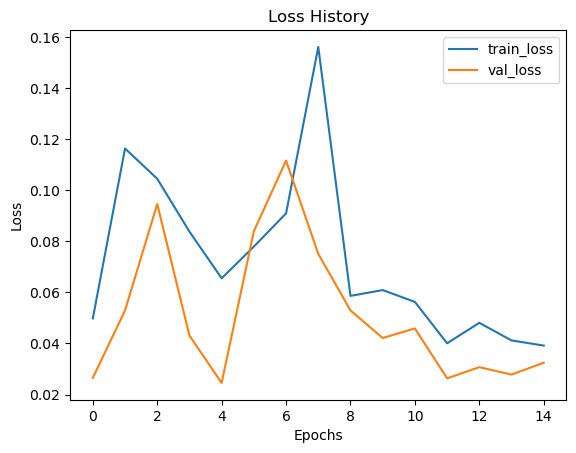

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

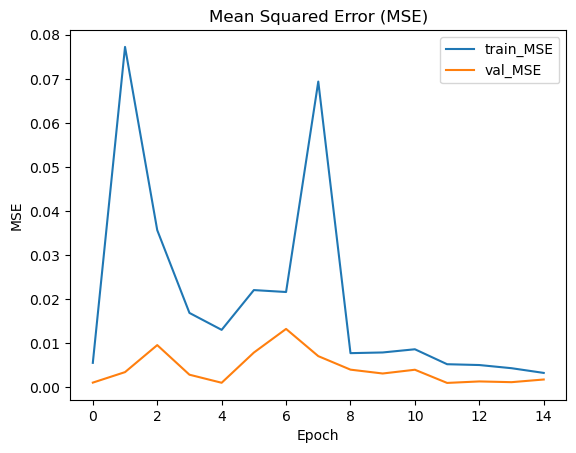

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

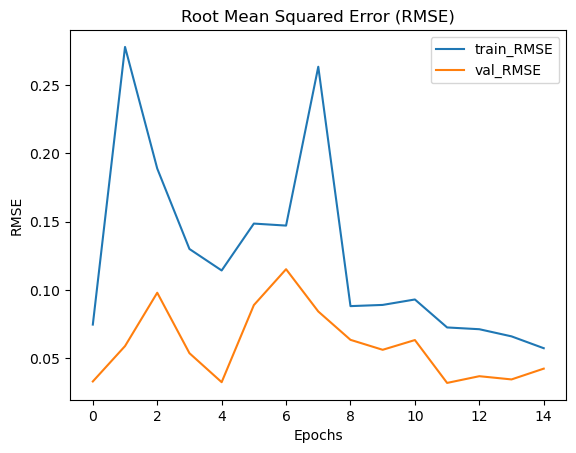

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

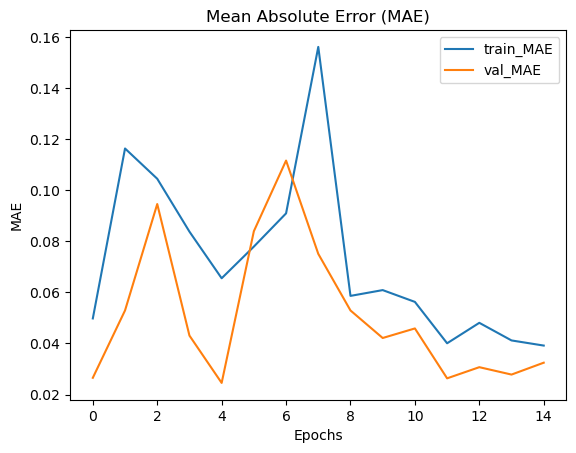

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

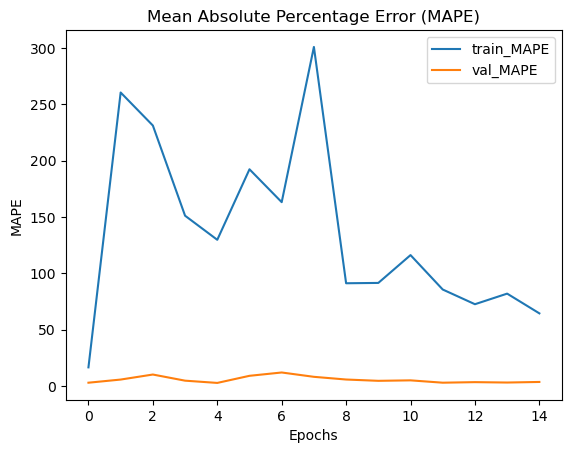

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:25:00.622718: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 4)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


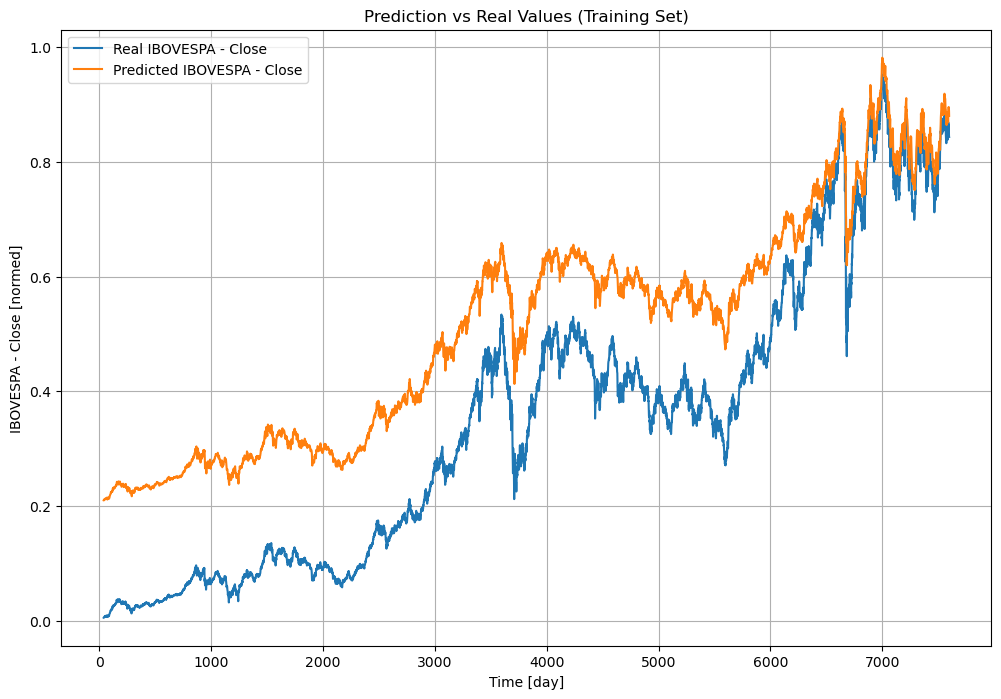

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 4)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


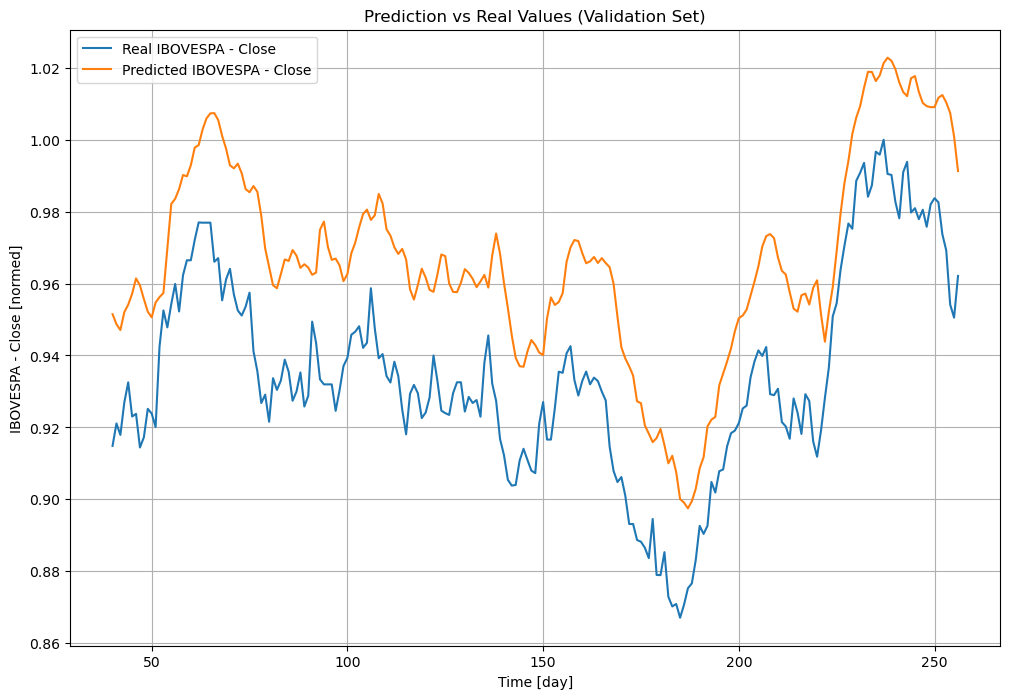

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 4)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


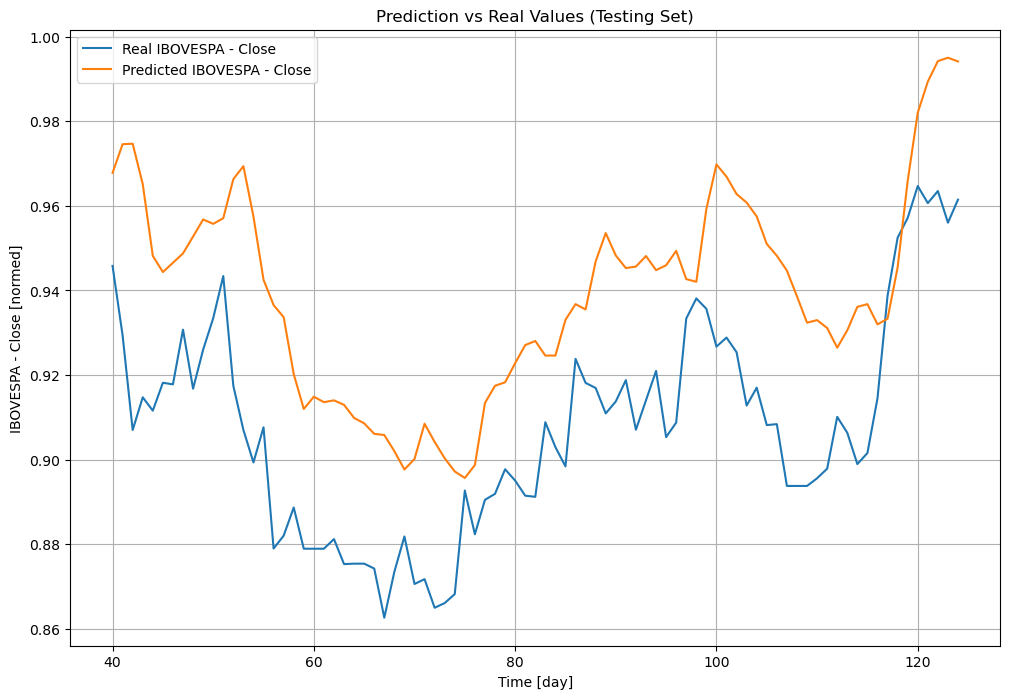

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

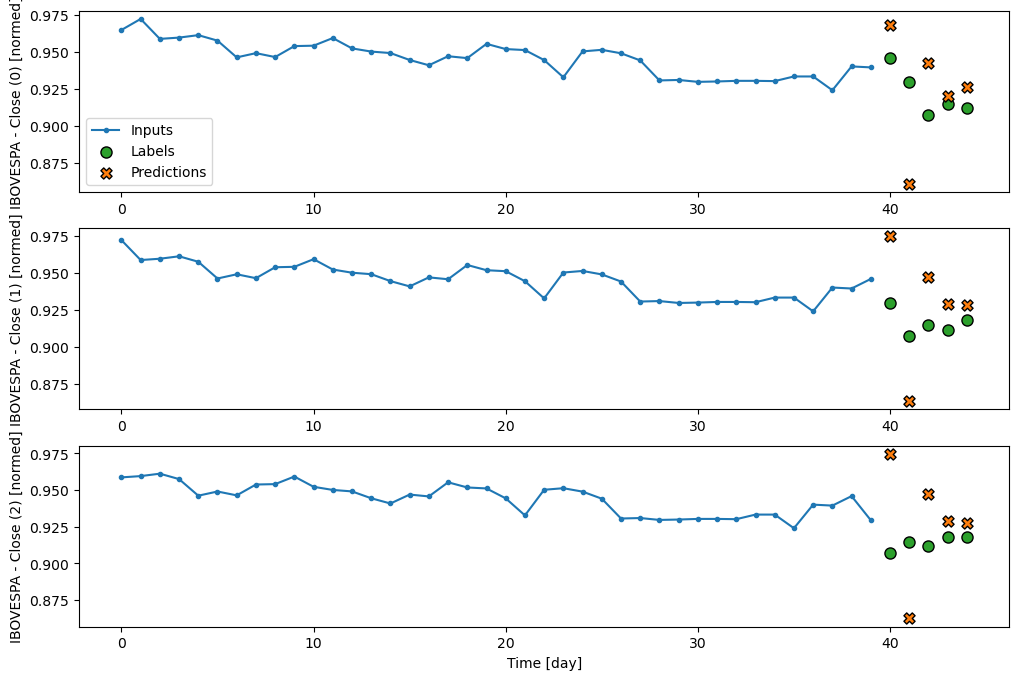

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:53s:750ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[[0.9678044 , 0.9678044 , 0.9678044 , ..., 0.9678044 ,
         0.9678044 , 0.9678044 ],
        [0.860842  , 0.860842  , 0.860842  , ..., 0.860842  ,
         0.860842  , 0.860842  ],
        [0.94254005, 0.94254005, 0.94254005, ..., 0.94254005,
         0.94254005, 0.94254005],
        [0.91988575, 0.91988575, 0.91988575, ..., 0.91988575,
         0.91988575, 0.91988575],
        [0.9262179 , 0.9262179 , 0.9262179 , ..., 0.9262179 ,
         0.9262181 , 0.9262181 ]],

       [[0.97457796, 0.97457796, 0.97457796, ..., 0.97457796,
         0.97457796, 0.97457796],
        [0.8632771 , 0.8632771 , 0.8632771 , ..., 0.8632771 ,
         0.8632771 , 0.8632771 ],
        [0.9470755 , 0.9470755 , 0.9470755 , ..., 0.9470755 ,
         0.9470755 , 0.9470755 ],
        [0.9286823 , 0.9286823 , 0.9286823 , ..., 0.9286823 ,
         0.9286823 , 0.9286823 ],
        [0.92789596, 0.92789596, 0.92789596, ..., 0.92789596,
         0.927896  , 0.927896  ]],

       [[0.9746846 , 0.9746846 , 0.9

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')